# Housing Prices in Six Indian Metropolitan Cities
#### Developed by Swattik Kundu, Computer Science Student of UEMK!

This project deals with Exploratory Data Analysis and Predicting the price of houses in the Indian Metropolitian Cities of Bengaluru, Chennai, Delhi, Hyderabad, Kolkata and Mumbai using regression models of:
1. Linear Regression
2. Polynomial Regression of degree = 2 (Optional)*
3. Decision Tree Regression
4. Random Forest Regression
5. Support Vector Regression
6. Extreme Gradient Boosting (XGBoost)

It is divided into two modules based on two different approaches implemented:
1. Approach 1 - Dropping the missing values
2. Approach 2(Optional)** - Taking the features with non-missing values only


*It is found Polymomial Regression behaves abnormally as compared to others after execution. It is better to leave it out and is thus commented out!

**Approach 2 is optional. It is there just to learn and explore a different approach to see how the performance and data analysis get affected.

The dataset is taken from Kaggle - https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india/code?datasetId=846956&sortBy=voteCount

P.S. - I am a beginner and would appreciate any recommendations, thoughts and advise. 

Reach out to/Follow me on:
1. Email - swattik567@gmail.com
2. Github - https://github.com/SwATTiX
3. linkedIn - https://www.linkedin.com/in/swattik-kundu/



Lets import the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

Loading all the datasets into respective dataframes

In [2]:
bang_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Bangalore.csv')
chn_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Chennai.csv')
del_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Delhi.csv')
hyd_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Hyderabad.csv')
kol_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Kolkata.csv')
mum_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Mumbai.csv')

Exploration of the dataframes.

In [3]:
bang_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [4]:
chn_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,7834999,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5010,2408000,740,Ambattur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5011,5500000,1700,Pallikaranai VGP Shanti Nagar,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5012,3400000,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [5]:
del_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,Madhu Vihar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4994,3000000,540,Madhu Vihar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4995,2600000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4996,5500000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [6]:
hyd_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [7]:
kol_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,4208000,1570,Lake Town,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6503,10100000,1208,Narendrapur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6504,6669000,815,Rajarhat,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6505,4608000,952,Kaikhali,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [8]:
mum_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7715,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7716,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7717,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


From the above obseervation it is seen for a set of houses, nothing was mentioned about certain amenities whereas '9' was used to mark such values in every dataset.
It is essential to checkout for such values as they might contaminate our analysis.

These values are replaced with NaN.

In [9]:
#Replacing the 9 values with NaN
bang_df.replace(9, np.nan, inplace=True)
chn_df.replace(9, np.nan, inplace=True)
del_df.replace(9, np.nan, inplace=True)
hyd_df.replace(9, np.nan, inplace=True)
kol_df.replace(9, np.nan, inplace=True)
mum_df.replace(9, np.nan, inplace=True)

#Displaying the shape of the dataframes
print("Bengaluru: ", bang_df.shape)
print("Chennai: ", chn_df.shape)
print("Delhi: ", del_df.shape)
print("Hyderabad: ", hyd_df.shape)
print("Kolkata: ", kol_df.shape)
print("Mumbai: ", mum_df.shape)

Bengaluru:  (6207, 40)
Chennai:  (5014, 40)
Delhi:  (4998, 40)
Hyderabad:  (2518, 40)
Kolkata:  (6507, 40)
Mumbai:  (7719, 40)


Lets Visualize these missing values

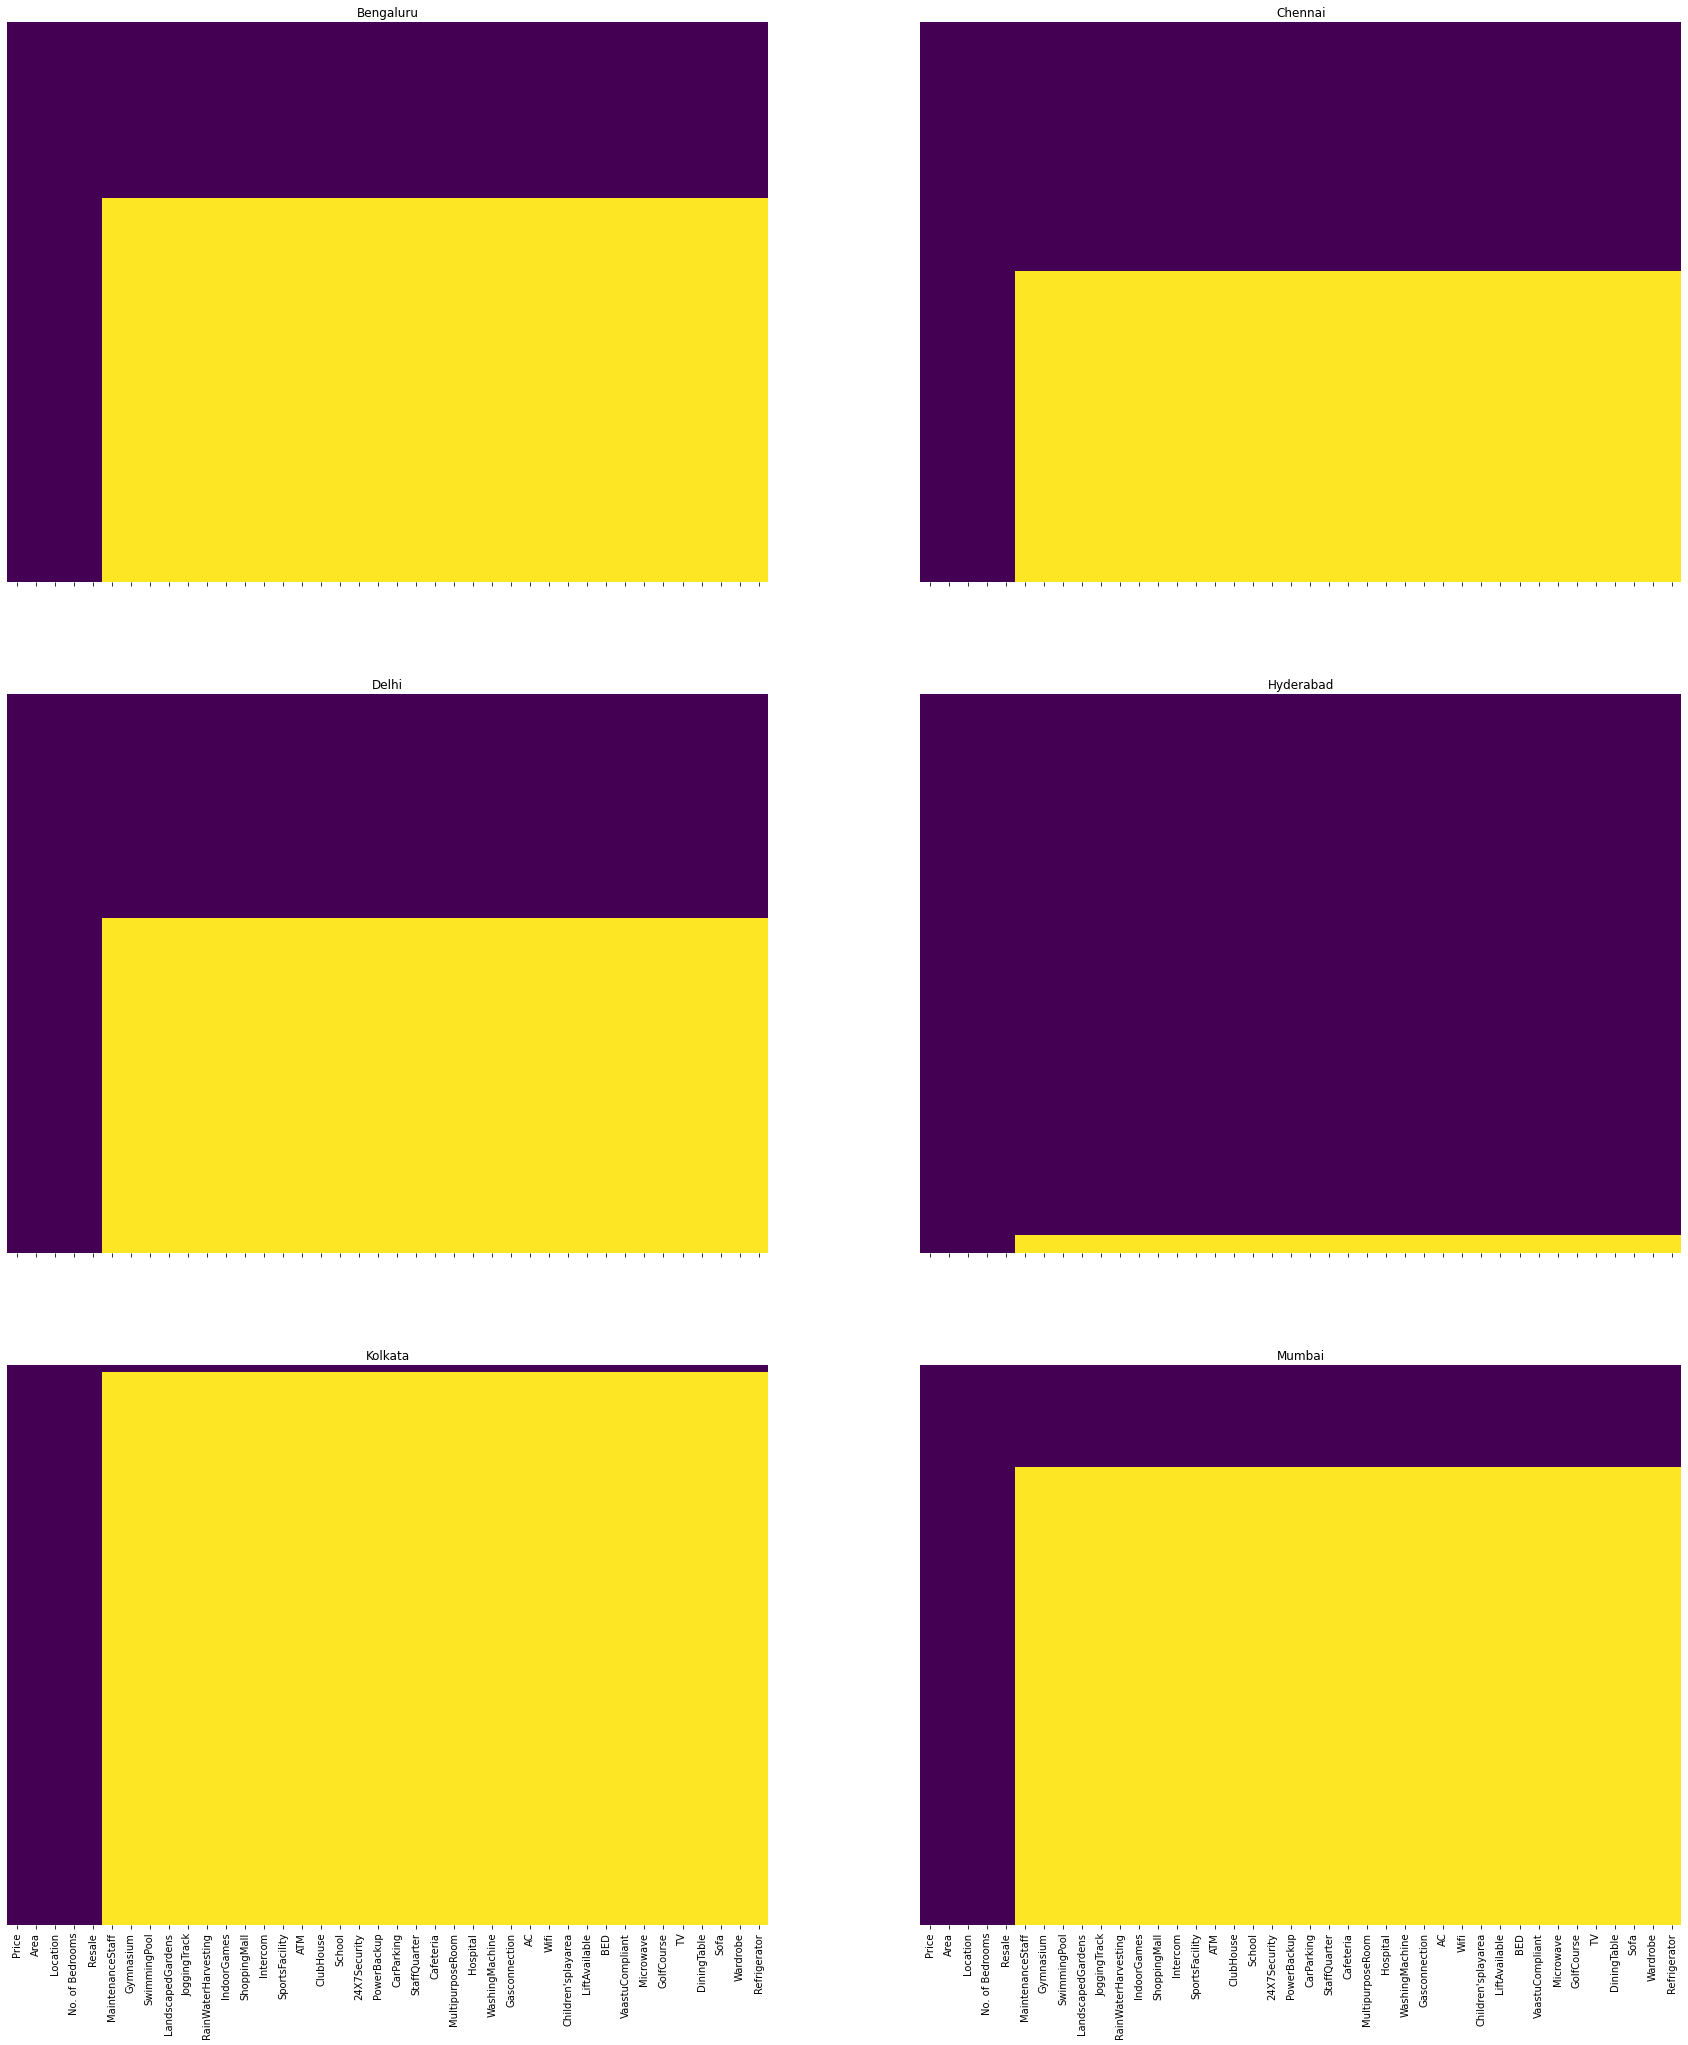

In [10]:
#Visualization using Matplotlib and Seaborn Libraries
fig, ax = plt.subplots(3,2, figsize=(30,35), sharex=True)

sns.heatmap(bang_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax[0][0])
ax[0][0].set_title('Bengaluru')

sns.heatmap(chn_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax[0][1])
ax[0][1].set_title('Chennai')

sns.heatmap(del_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax[1][0])
ax[1][0].set_title('Delhi')

sns.heatmap(hyd_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax[1][1])
ax[1][1].set_title('Hyderabad')

sns.heatmap(kol_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax[2][0])
ax[2][0].set_title('Kolkata')

sns.heatmap(mum_df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax[2][1])
ax[2][1].set_title('Mumbai')

plt.show()

In [11]:
#Converting the price from Rupees to Lakhs

bang_df['Price'] = bang_df['Price']/10**5
chn_df['Price'] = chn_df['Price']/10**5
del_df['Price'] = del_df['Price']/10**5
hyd_df['Price'] = hyd_df['Price']/10**5
kol_df['Price'] = kol_df['Price']/10**5
mum_df['Price'] = mum_df['Price']/10**5

### It is evident that there are a lot of missing values for the amenities features in all the datasets except for Hyderabad which has low missing values. There will be two approaches to follow up with:
1. Approach 1 : Dropping these missing values.

2. Approach 2(Optional) : Using the columns with non-missing values only

##### Function to merge all the datasets

In [12]:
def merge_all(df1, df2, df3, df4, df5, df6):
    df1['City'] = 'Bengaluru'
    df2['City'] = 'Chennai'
    df3['City'] = 'Delhi'
    df4['City'] = 'Hyderabad'
    df5['City'] = 'Kolkata'
    df6['City'] = 'Mumbai'
    merged_df = pd.concat([bang_df, chn_df, del_df, hyd_df, kol_df, mum_df]).reset_index(drop=True)
    return merged_df

##### First the different functions for Exploratory Data Analysis are created

In [13]:
#Function to visualize the necessary data of each city.
def data_plots(df, city):
    #Scatterplot of the Area and price against no of bedrooms in each city
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x=df['Price'], y=df['Area'], hue=df['No. of Bedrooms'])
    plt.title('Area(sq. ft) vs Price(lakhs) in '+city)
    plt.show()

    #Countplot of the Properties at every location in each city
    plt.figure(figsize=(20, 8))
    sns.countplot(y='Location', data=df, order=df.Location.value_counts().index[:25])
    plt.title('Number of Houses at each location in '+city)
    plt.show()

    #Distribution plot of Sale Price across each city
    fig, ax = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle('Distribution of Sale Price across '+city)
    sns.distplot(df['Price'], norm_hist=False, ax=ax[0])
    sns.distplot(np.log(df['Price']), norm_hist=False, ax=ax[1])
    plt.show()

    #Correlation heatmap of the attributes in eacy city
    #numeric_correlation = df.select_dtypes(exclude=object).corr()
    #plt.figure(figsize=(20,20))
    #sns.heatmap(numeric_correlation, annot = True, square=True, fmt='.1f')
    #plt.title('Correlation', fontsize=50)
    #plt.show()

In [14]:
#Function to visualize the necessary data of all the cities merged.
def merged_plots(merged_df):
    #Catplots of Price and Area against each City in the Merged data
    sns.catplot(x='City', y='Price', data=merged_df, jitter=0.15, height=7, aspect=2)
    plt.title('House Price(in lakhs) variation in these cities')
    plt.show()
    sns.catplot(x='City', y='Area', data=merged_df, jitter=0.15, height=7, aspect=2)
    plt.title('House Area(in sq. ft) variation in these cities')
    plt.show()

    #Scatterplot of the House price vs Area with respect to  each city in the merged data
    plt.figure(figsize=(18,9))
    sns.scatterplot(x=merged_df['Area'], y=merged_df['Price'], hue=merged_df['City'])
    plt.title('House Price(lakhs) vs Area(sq. ft) across cities')
    plt.show()

    #Correlation heatmap of the Merged Data
    numeric_correlation = merged_df.select_dtypes(exclude=object).corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(numeric_correlation, annot = True, square=True, fmt='.1f')
    plt.title('Correlation', fontsize=50)
    plt.show()

##### Next the functions for different model analysis and scoring plots are created

In [15]:
#Function to implement these 6 regression models and evaluate their performance
def models_evaluation(df):
    #Encoding the Categorical Values
    label_encoder = LabelEncoder()
    df['Location'] = label_encoder.fit_transform(df.Location)

    #Creating the training data and test data
    X = df.drop(['Price'], axis=1)
    #To create higher efficiency we take the log value
    y = np.log(df['Price'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


    #Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_y_pred = lr_model.predict(X_test)
    lr_score = lr_model.score(X_test, y_test)
    lr_cv = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = 10)
    lr_mae = metrics.mean_absolute_error(y_test, lr_y_pred)
    lr_mse = metrics.mean_squared_error(y_test, lr_y_pred)
    lr_rmse = np.sqrt(lr_mse)
    lr_r2 = metrics.r2_score(y_test, lr_y_pred)


    #Polynomial Regression of degree 2
    #X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
    #X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
    #pr_model = LinearRegression()
    #pr_model.fit(X_train_poly, y_train)
    #pr_y_pred = pr_model.predict(PolynomialFeatures(degree=2).fit_transform(X_test))
    #pr_score = pr_model.score(X_test_poly, y_test)
    #pr_cv = cross_val_score(estimator = pr_model, X = X_train, y = y_train, cv = 10)
    #pr_mae = metrics.mean_absolute_error(y_test, pr_y_pred)
    #pr_mse = metrics.mean_squared_error(y_test, pr_y_pred)
    #pr_rmse = np.sqrt(pr_mse)
    #pr_r2 = metrics.r2_score(y_test, pr_y_pred)


    #Decision Tree
    dt_model = DecisionTreeRegressor(random_state=0)
    dt_model.fit(X_train, y_train)
    dt_y_pred = dt_model.predict(X_test)
    dt_score = dt_model.score(X_test, y_test)
    dt_cv = cross_val_score(estimator = dt_model, X = X_train, y = y_train, cv = 10)
    dt_mae = metrics.mean_absolute_error(y_test, dt_y_pred)
    dt_mse = metrics.mean_squared_error(y_test, dt_y_pred)
    dt_rmse = np.sqrt(dt_mse)
    dt_r2 = metrics.r2_score(y_test, dt_y_pred)


    #Random Forest
    rf_model = RandomForestRegressor(n_estimators=500, random_state=0)
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)
    rf_score = rf_model.score(X_test, y_test)
    rf_cv = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)
    rf_mae = metrics.mean_absolute_error(y_test, rf_y_pred)
    rf_mse = metrics.mean_squared_error(y_test, rf_y_pred)
    rf_rmse = np.sqrt(rf_mse)
    rf_r2 = metrics.r2_score(y_test, rf_y_pred)


    #Suport Vector Machine(Support Vector Regression)
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.fit_transform(X_test)
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train_scaled, y_train)
    svr_y_pred = svr_model.predict(sc.transform(X_test))
    svr_score = svr_model.score(X_test_scaled, y_test)
    svr_cv = cross_val_score(estimator = svr_model, X = X_train_scaled, y = y_train, cv = 10)
    svr_mae = metrics.mean_absolute_error(y_test, svr_y_pred)
    svr_mse = metrics.mean_squared_error(y_test, svr_y_pred)
    svr_rmse = np.sqrt(svr_mse)
    svr_r2 = metrics.r2_score(y_test, svr_y_pred)


    #Extreme Gradient Boosting
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)
    xgb_y_pred = xgb_model.predict(X_test)
    xgb_score = xgb_model.score(X_test, y_test)
    xgb_cv = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, cv = 10)
    xgb_mae = metrics.mean_absolute_error(y_test, xgb_y_pred)
    xgb_mse = metrics.mean_squared_error(y_test, xgb_y_pred)
    xgb_rmse = np.sqrt(xgb_mse)
    xgb_r2 = metrics.r2_score(y_test, xgb_y_pred)


    #Store the metrics resultof each model in a list return it
    mods = [('Linear Regression', lr_score, lr_cv.mean(), lr_mae, lr_mse, lr_rmse, lr_r2),
            #('Polynomial Regression(^2)', pr_score, pr_cv.mean(), pr_mae, pr_mse, pr_rmse, pr_r2),
            ('Decision Tree Regression', dt_score, dt_cv.mean(), dt_mae, dt_mse, dt_rmse, dt_r2),
            ('Random Forest Regression', rf_score, rf_cv.mean(), rf_mae, rf_mse, rf_rmse, rf_r2),
            ('Support Vector Regression', svr_score, svr_cv.mean(), svr_mae, svr_mse, svr_rmse, svr_r2),
            ('XGBoost Regression', xgb_score, xgb_cv.mean(), xgb_mae, xgb_mse, xgb_rmse, xgb_r2)
    ]
    scores = pd.DataFrame(data=mods, columns=['Model', 'Score', 'Cross-Validation', 'MAE', 'MSE', 'RMSE', 'R2_Score'])

    return scores

In [16]:
#Function to plot the 5 performance measures of the models
def score_plots(df, city):
    #Barplots in subplots to plot the performance
    fig, ax = plt.subplots(3,2, figsize=(35,20))

    fig.suptitle(city, fontsize=50)

    sns.barplot(y='Model', x='Score', data=df, ax=ax[0][0])

    #df.sort_values(by='Cross-Validation', inplace=True)
    sns.barplot(y='Model', x='Cross-Validation', data=df, ax=ax[0][1])
    
    #df.sort_values(by='MAE', inplace=True)
    sns.barplot(y='Model', x='MAE', data=df, ax=ax[1][0])
    
    #df.sort_values(by='MSE', inplace=True)
    sns.barplot(y='Model', x='MSE', data=df, ax=ax[1][1])
    
    #df.sort_values(by='RMSE', inplace=True)
    sns.barplot(y='Model', x='RMSE', data=df, ax=ax[2][0])
    
    #df.sort_values(by='R2_Score', inplace=True)
    sns.barplot(y='Model', x='R2_Score', data=df, ax=ax[2][1])

    plt.show()



## Approach 1:
Proceeding with dropping the missing values

In [17]:
#Dropping the missing values
bang_df = bang_df.dropna()
chn_df = chn_df.dropna()
del_df = del_df.dropna()
hyd_df = hyd_df.dropna()
kol_df = kol_df.dropna()
mum_df = mum_df.dropna()

#Checking the data size
print("Bengaluru: ", bang_df.shape)
print("Chennai: ", chn_df.shape)
print("Delhi: ", del_df.shape)
print("Hyderabad: ", hyd_df.shape)
print("Kolkata: ", kol_df.shape)
print("Mumbai: ", mum_df.shape)

Bengaluru:  (1951, 40)
Chennai:  (2233, 40)
Delhi:  (2002, 40)
Hyderabad:  (2434, 40)
Kolkata:  (75, 40)
Mumbai:  (1398, 40)


### Exploratory Data Analysis of each dataset and the merged one followed by the model training and performance results!

#### Bengaluru
EDA:

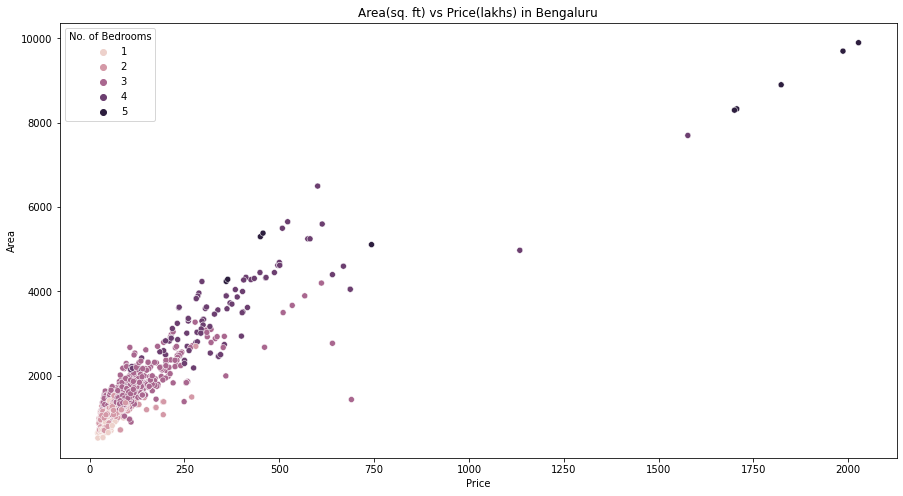

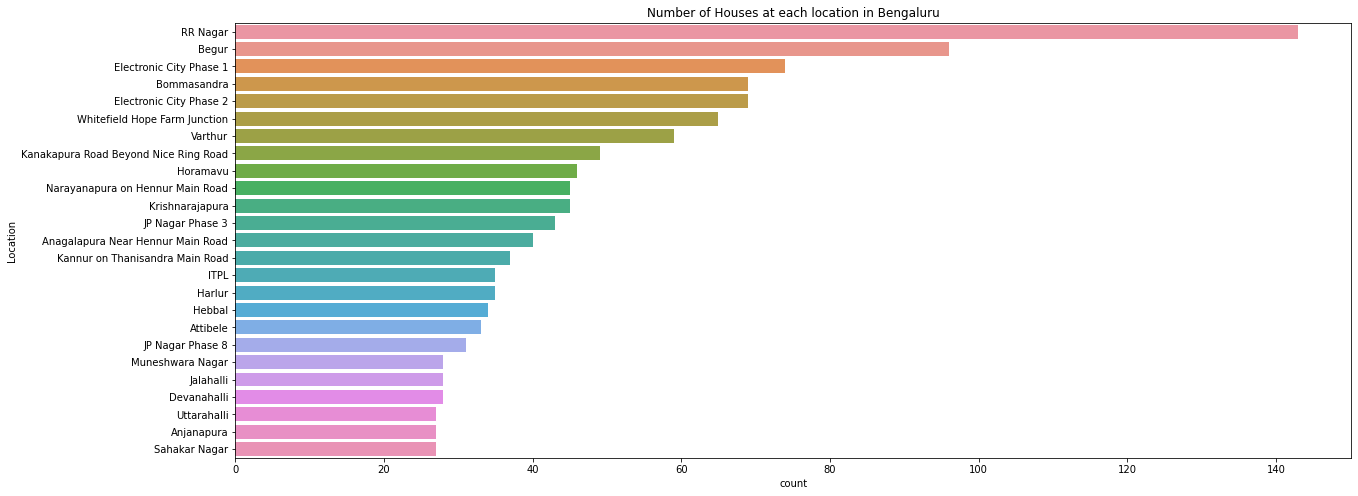

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


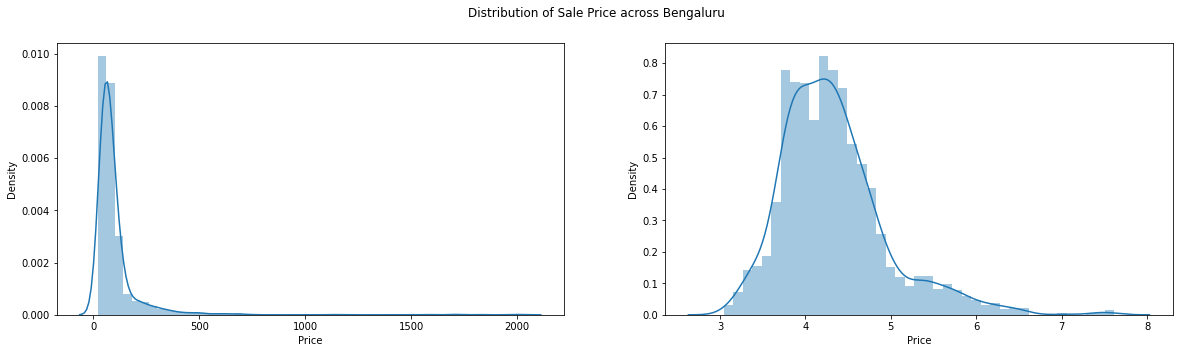

In [18]:
data_plots(bang_df, 'Bengaluru')

Model Training and Performance:

In [19]:
bang_scores = models_evaluation(bang_df)
bang_scores

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\747310497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df.Location)


,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.786148,0.783763,0.198298,0.079627,0.282182,0.786148
1,Decision Tree Regression,0.829224,0.869653,0.112411,0.063588,0.252166,0.829224
2,Random Forest Regression,0.894939,0.925365,0.092472,0.039119,0.197785,0.894939
3,Support Vector Regression,0.906077,0.942433,0.111025,0.034972,0.187007,0.906077
4,XGBoost Regression,0.930222,0.964699,0.068604,0.025982,0.161188,0.930222


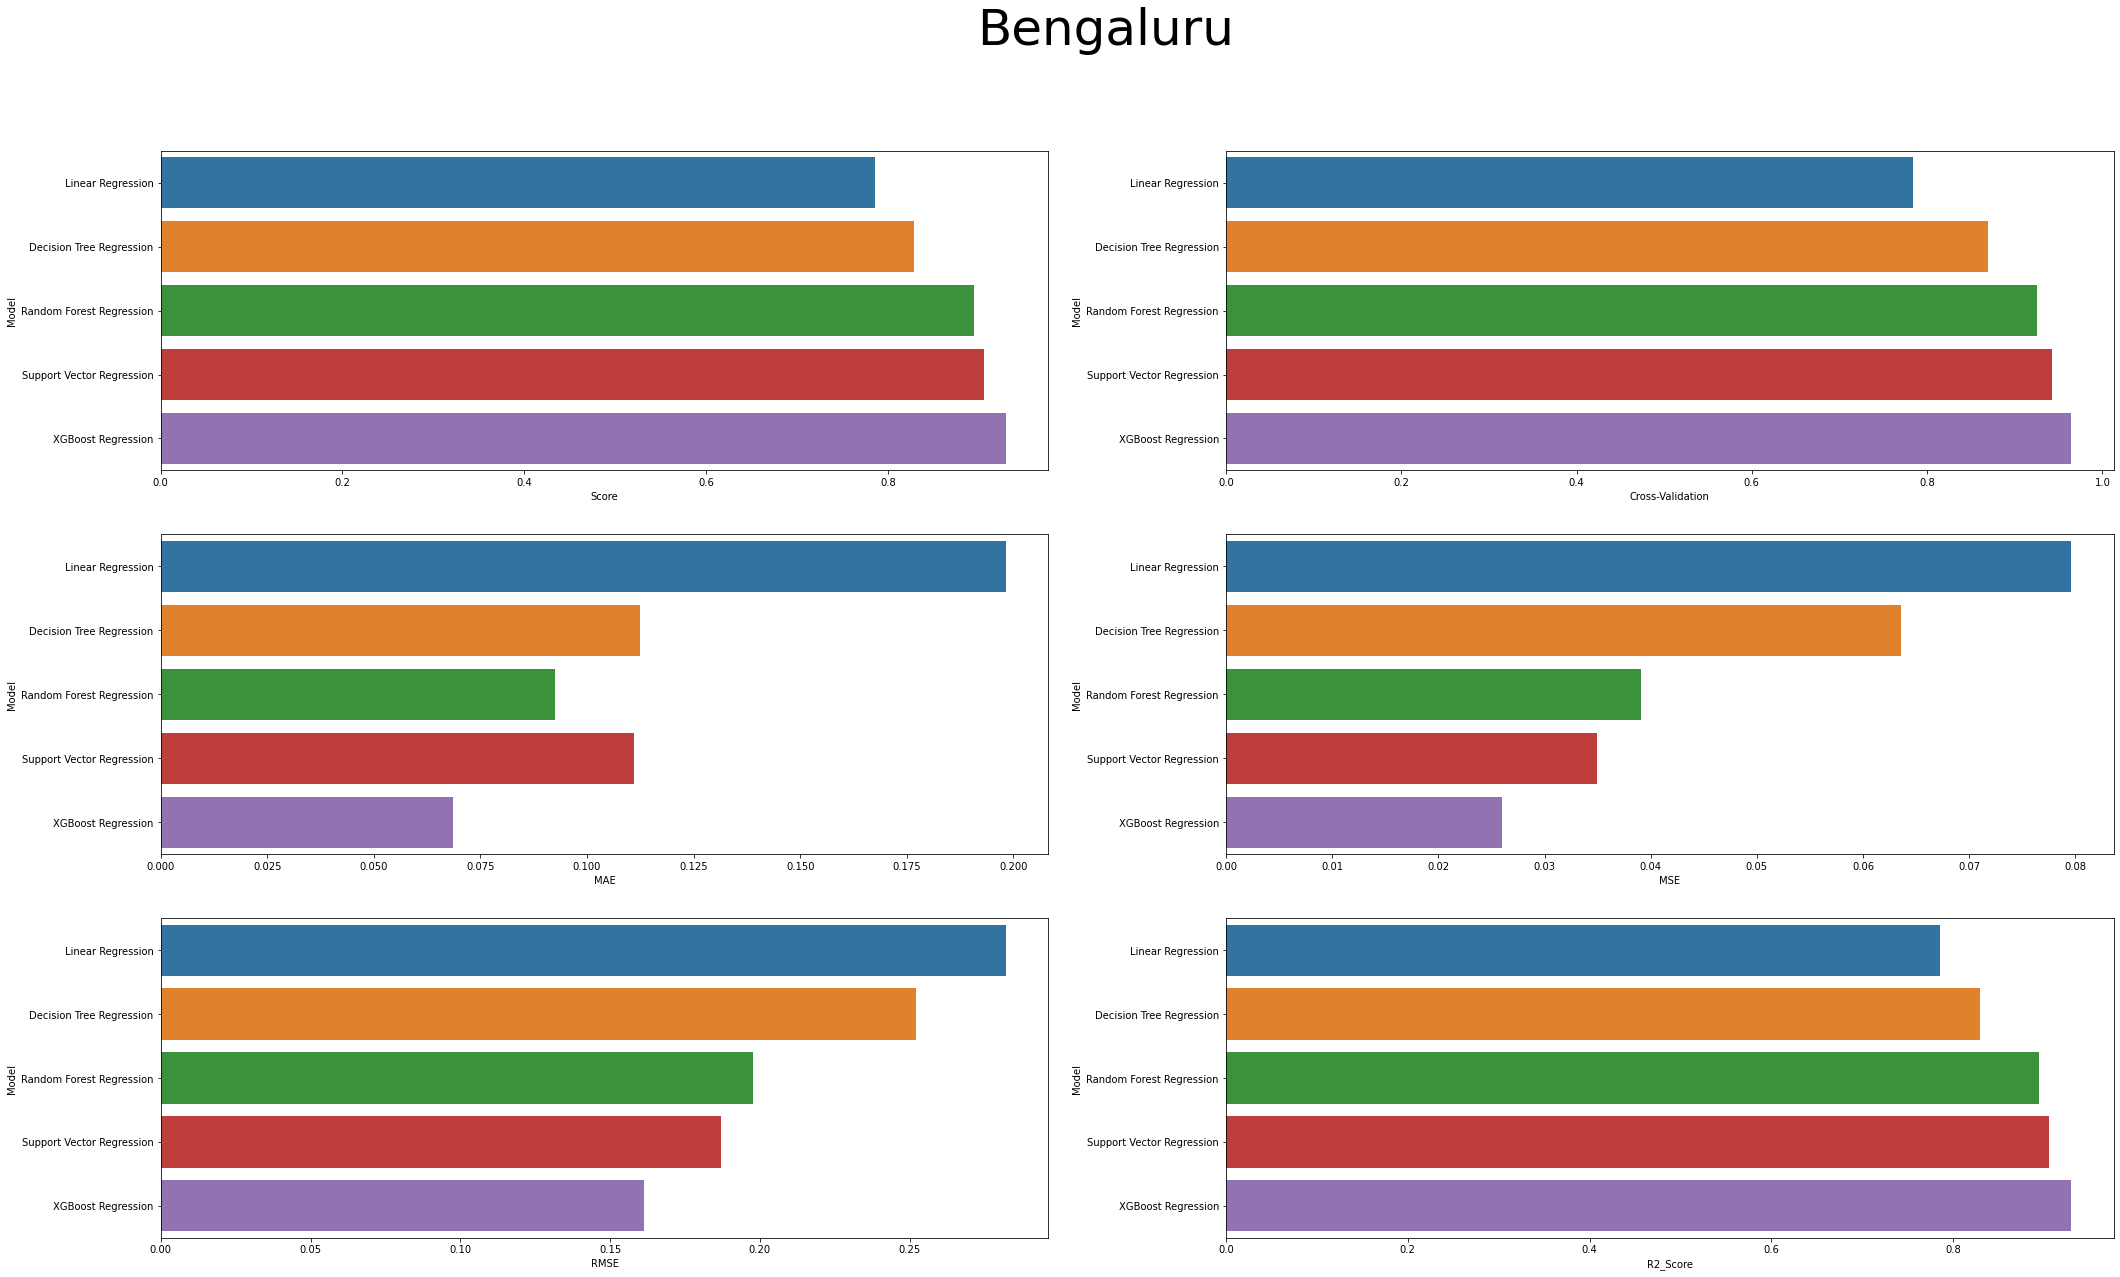

In [20]:
score_plots(bang_scores, 'Bengaluru')

#### Chennai
EDA:

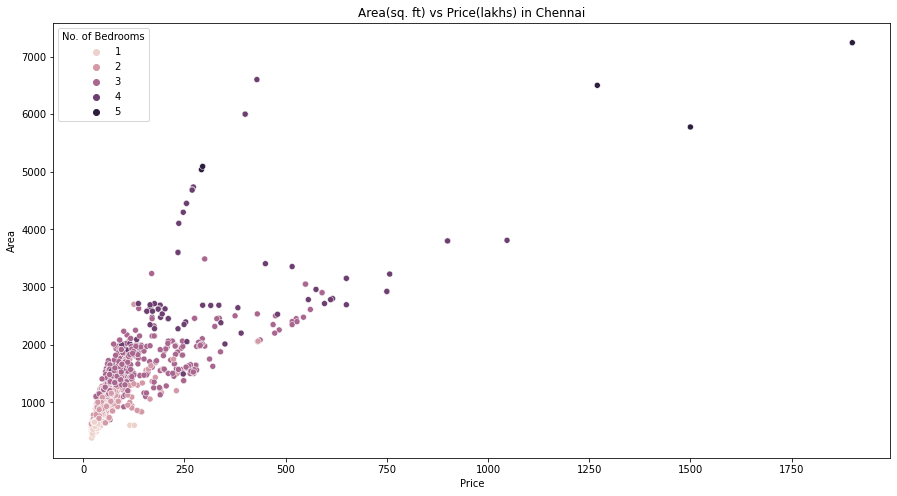

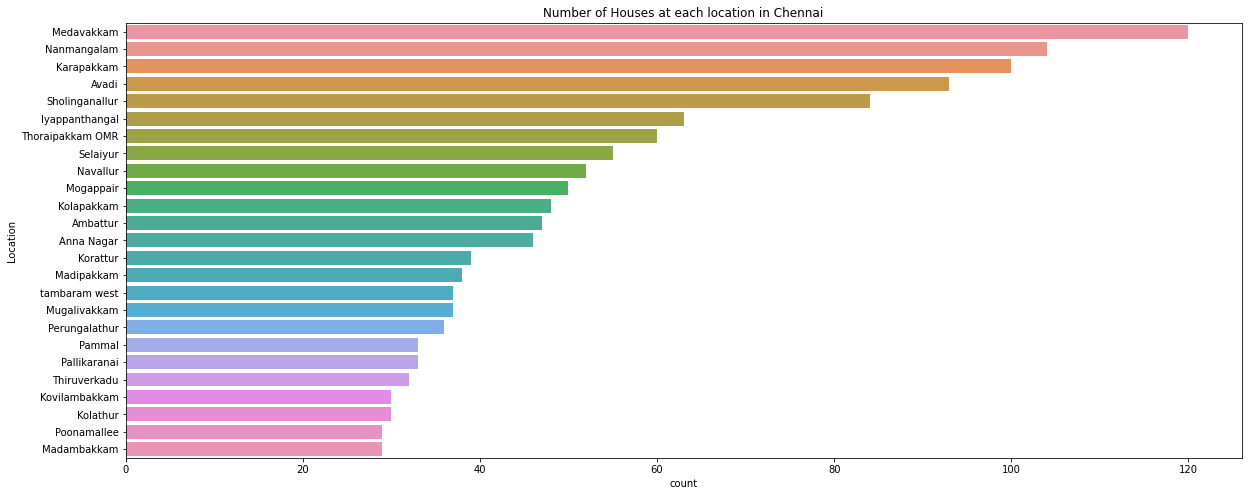

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


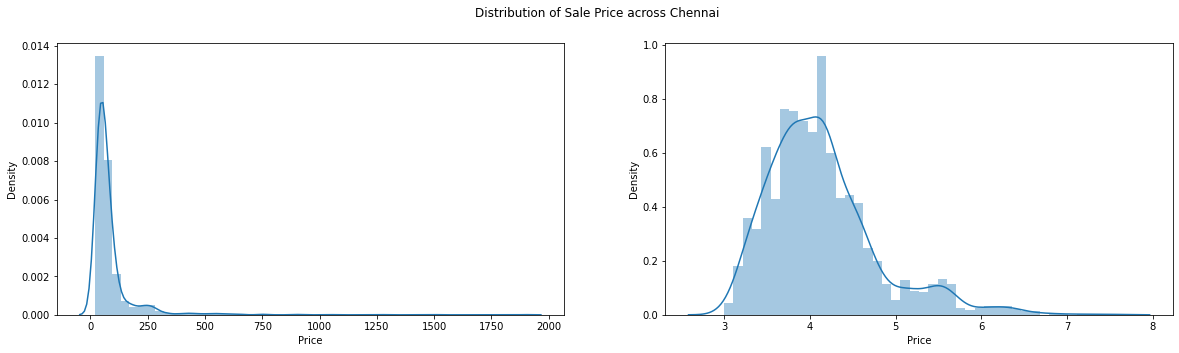

In [21]:
data_plots(chn_df,'Chennai')

Model Training and Performance:

In [22]:
chn_scores = models_evaluation(chn_df)
chn_scores

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\747310497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df.Location)


,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.727686,0.739897,0.237400,0.126384,0.355506,0.727686
1,Decision Tree Regression,0.873199,0.853093,0.107879,0.058850,0.242590,0.873199
2,Random Forest Regression,0.931283,0.908336,0.100599,0.031892,0.178584,0.931283
3,Support Vector Regression,0.871789,0.854274,0.162711,0.059504,0.243935,0.871789
4,XGBoost Regression,0.959459,0.941420,0.080077,0.018815,0.137169,0.959459


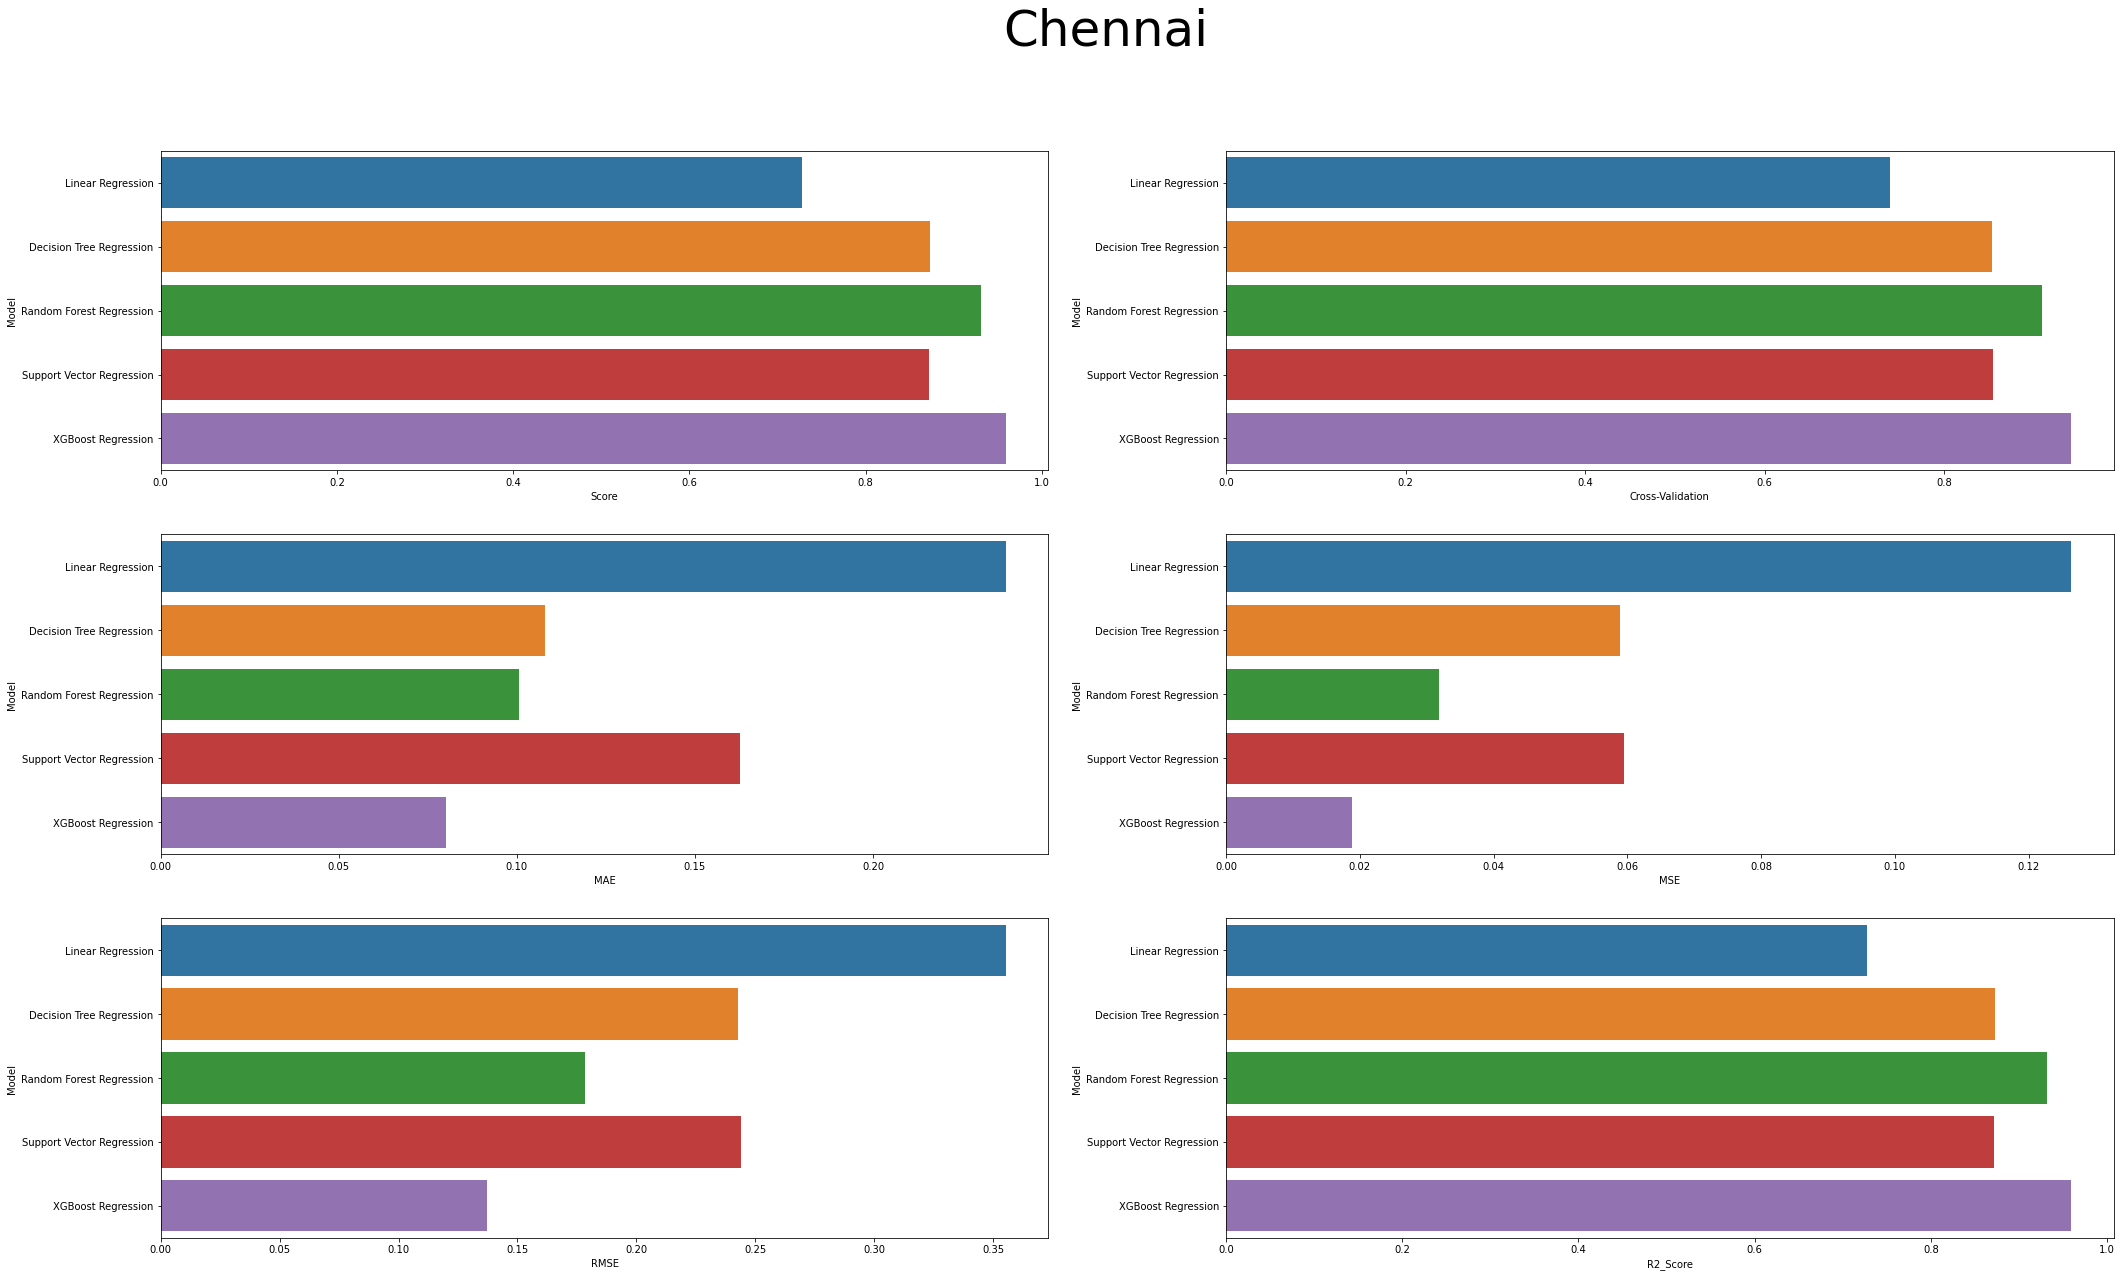

In [23]:
score_plots(chn_scores, 'Chennai')

#### Delhi

EDA:

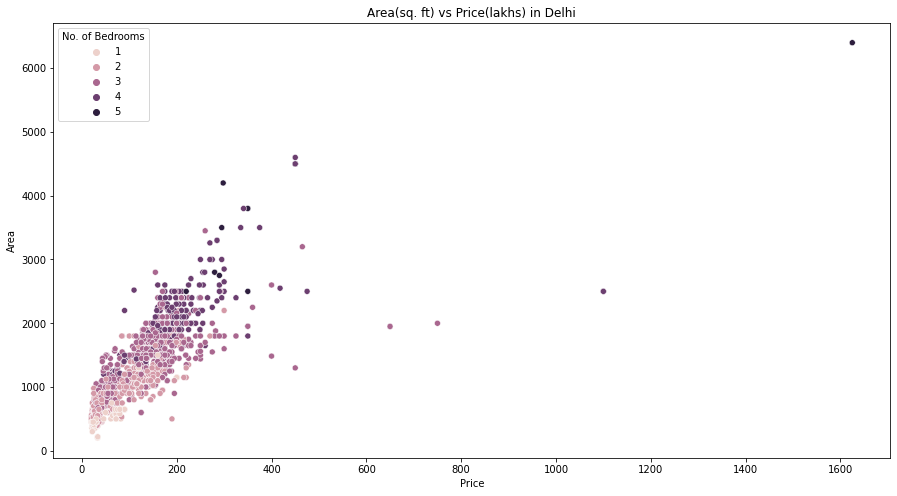

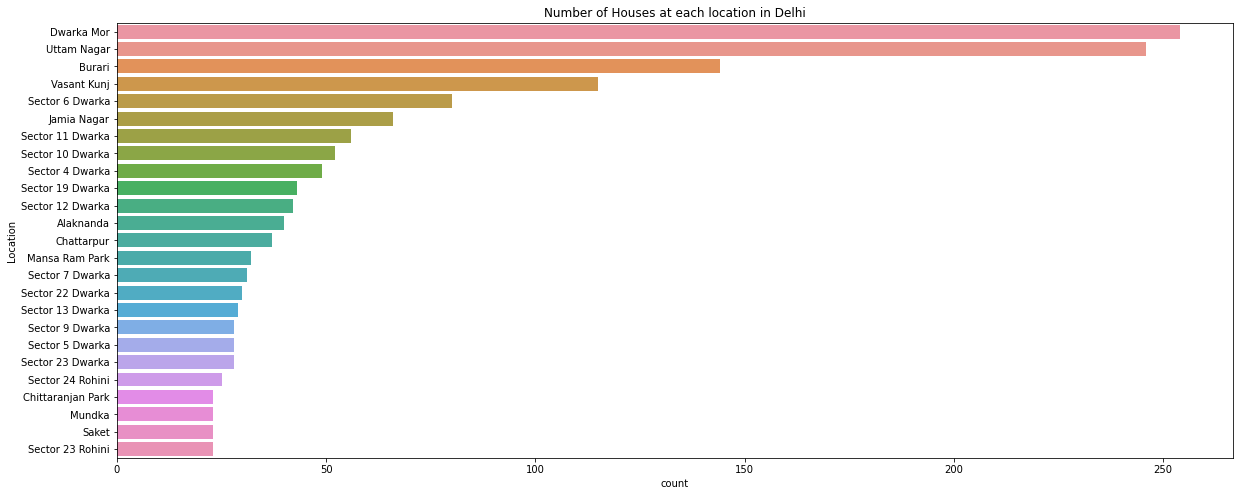

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


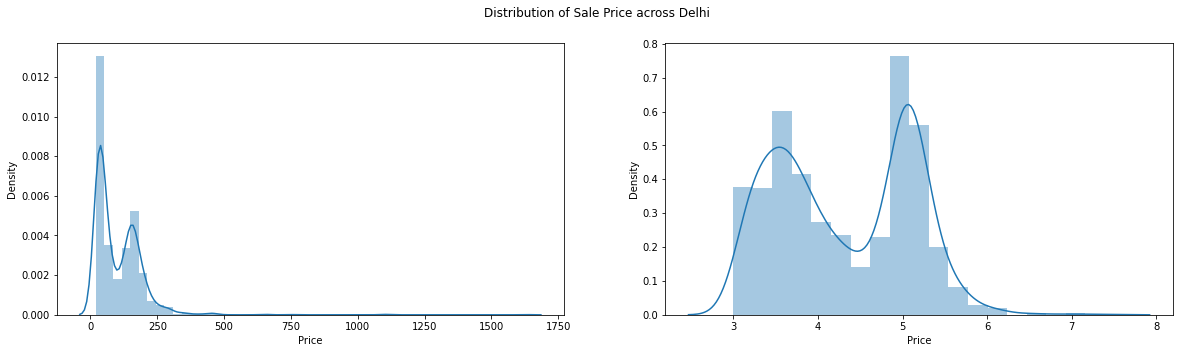

In [24]:
data_plots(del_df, 'Delhi')

Model Training and Performance:

In [25]:
del_scores = models_evaluation(del_df)
del_scores

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\747310497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df.Location)


,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.844094,0.825347,0.236110,0.102590,0.320297,0.844094
1,Decision Tree Regression,0.900514,0.883728,0.153992,0.065465,0.255860,0.900514
2,Random Forest Regression,0.944353,0.932450,0.122202,0.036617,0.191357,0.944353
3,Support Vector Regression,0.895031,0.887366,0.179614,0.069072,0.262816,0.895031
4,XGBoost Regression,0.951898,0.937541,0.114999,0.031652,0.177911,0.951898


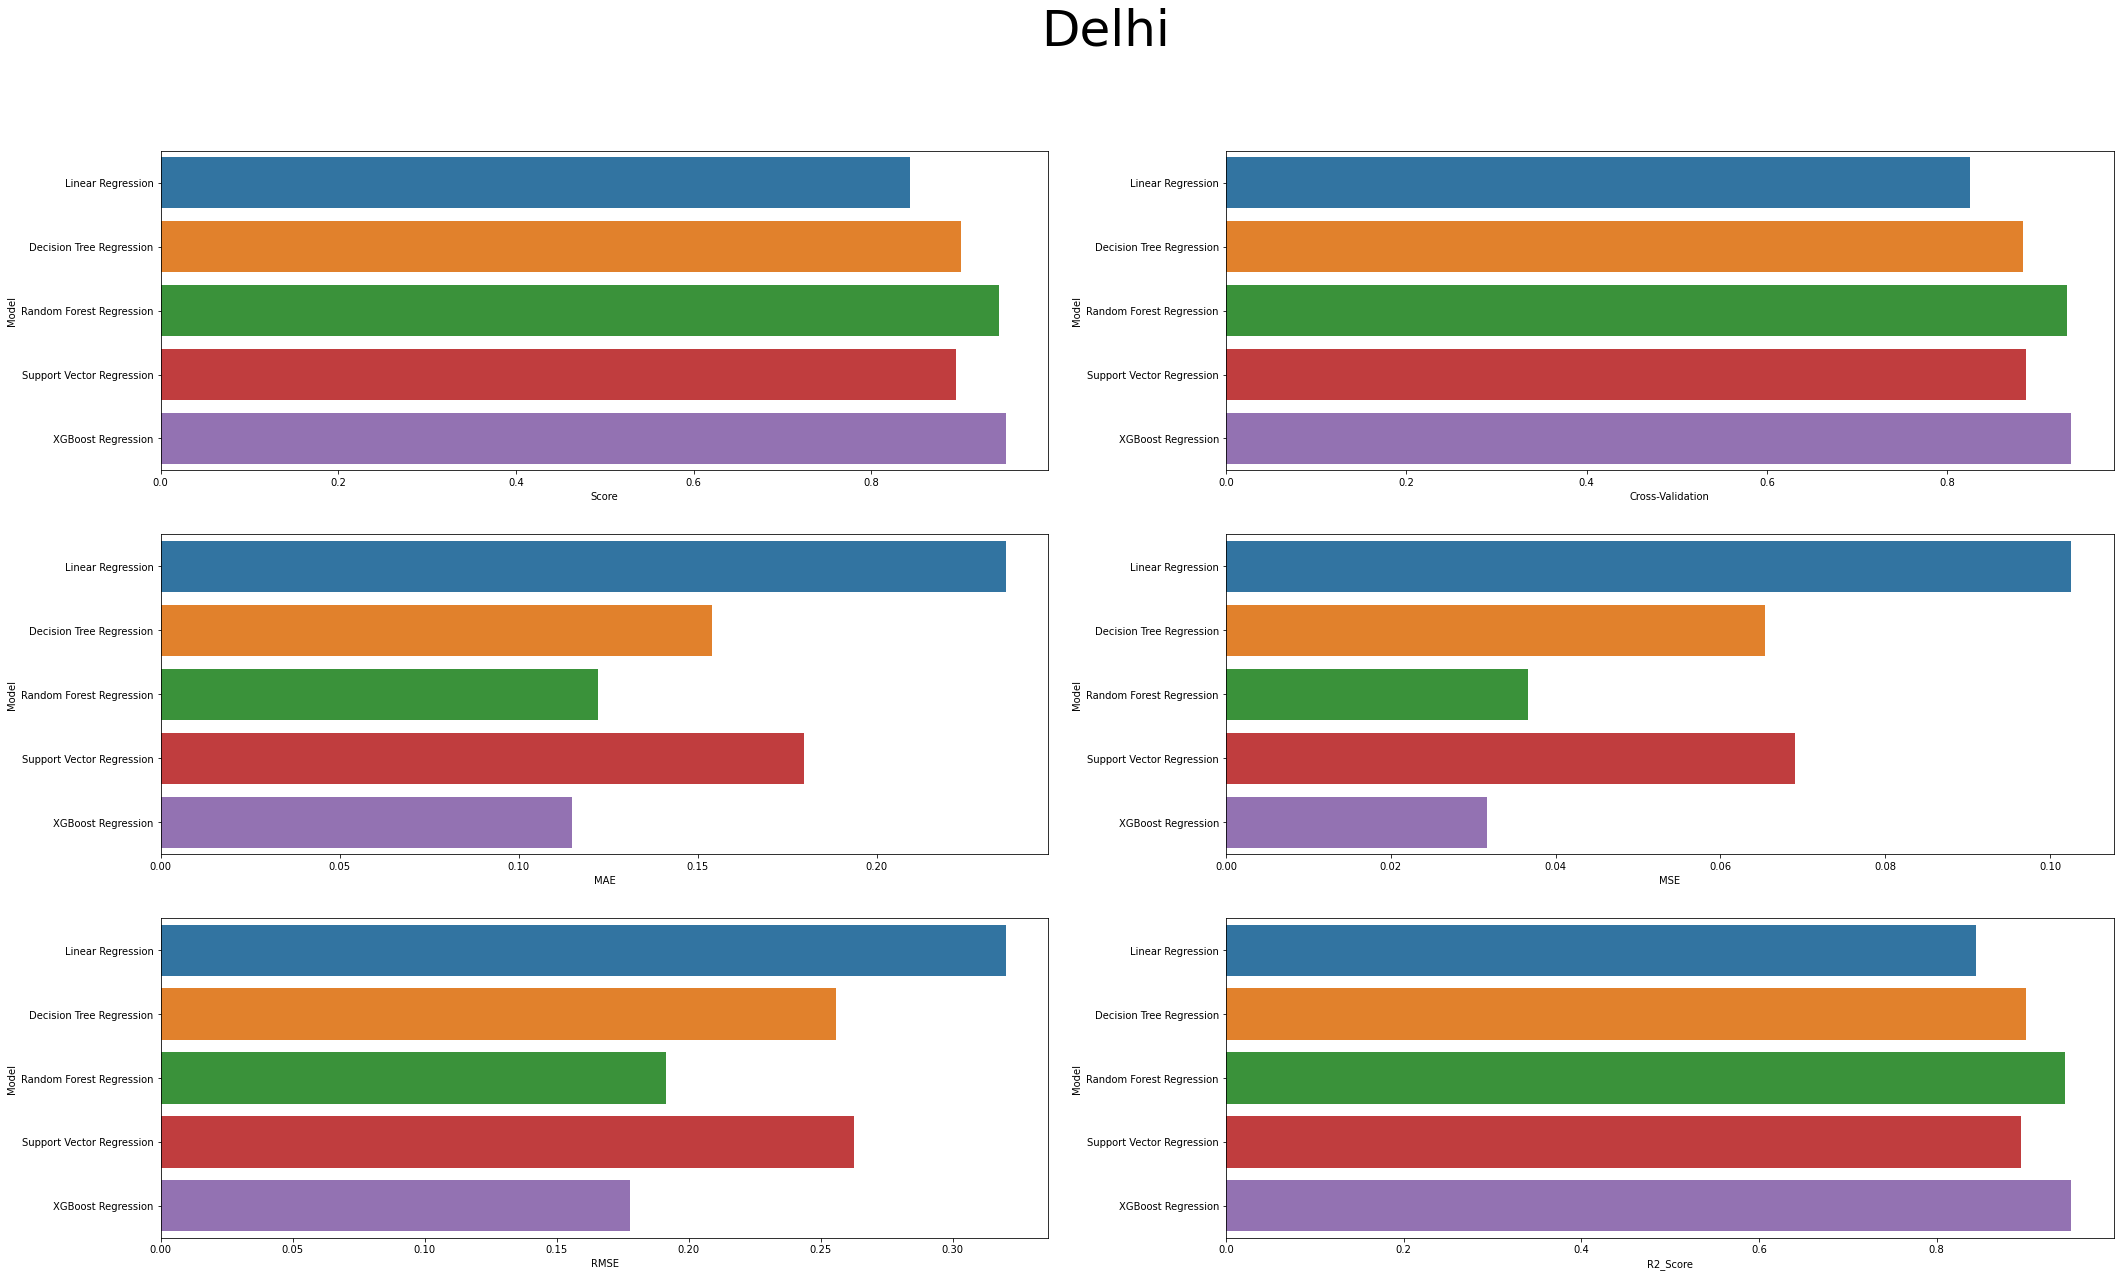

In [26]:
score_plots(del_scores, 'Delhi')

#### Hyderabad
EDA:

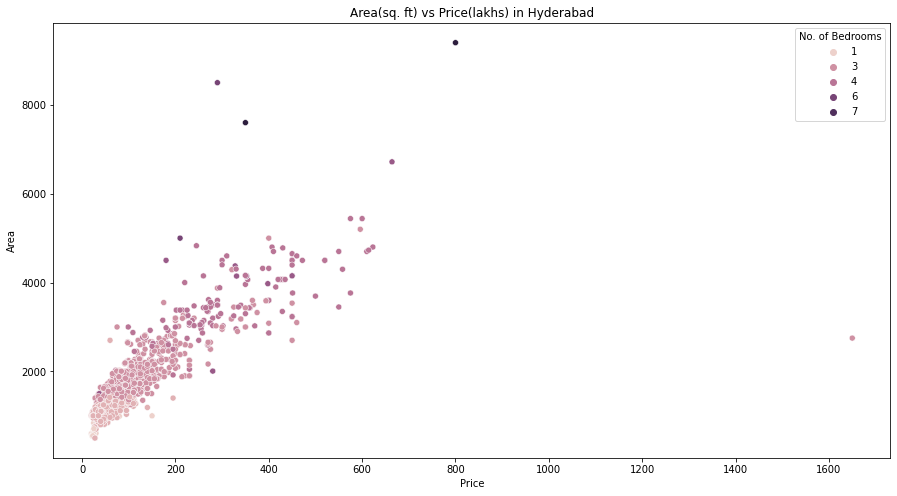

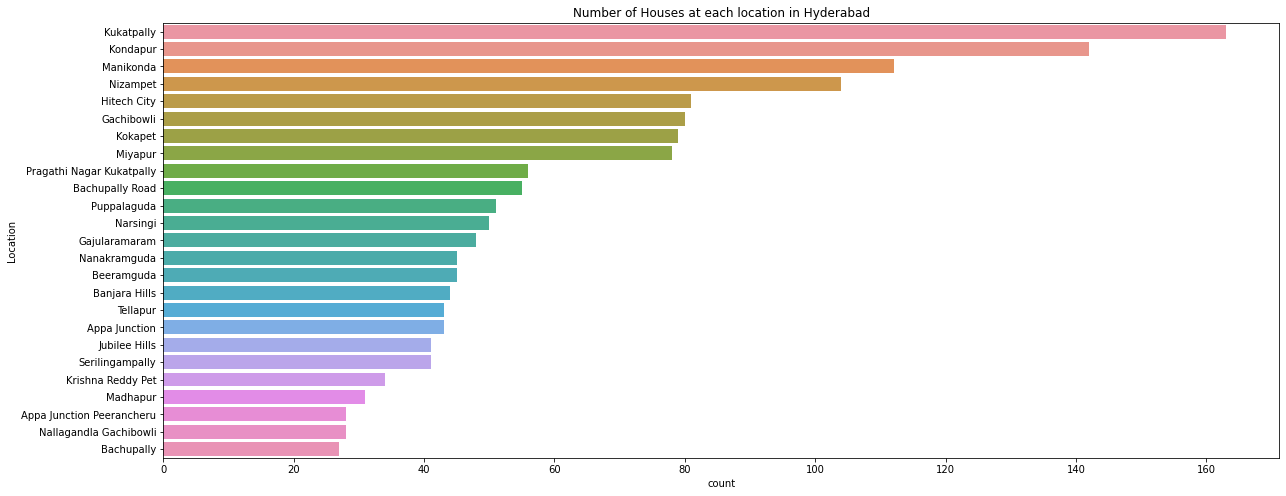

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


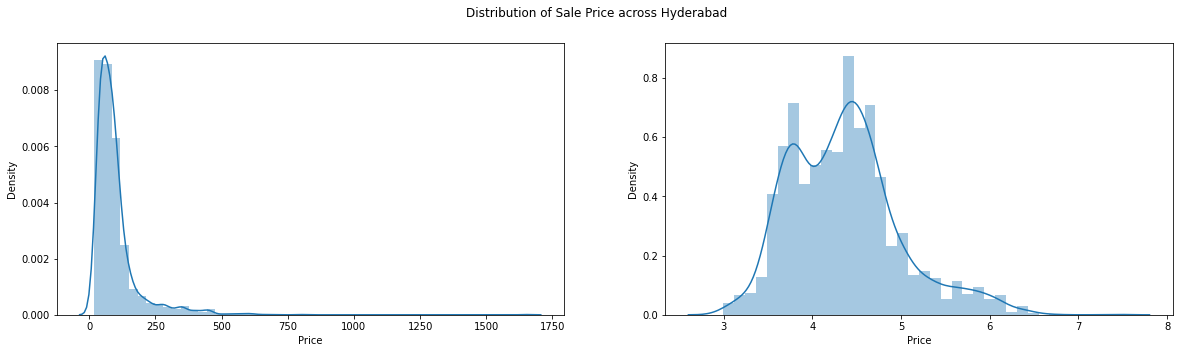

In [27]:
data_plots(hyd_df, 'Hyderabad')

Model Training and Performance:

In [28]:
hyd_scores = models_evaluation(hyd_df)
hyd_scores

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\747310497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df.Location)


,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.747118,0.784456,0.225175,0.096034,0.309893,0.747118
1,Decision Tree Regression,0.794835,0.840673,0.153140,0.077913,0.279129,0.794835
2,Random Forest Regression,0.864724,0.901257,0.126037,0.051372,0.226654,0.864724
3,Support Vector Regression,0.825848,0.831272,0.176245,0.066135,0.257168,0.825848
4,XGBoost Regression,0.881576,0.910106,0.118122,0.044972,0.212067,0.881576


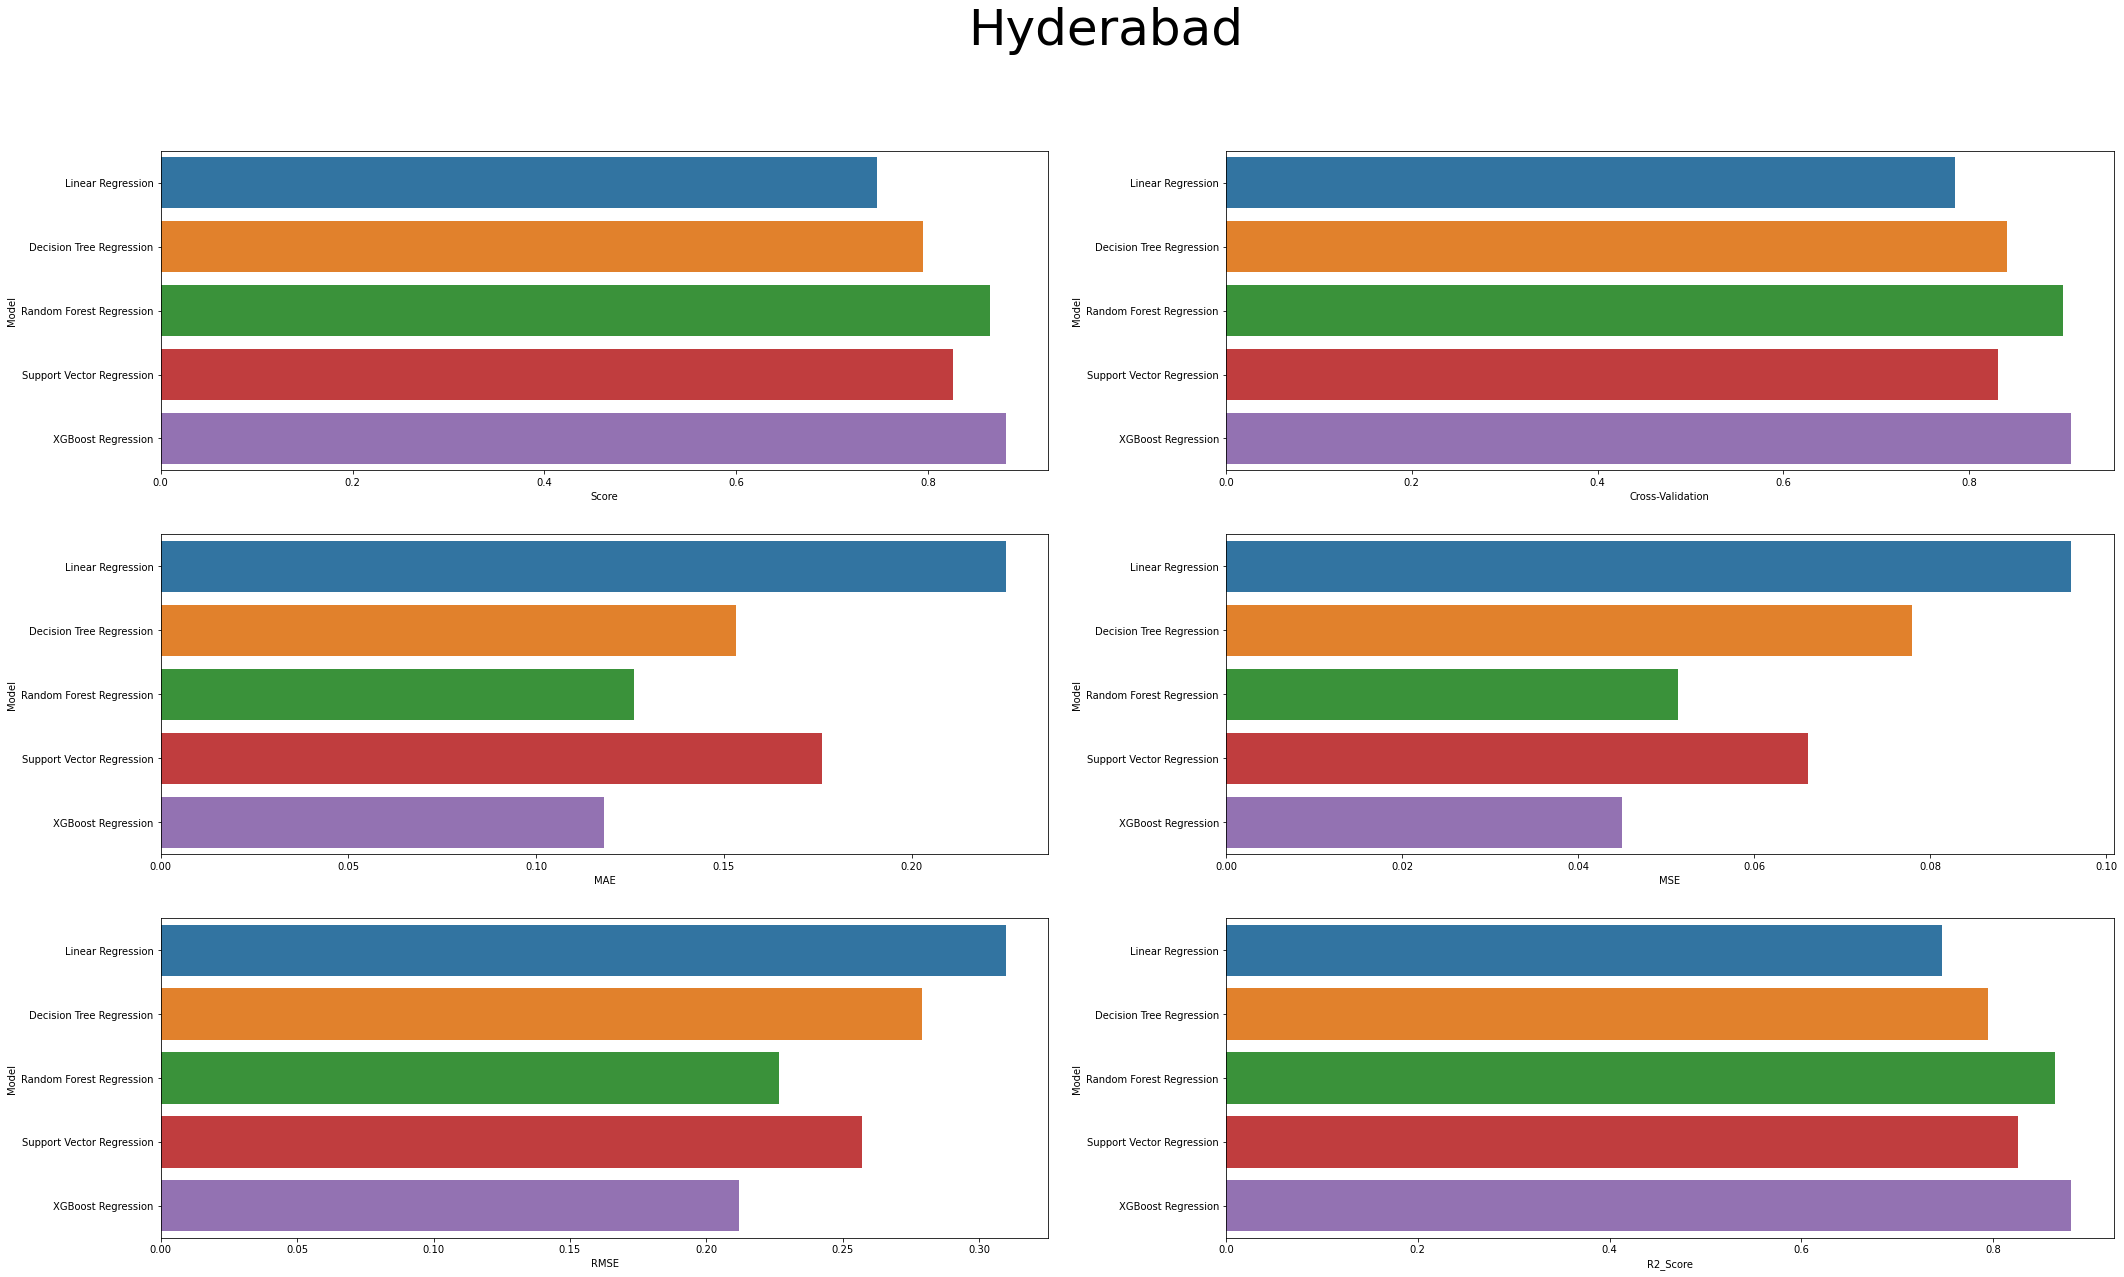

In [29]:
score_plots(hyd_scores, 'Hyderabad')

#### Kolkata
EDA:

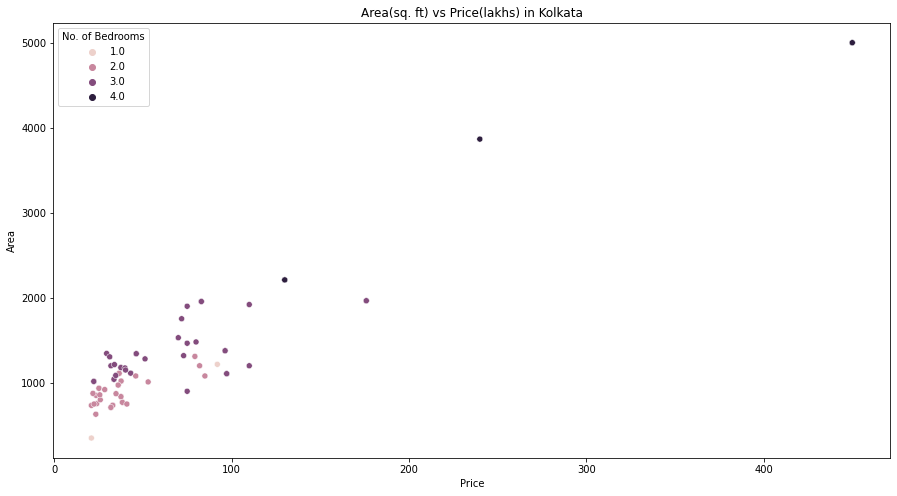

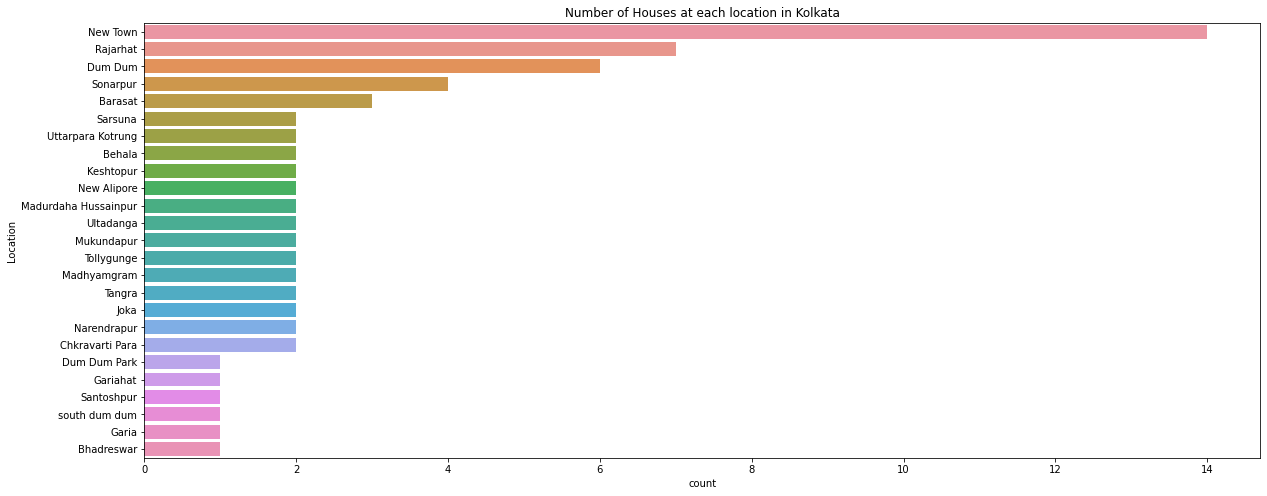

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


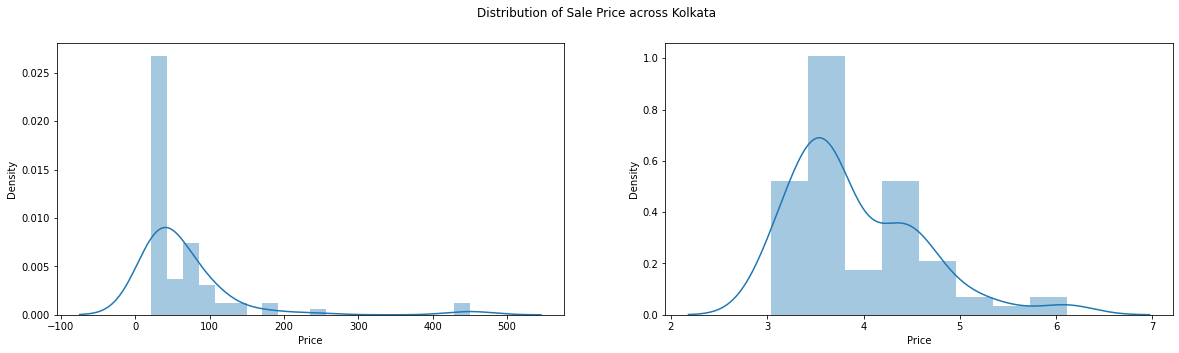

In [30]:
data_plots(kol_df, 'Kolkata')

Model Training and Performance:

In [31]:
kol_scores = models_evaluation(kol_df)
kol_scores

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\747310497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df.Location)


,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.440759,-0.129849,0.380638,0.271520,0.521076,0.440759
1,Decision Tree Regression,0.792235,0.375471,0.167671,0.100873,0.317605,0.792235
2,Random Forest Regression,0.856774,0.586445,0.221506,0.069538,0.263701,0.856774
3,Support Vector Regression,0.284429,0.466946,0.386624,0.347421,0.589424,0.284429
4,XGBoost Regression,0.826349,0.553237,0.188277,0.084310,0.290362,0.826349


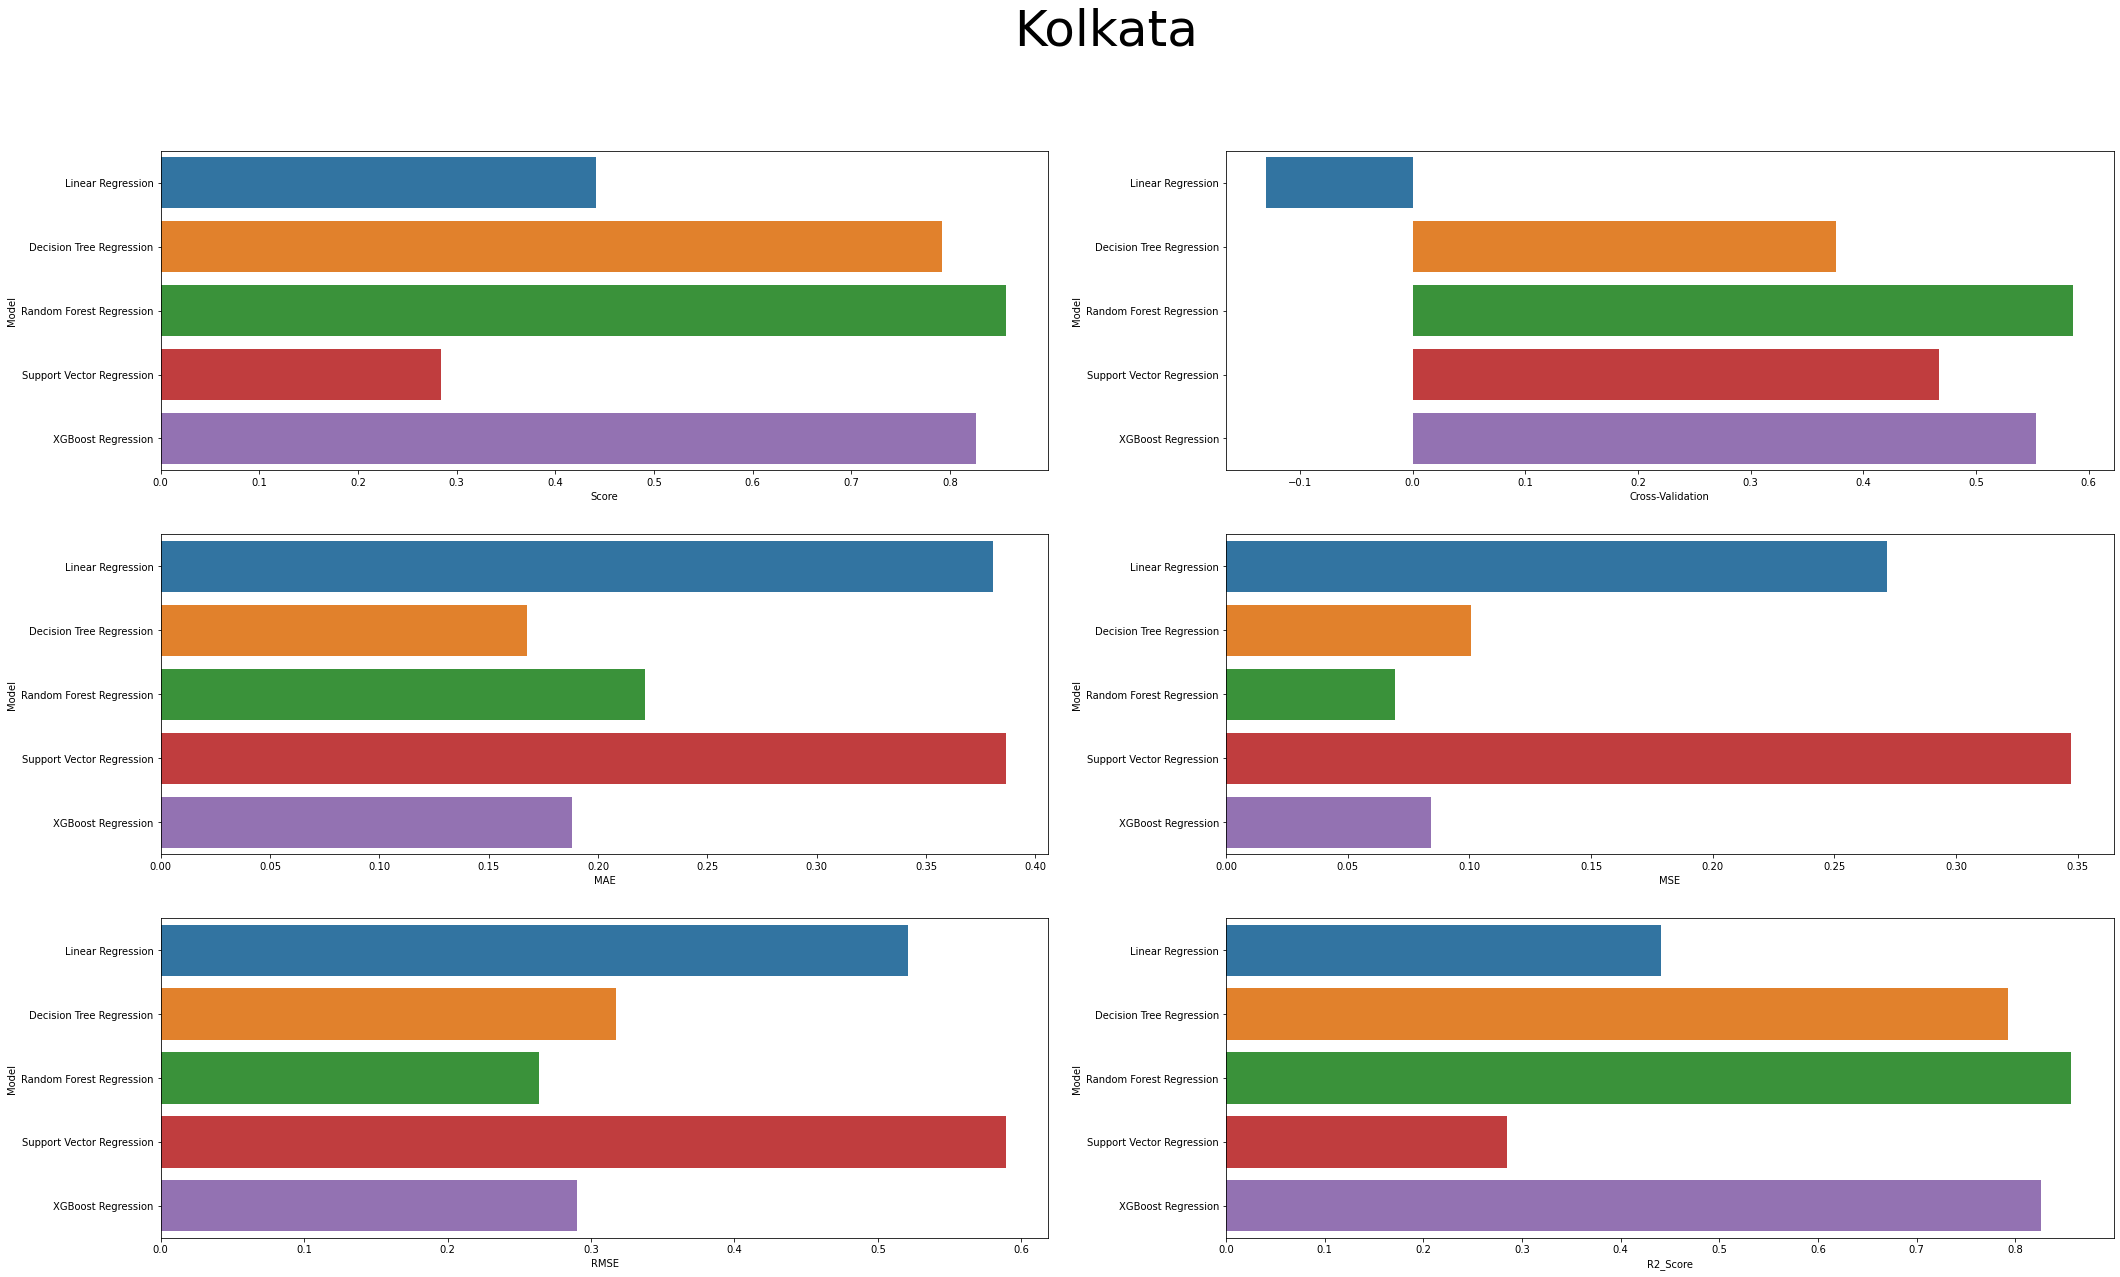

In [32]:
score_plots(kol_scores, 'Kolkata')

#### Mumbai
EDA:

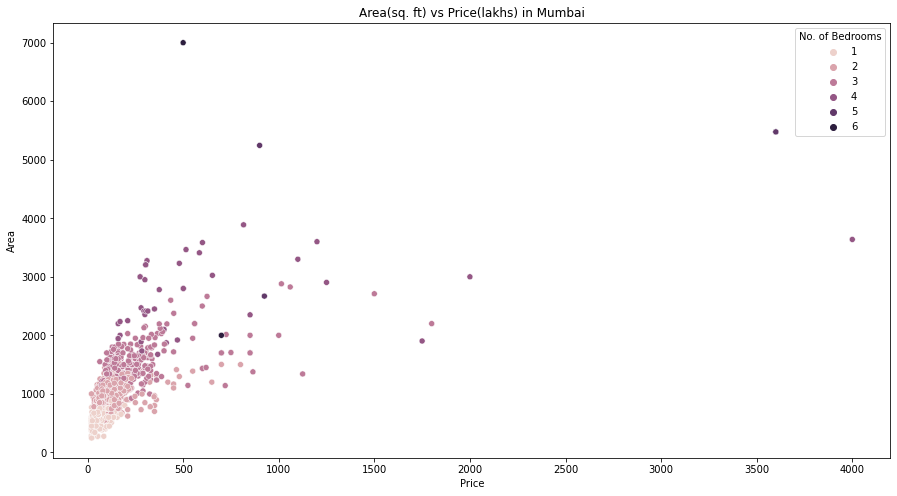

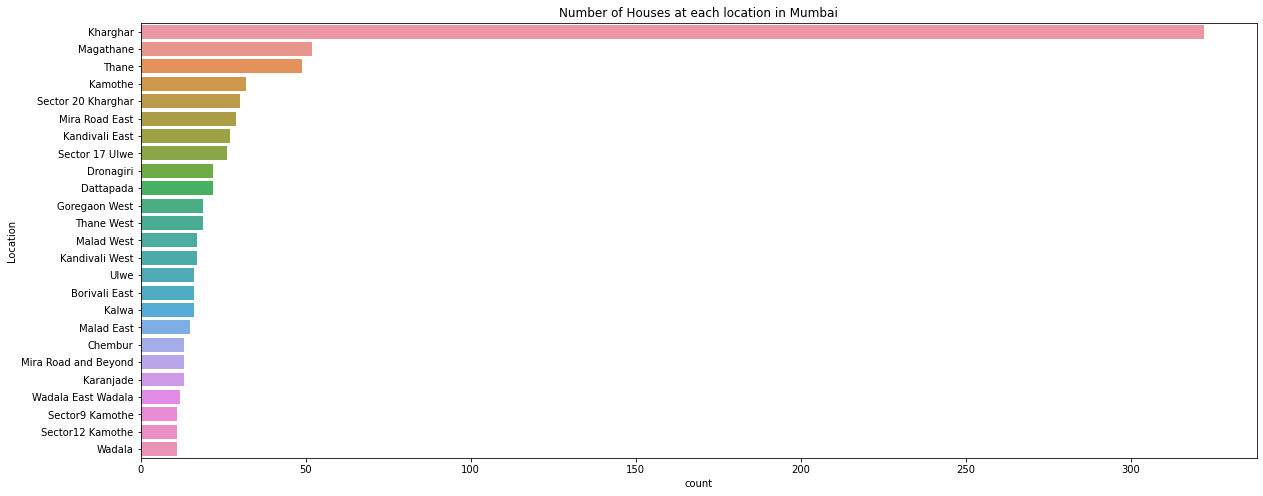

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


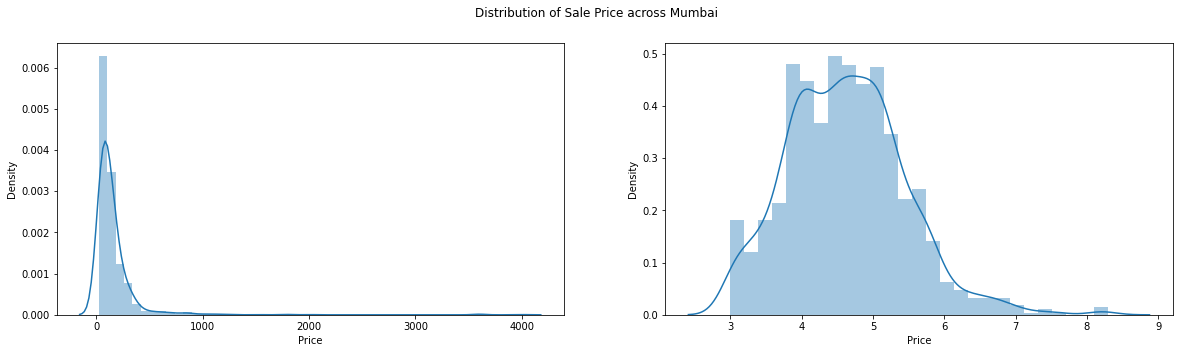

In [33]:
data_plots(mum_df, 'Mumbai')

Model Training and Performance:

In [34]:
mum_scores = models_evaluation(mum_df)
mum_scores

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\747310497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df.Location)


,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.599239,0.661841,0.358395,0.249539,0.499538,0.599239
1,Decision Tree Regression,0.658563,0.690571,0.255690,0.212600,0.461085,0.658563
2,Random Forest Regression,0.801474,0.830471,0.224698,0.123615,0.351589,0.801474
3,Support Vector Regression,0.758665,0.715489,0.275118,0.150270,0.387646,0.758665
4,XGBoost Regression,0.870037,0.845168,0.177876,0.080923,0.284469,0.870037


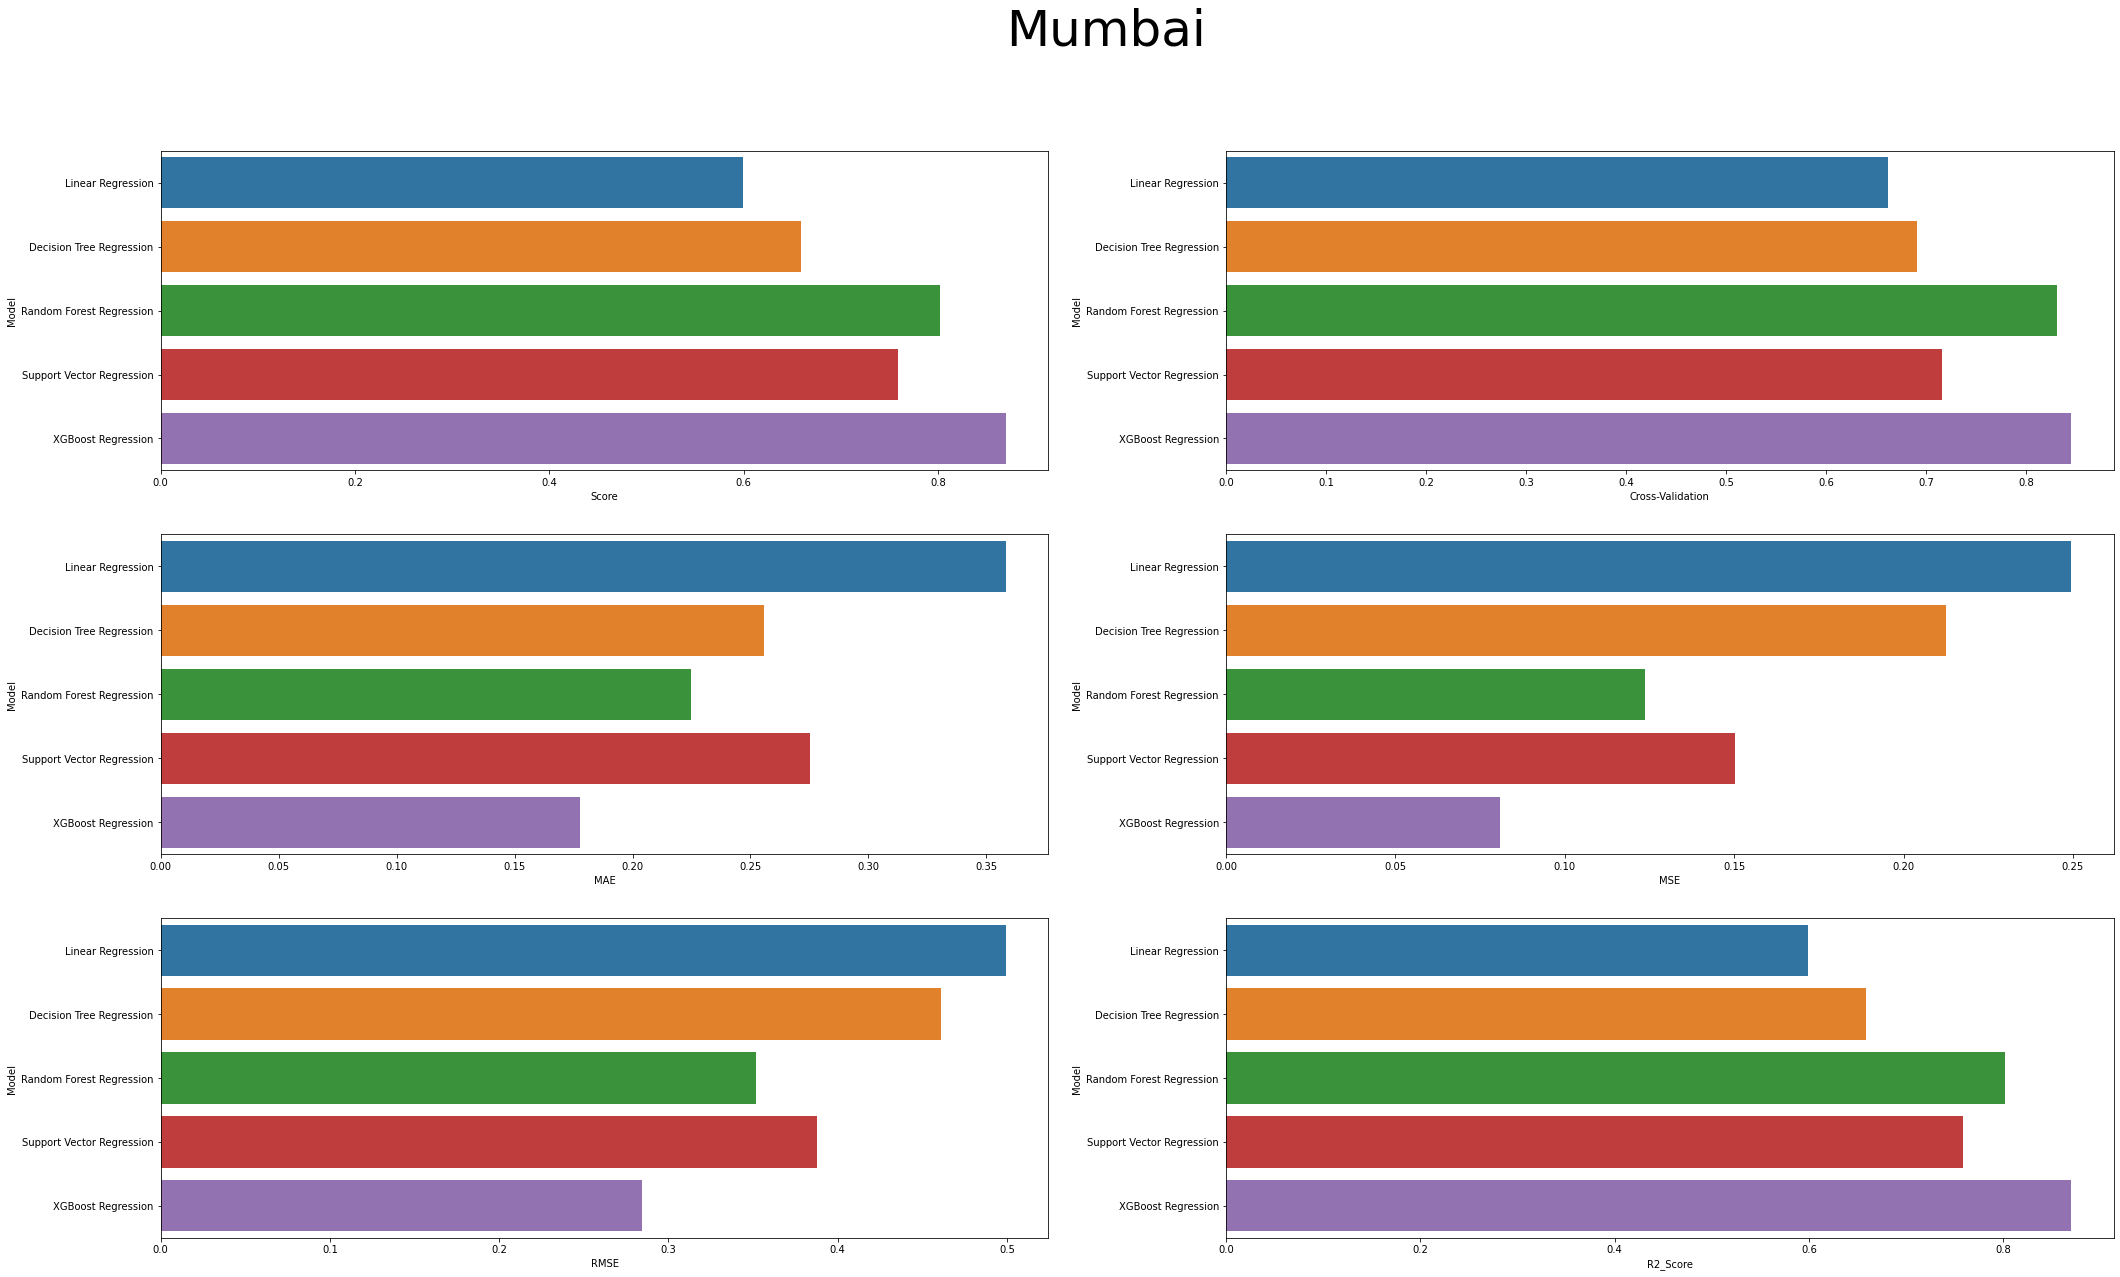

In [35]:
score_plots(mum_scores, 'Mumbai')

#### Merged Dataset

In [36]:
merged_df = merge_all(bang_df, chn_df, del_df, hyd_df, kol_df, mum_df)

C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\1649563439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['City'] = 'Bengaluru'
C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\1649563439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City'] = 'Chennai'
C:\Users\swatt\AppData\Local\Temp\ipykernel_14880\1649563439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

EDA:

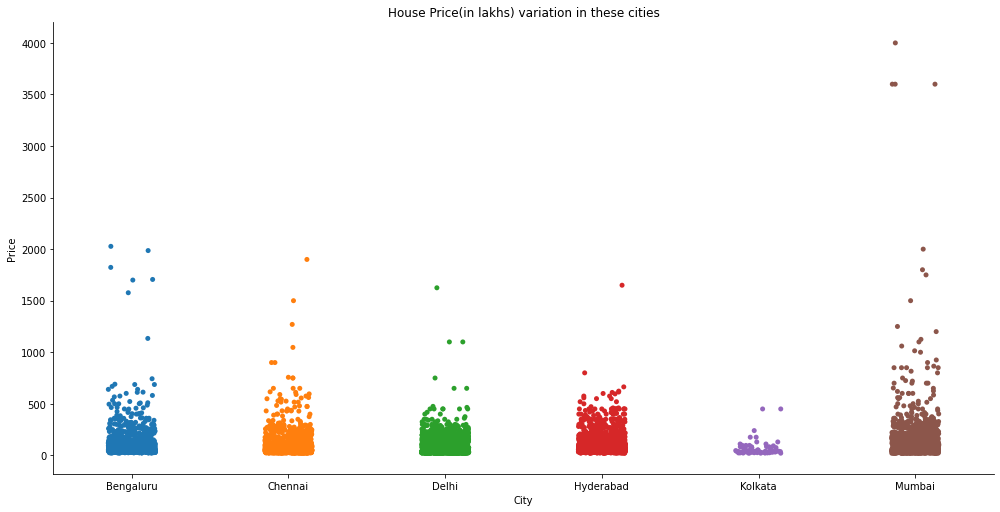

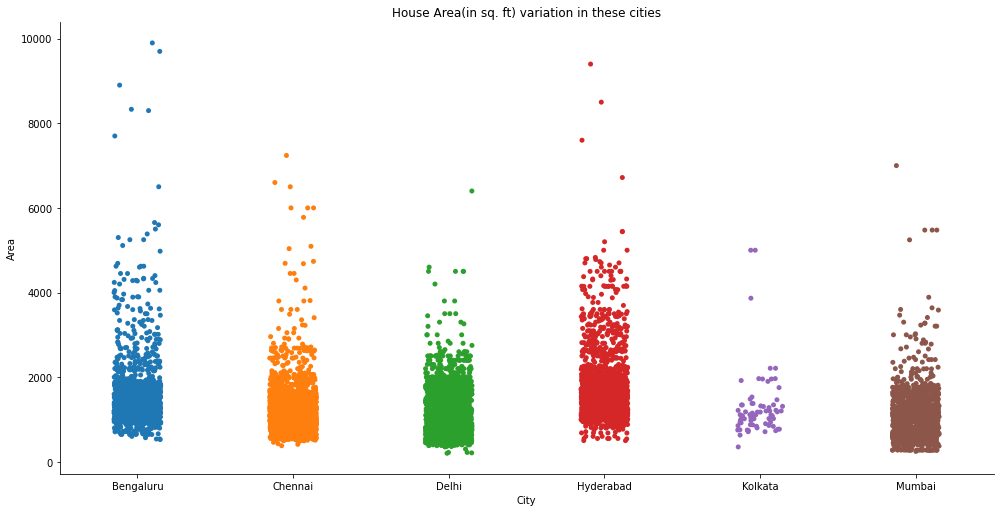

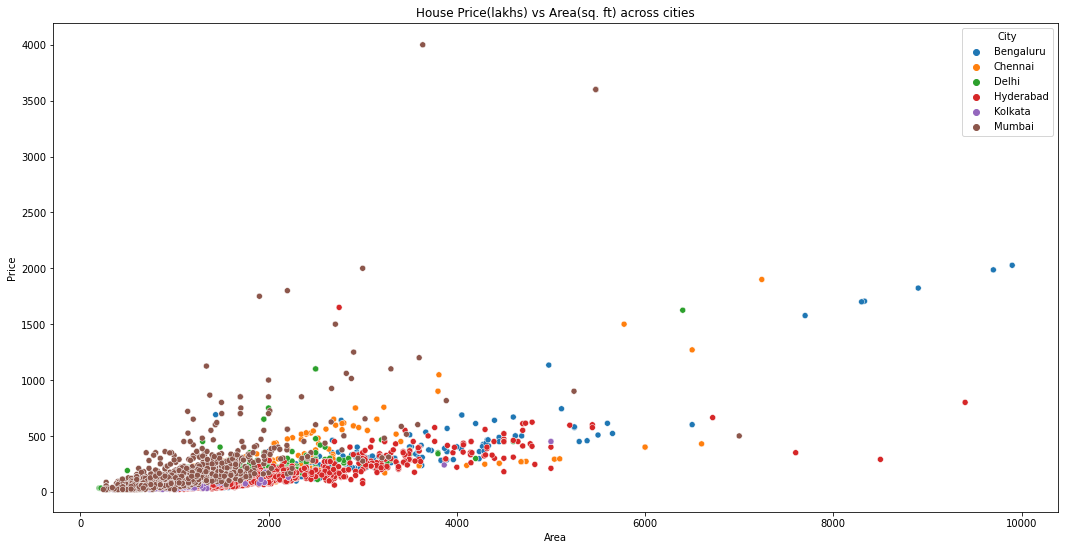

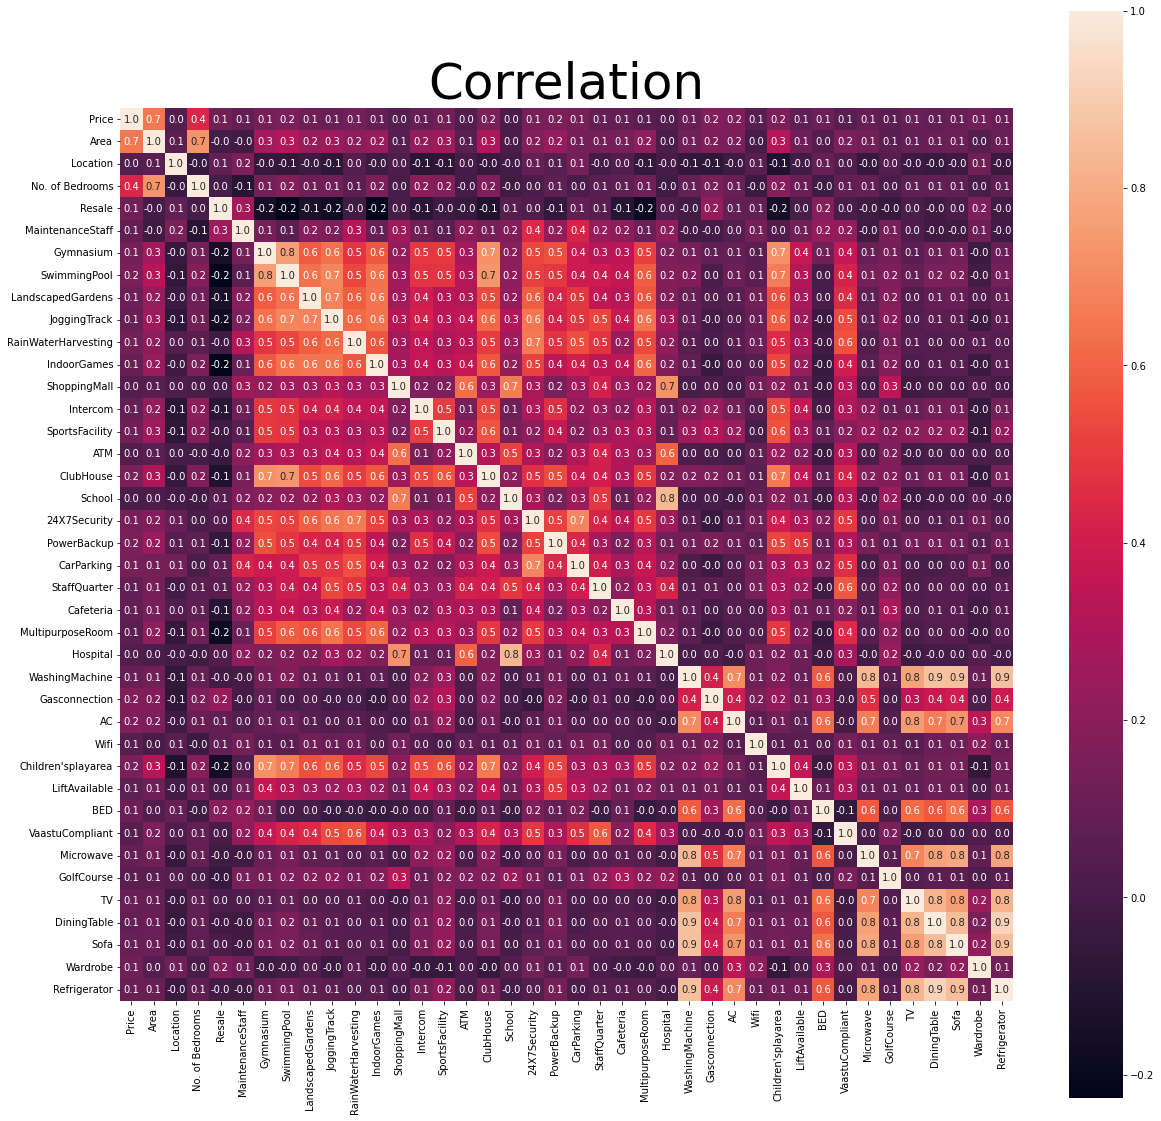

In [37]:
merged_plots(merged_df)

Model Training and Performance:

In [38]:
merged_df['City'] = LabelEncoder().fit_transform(merged_df.City)
mergeddf_scores = models_evaluation(merged_df)
mergeddf_scores

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.653012,0.702832,0.304627,0.181645,0.426198,0.653012
1,Decision Tree Regression,0.841708,0.814603,0.150016,0.082864,0.287862,0.841708
2,Random Forest Regression,0.890900,0.898551,0.134950,0.057113,0.238983,0.890900
3,Support Vector Regression,0.802593,0.827788,0.201123,0.103340,0.321466,0.802593
4,XGBoost Regression,0.893725,0.909553,0.140814,0.055634,0.235868,0.893725


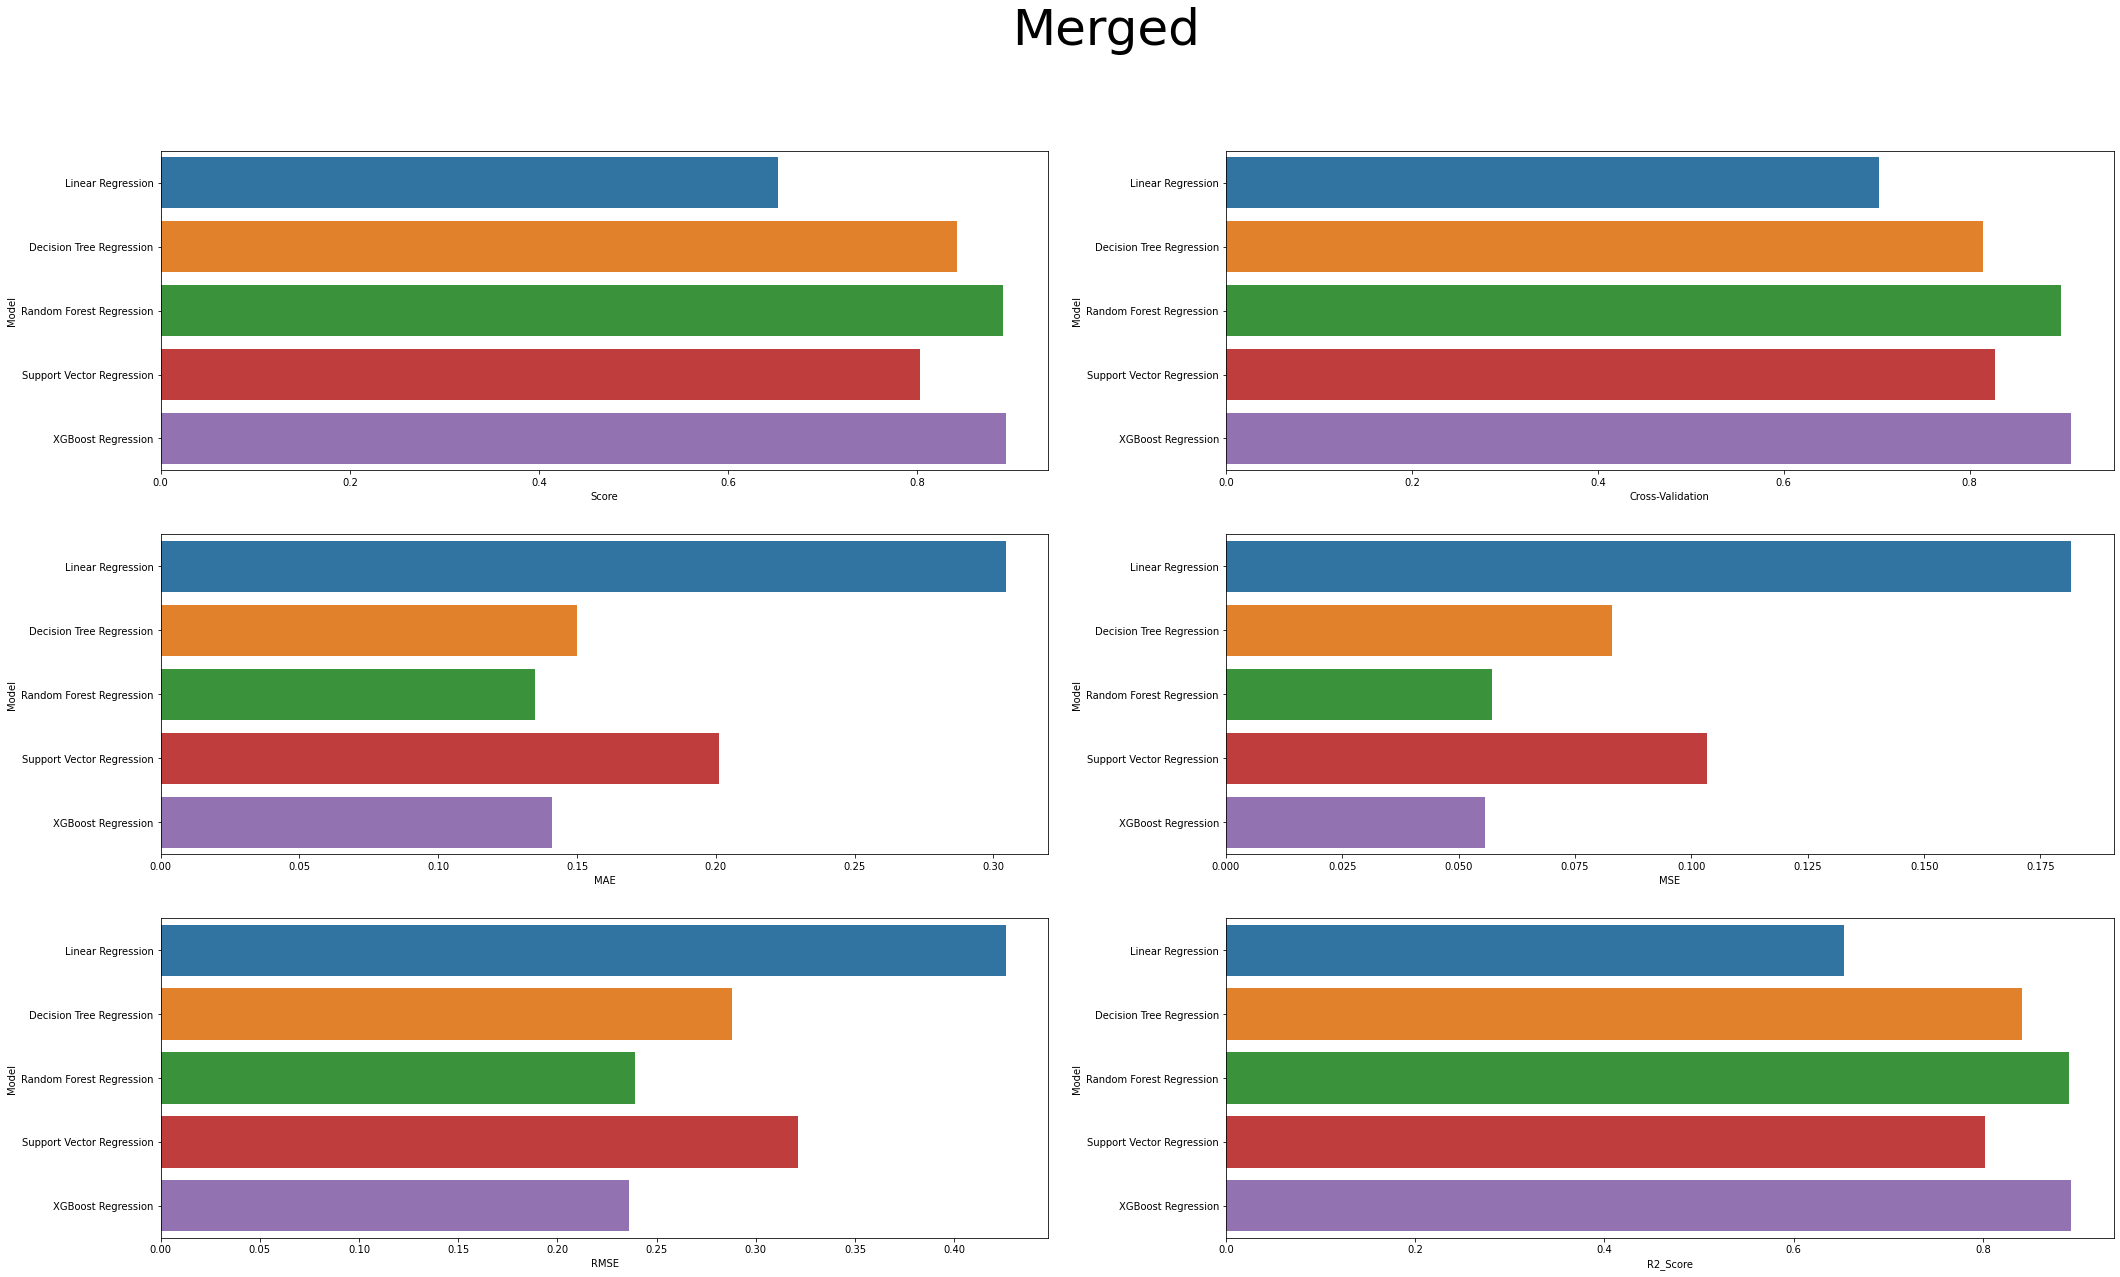

In [39]:
score_plots(mergeddf_scores, 'Merged')

## Approach 2 (Optional):
Taking only the features with non missing values!

This is optional. It is there just to learn and explore a different approach to see how the performance and data analysis get affected.


Data Preprocessing:

In [40]:
#loading the datasets again
bang_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Bangalore.csv')
chn_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Chennai.csv')
del_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Delhi.csv')
hyd_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Hyderabad.csv')
kol_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Kolkata.csv')
mum_df = pd.read_csv('C:/STUFF/Code/Machine Learning/Housing Price Prediction/Mumbai.csv')

#Using the features with non-missing values only
bang_df = bang_df[['Price', 'Area', 'No. of Bedrooms', 'Resale', 'Location']].copy()
chn_df = chn_df[['Price', 'Area', 'No. of Bedrooms', 'Resale', 'Location']].copy()
del_df = del_df[['Price', 'Area', 'No. of Bedrooms', 'Resale', 'Location']].copy()
hyd_df = hyd_df[['Price', 'Area', 'No. of Bedrooms', 'Resale', 'Location']].copy()
kol_df = kol_df[['Price', 'Area', 'No. of Bedrooms', 'Resale', 'Location']].copy()
mum_df = bang_df[['Price', 'Area', 'No. of Bedrooms', 'Resale', 'Location']].copy()

#Converting the price from Rupees to Lakhs
bang_df['Price'] = bang_df['Price']/10**5
chn_df['Price'] = chn_df['Price']/10**5
del_df['Price'] = del_df['Price']/10**5
hyd_df['Price'] = hyd_df['Price']/10**5
kol_df['Price'] = kol_df['Price']/10**5
mum_df['Price'] = mum_df['Price']/10**5

#Checking the data size
print("Bengaluru: ", bang_df.shape)
print("Chennai: ", chn_df.shape)
print("Delhi: ", del_df.shape)
print("Hyderabad: ", hyd_df.shape)
print("Kolkata: ", kol_df.shape)
print("Mumbai: ", mum_df.shape)

Bengaluru:  (6207, 5)
Chennai:  (5014, 5)
Delhi:  (4998, 5)
Hyderabad:  (2518, 5)
Kolkata:  (6507, 5)
Mumbai:  (6207, 5)


### Exploratory Data Analysis of each dataset and the merged one followed by the model training and performance results!

#### Bengaluru
EDA:

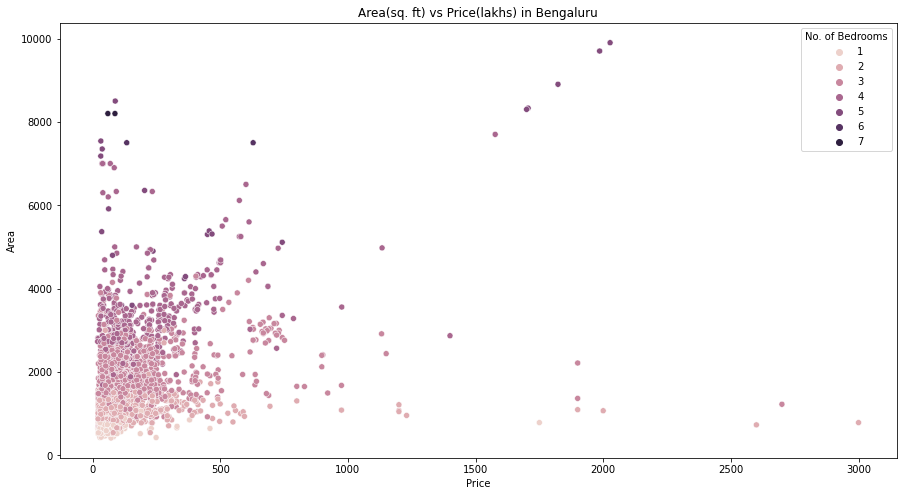

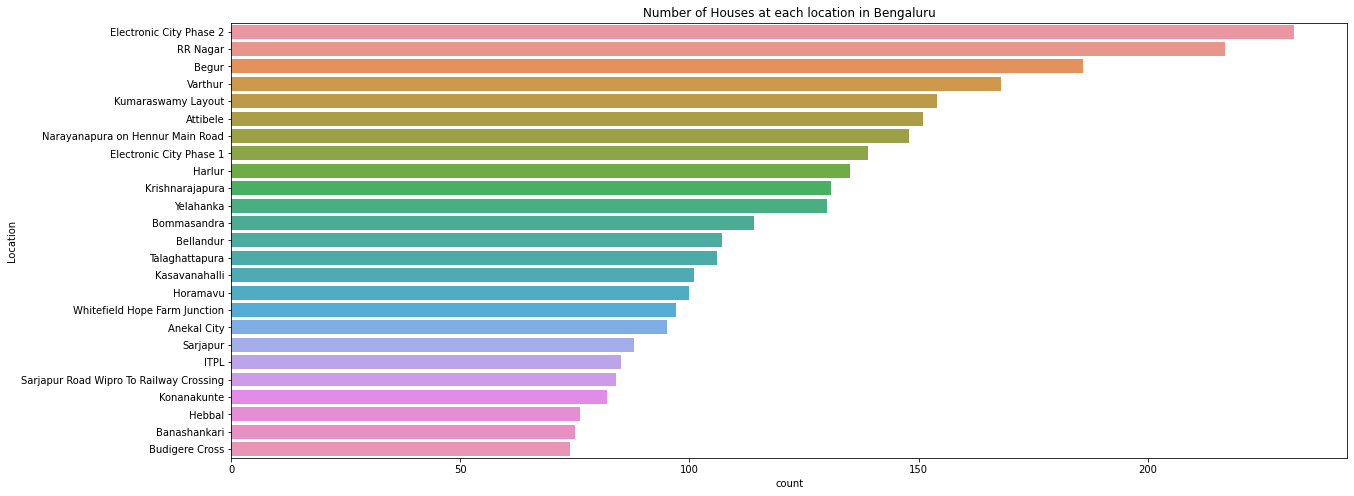

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


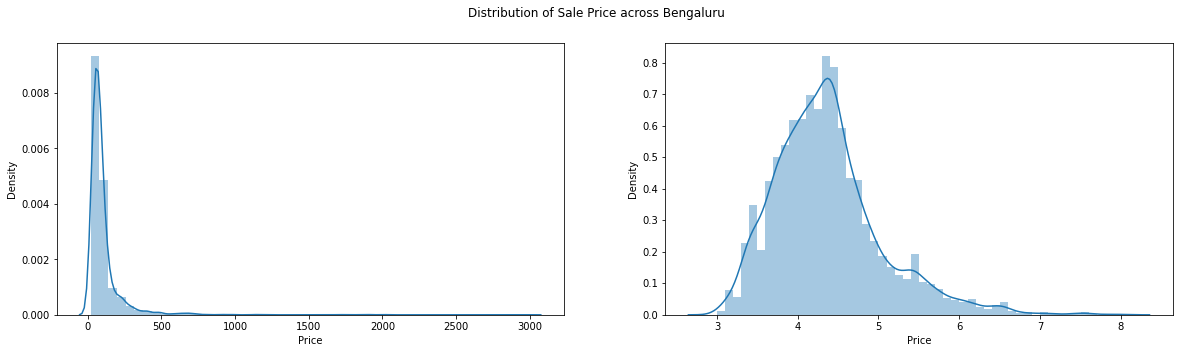

In [41]:
data_plots(bang_df, 'Bengaluru')

Model Training and Performance:

In [42]:
bang_sc = models_evaluation(bang_df)
bang_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.211675,0.202398,0.417366,0.341123,0.584058,0.211675
1,Decision Tree Regression,0.100260,-0.081537,0.410064,0.389334,0.623967,0.100260
2,Random Forest Regression,0.294158,0.225634,0.374032,0.305431,0.552658,0.294158
3,Support Vector Regression,0.286649,0.236825,0.390024,0.308681,0.555590,0.286649
4,XGBoost Regression,0.339492,0.256085,0.362893,0.285814,0.534616,0.339492


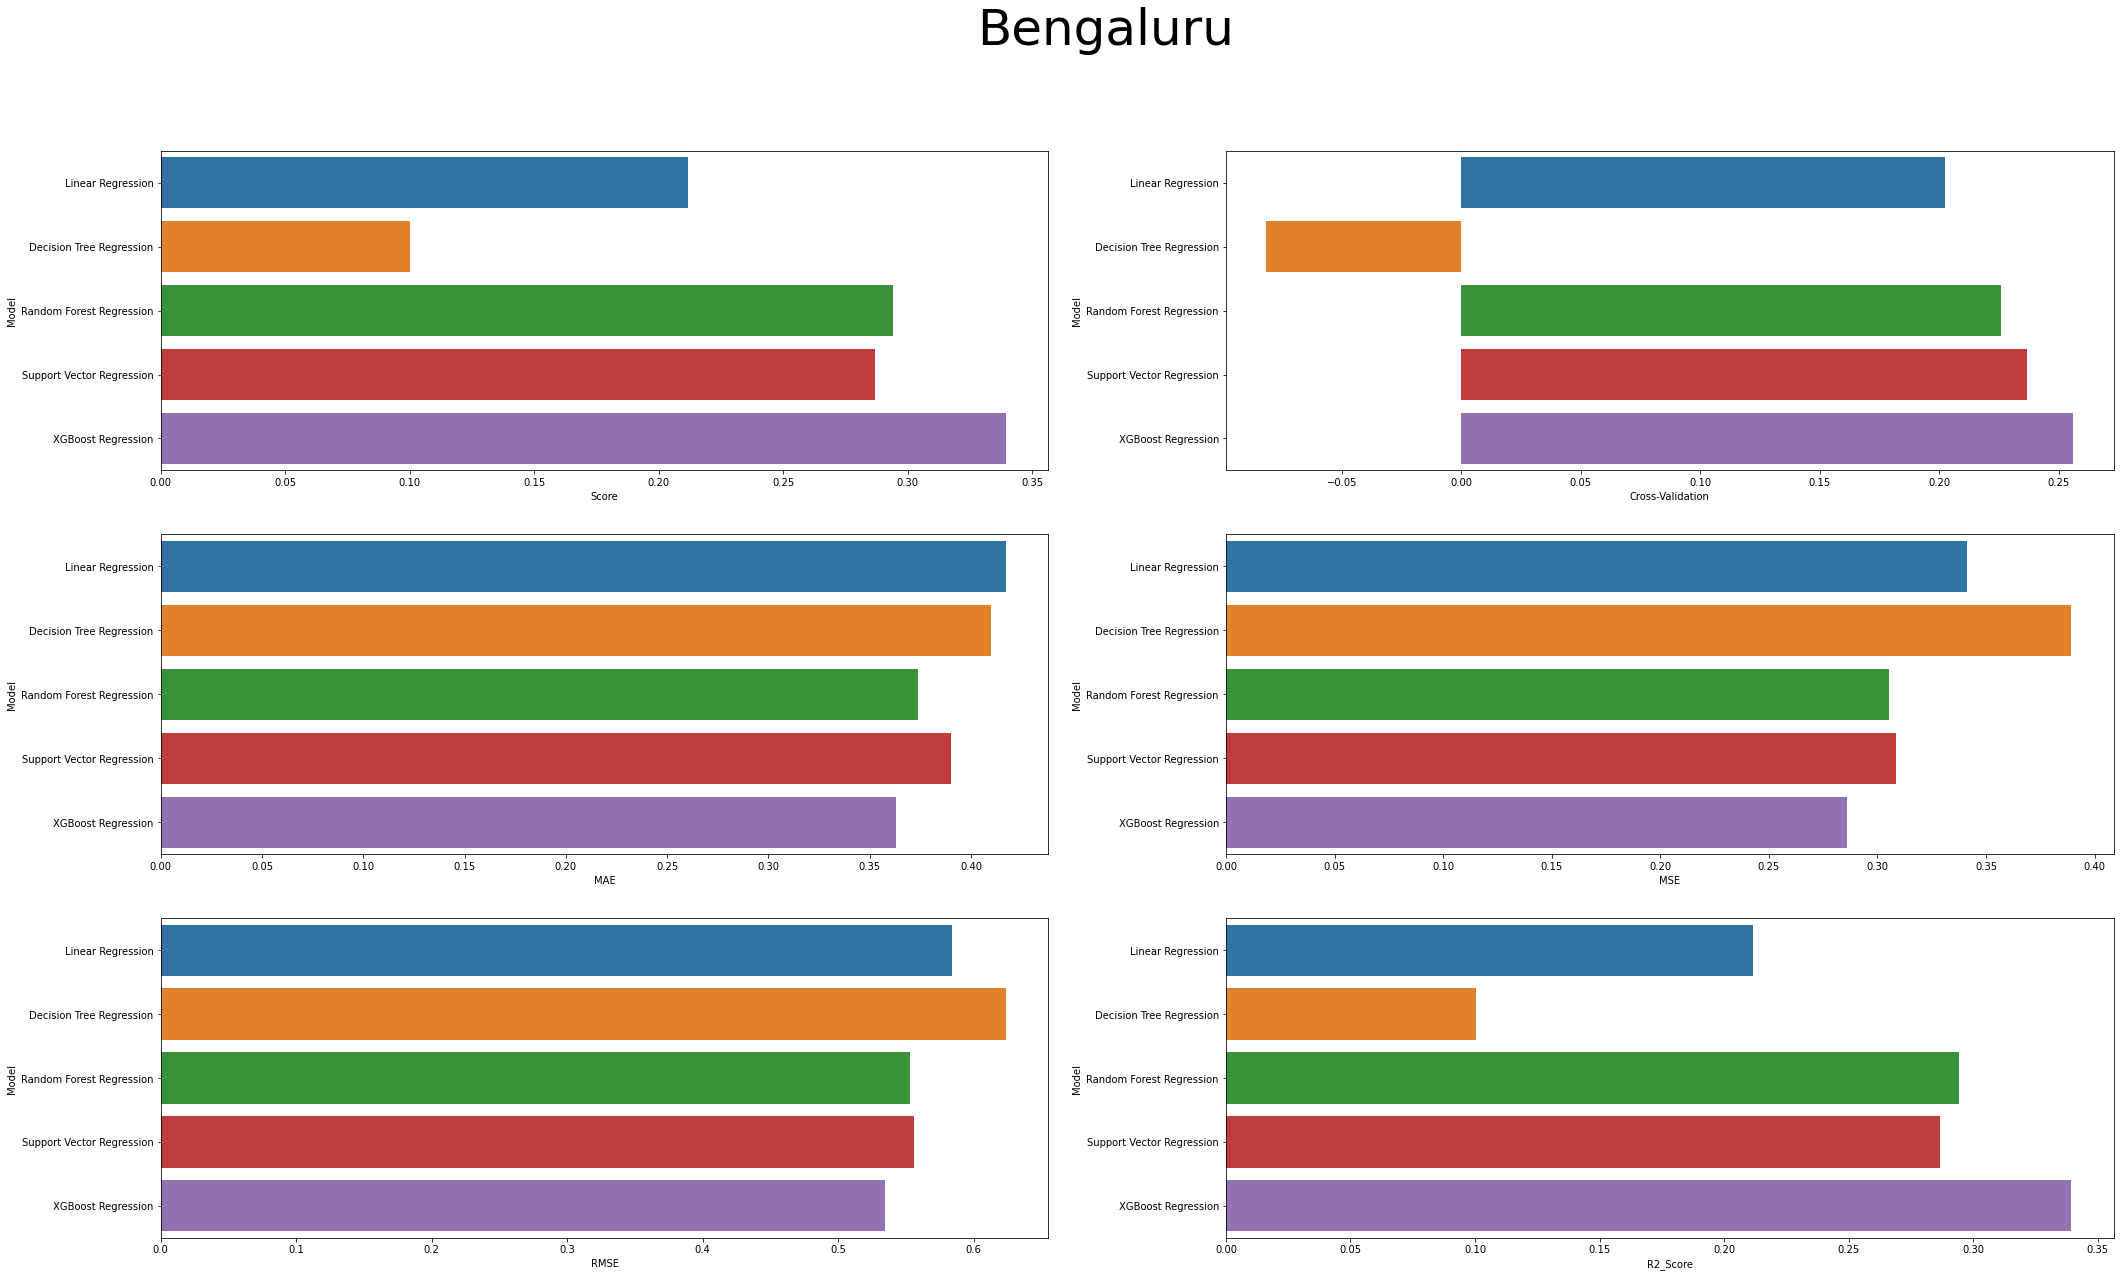

In [43]:
score_plots(bang_sc, 'Bengaluru')

#### Chennai
EDA:

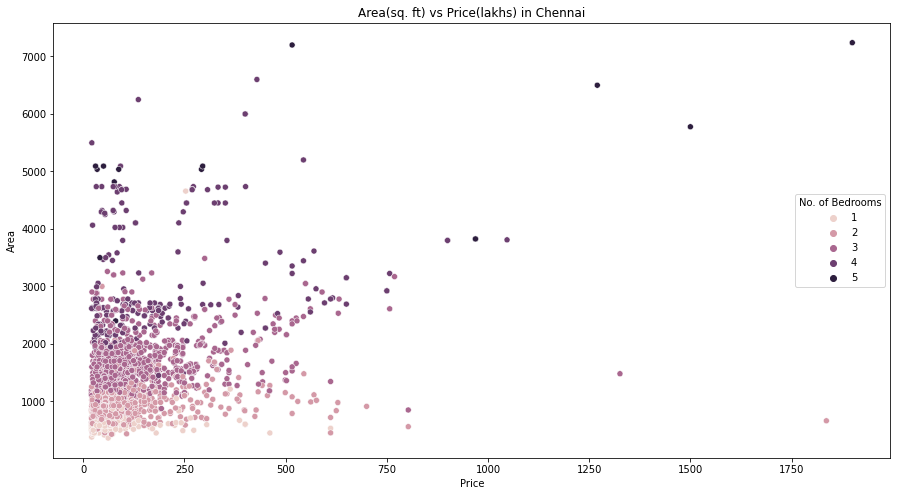

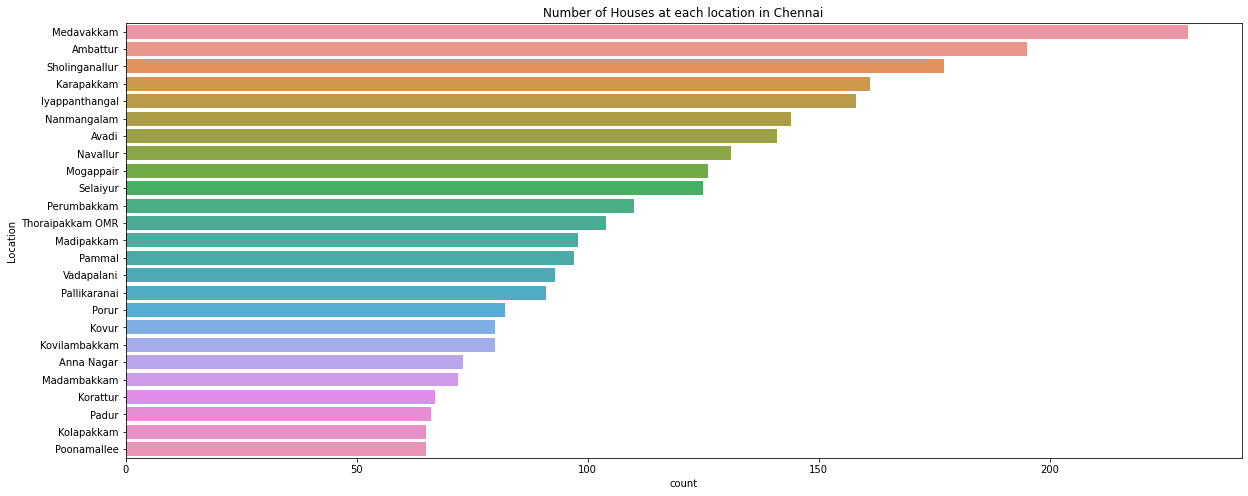

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


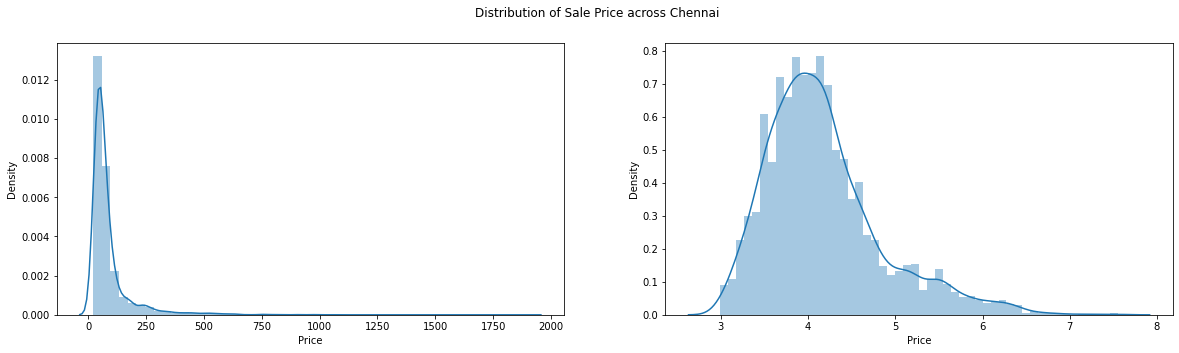

In [44]:
data_plots(chn_df, 'Chennai')

Model Training and Performance:

In [45]:
chn_sc = models_evaluation(chn_df)
chn_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.223844,0.232270,0.407583,0.331158,0.575464,0.223844
1,Decision Tree Regression,-0.126820,-0.059653,0.432510,0.480774,0.693379,-0.126820
2,Random Forest Regression,0.231082,0.250657,0.372965,0.328070,0.572774,0.231082
3,Support Vector Regression,0.231471,0.241060,0.381402,0.327904,0.572629,0.231471
4,XGBoost Regression,0.242203,0.260028,0.370431,0.323325,0.568617,0.242203


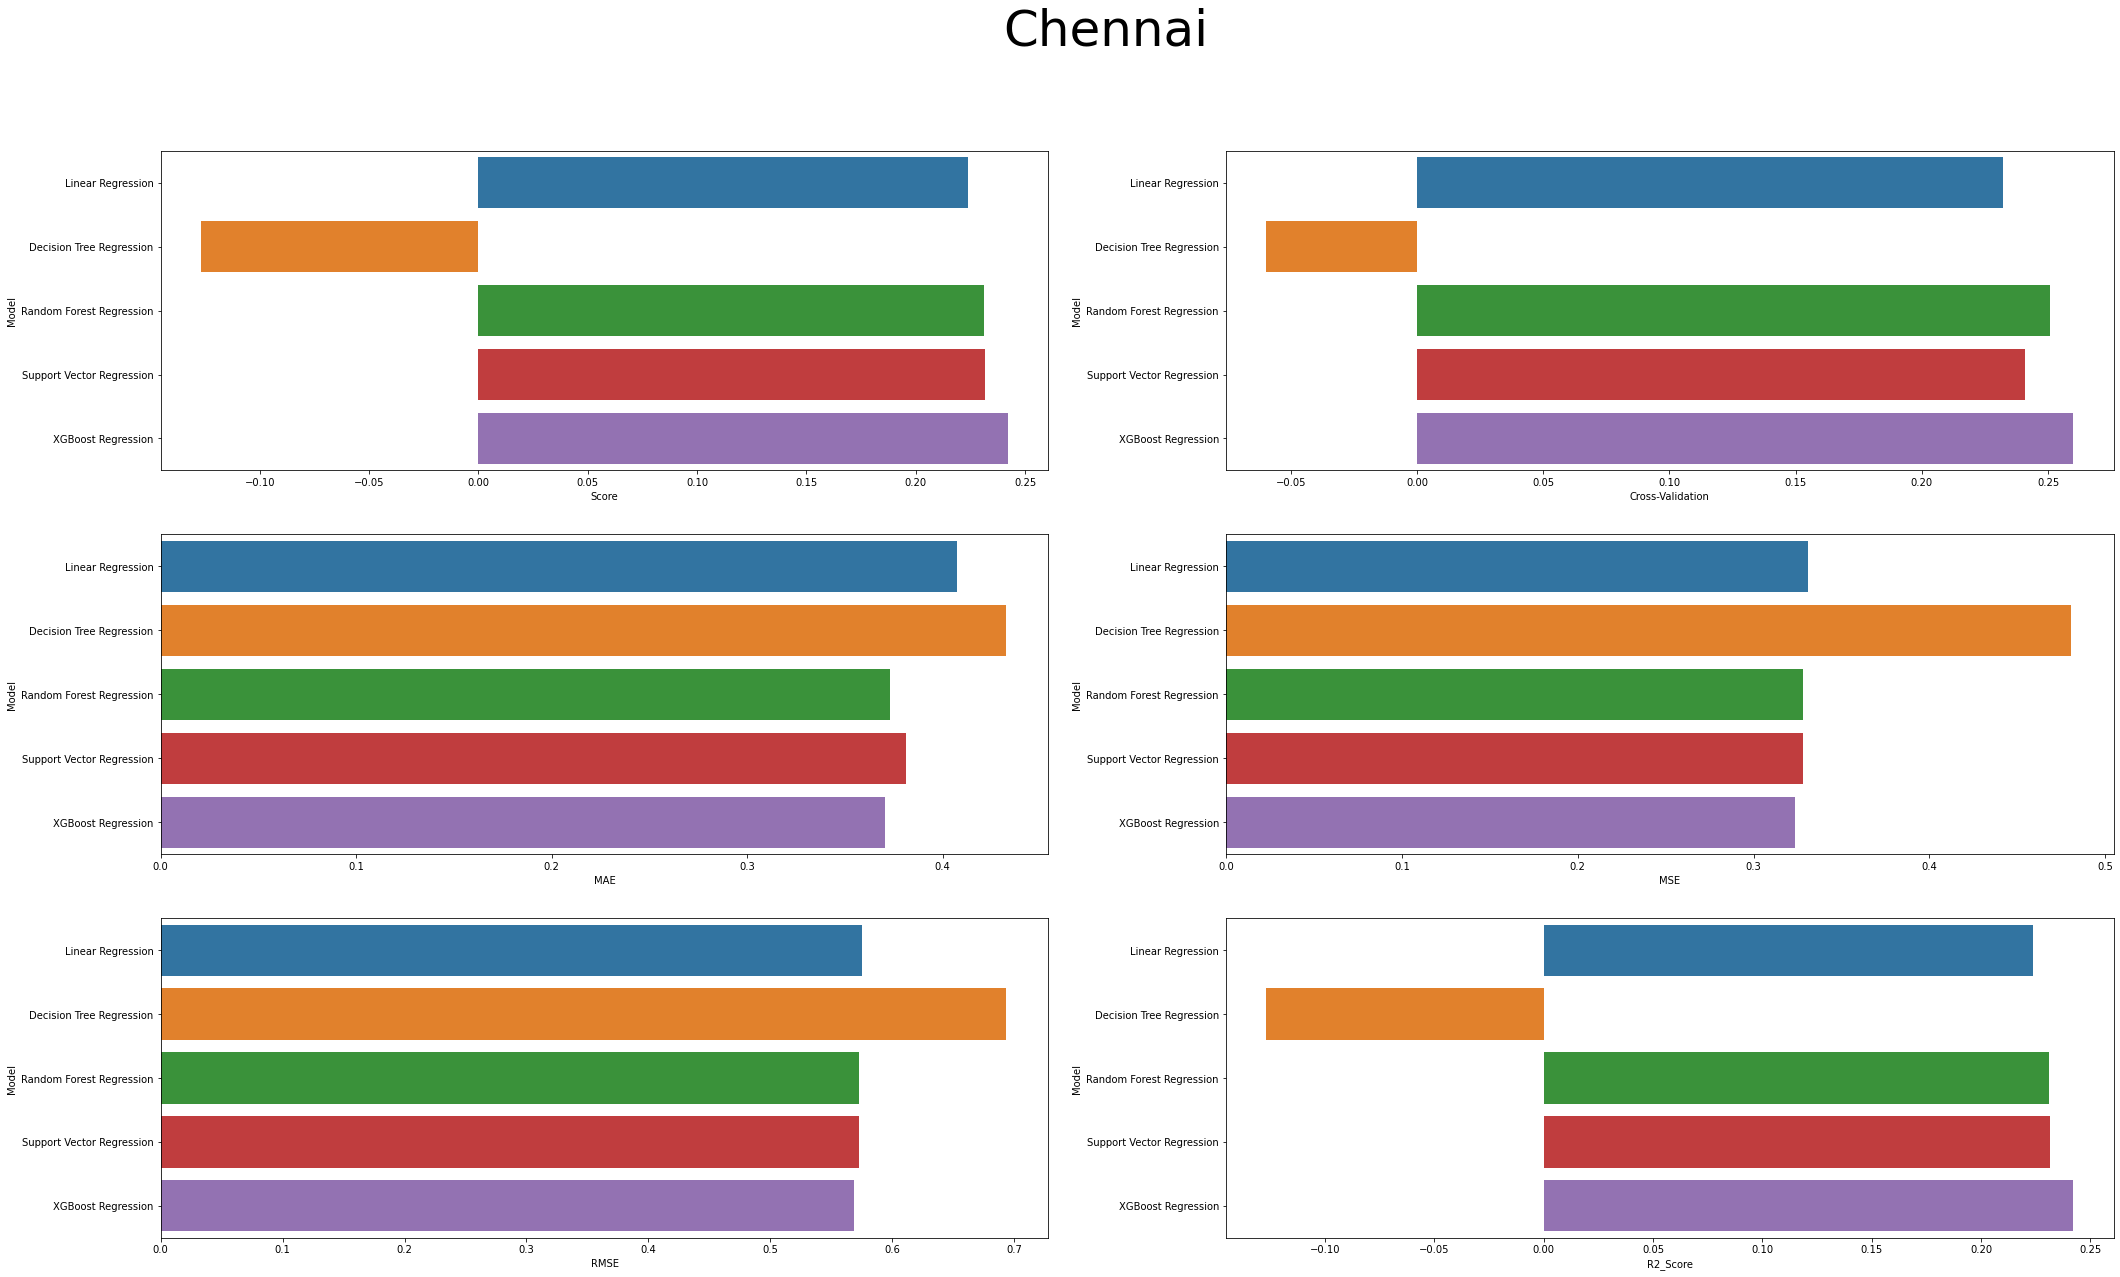

In [46]:
score_plots(chn_sc, 'Chennai')

#### Delhi
EDA:

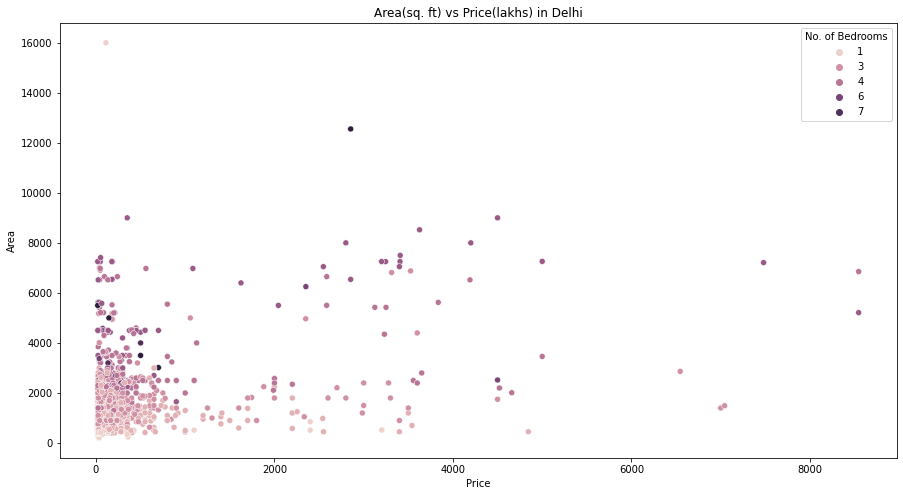

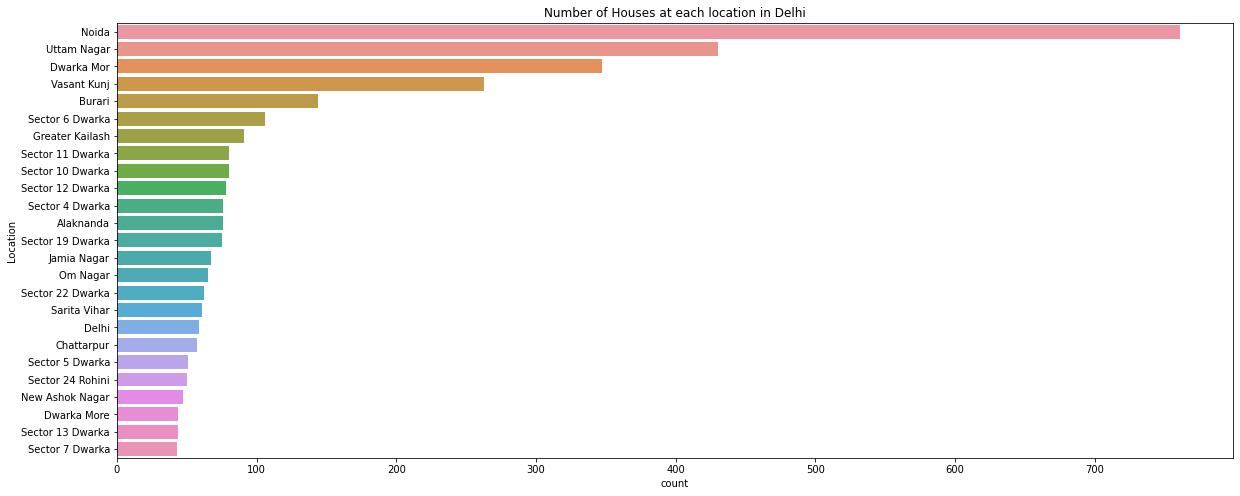

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


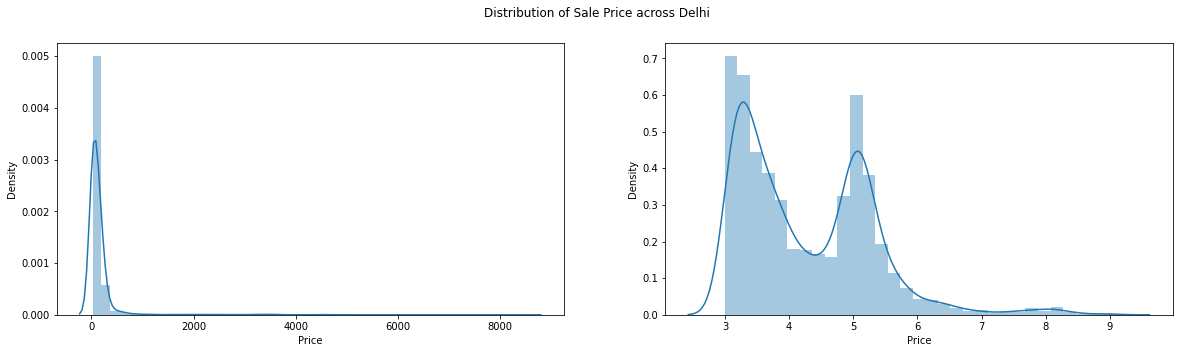

In [47]:
data_plots(del_df, 'Delhi')

Model Training and Performance:

In [48]:
del_sc = models_evaluation(del_df)
del_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.243425,0.289921,0.656012,0.729138,0.853896,0.243425
1,Decision Tree Regression,0.261814,0.282729,0.478864,0.711415,0.843454,0.261814
2,Random Forest Regression,0.473823,0.489848,0.409875,0.507095,0.712106,0.473823
3,Support Vector Regression,0.386133,0.425460,0.462012,0.591604,0.769158,0.386133
4,XGBoost Regression,0.469444,0.477184,0.405953,0.511315,0.715063,0.469444


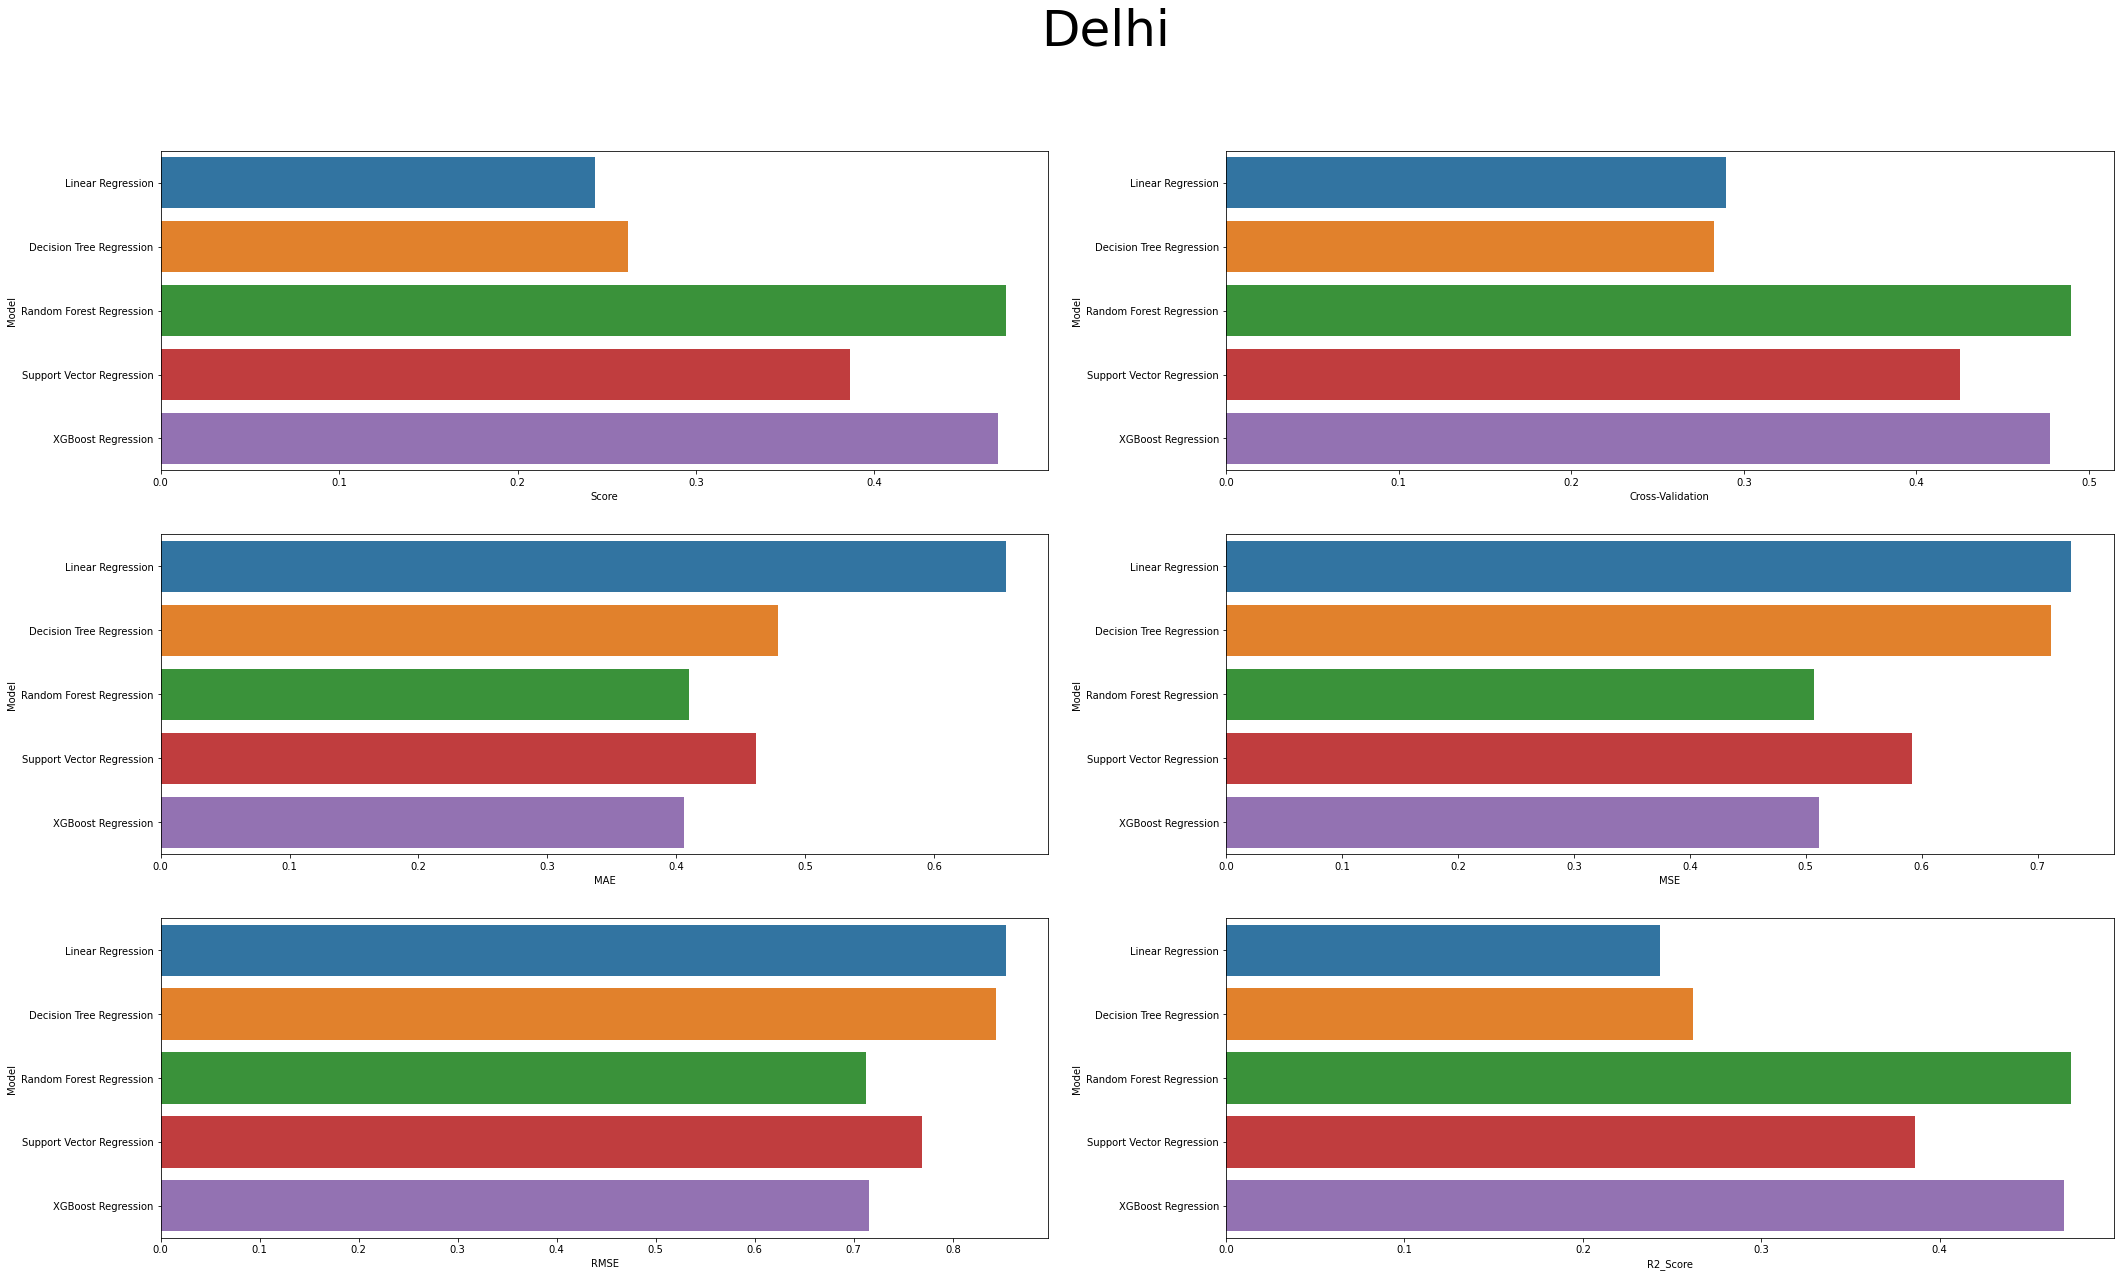

In [49]:
score_plots(del_sc, 'Delhi')

#### Hyderabad
EDA:

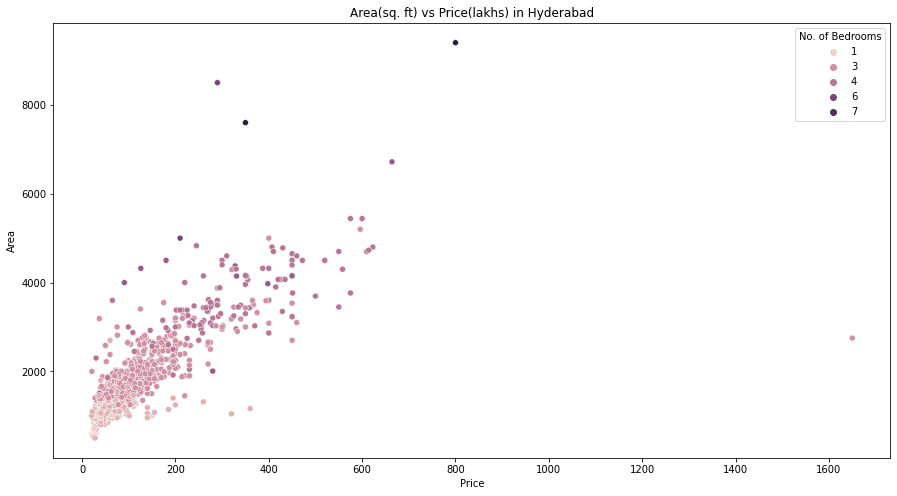

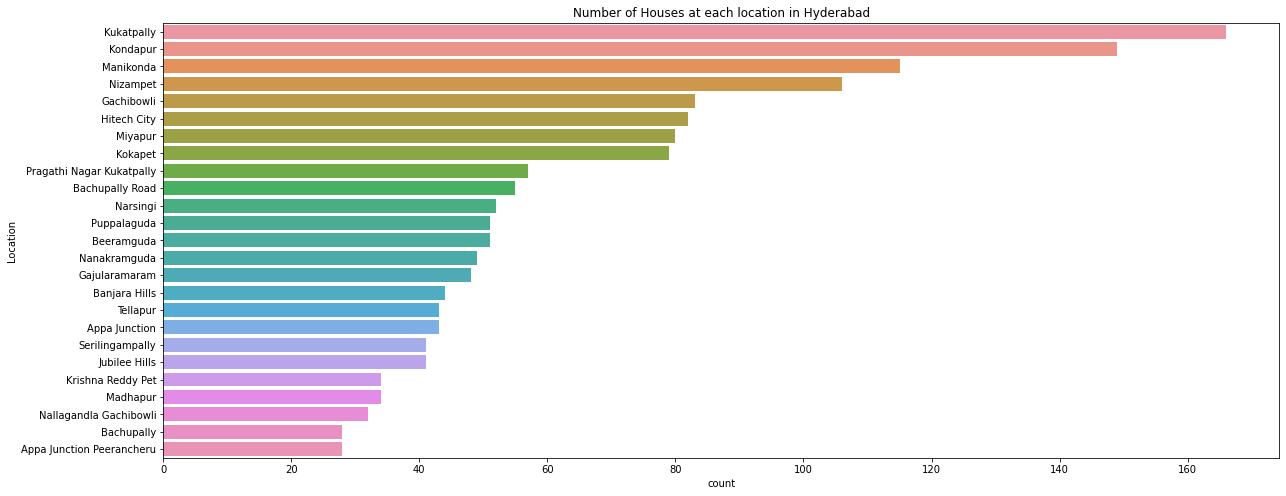

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


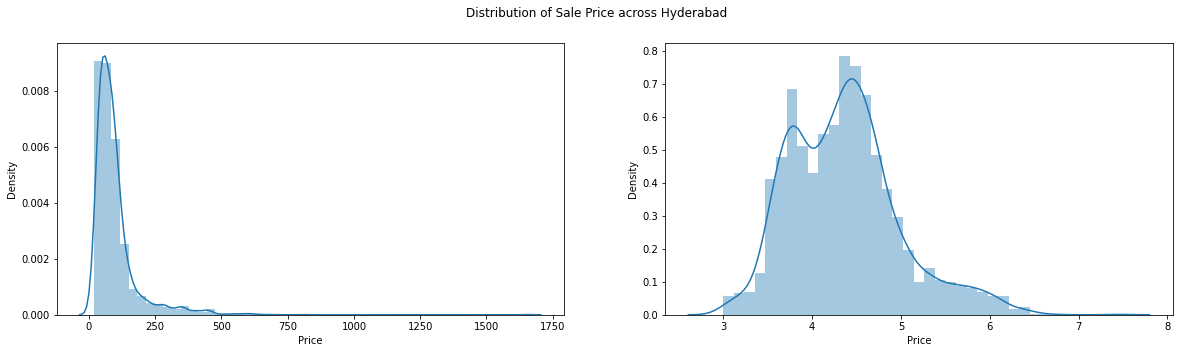

In [50]:
data_plots(hyd_df, 'Hyderabad')

Model Training and Performance:

In [51]:
hyd_sc = models_evaluation(hyd_df)
hyd_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.687120,0.678929,0.272260,0.115035,0.339168,0.687120
1,Decision Tree Regression,0.774762,0.719166,0.149980,0.082812,0.287771,0.774762
2,Random Forest Regression,0.836982,0.821277,0.139586,0.059936,0.244818,0.836982
3,Support Vector Regression,0.757379,0.766439,0.215631,0.089203,0.298669,0.757379
4,XGBoost Regression,0.830945,0.821713,0.141353,0.062156,0.249310,0.830945


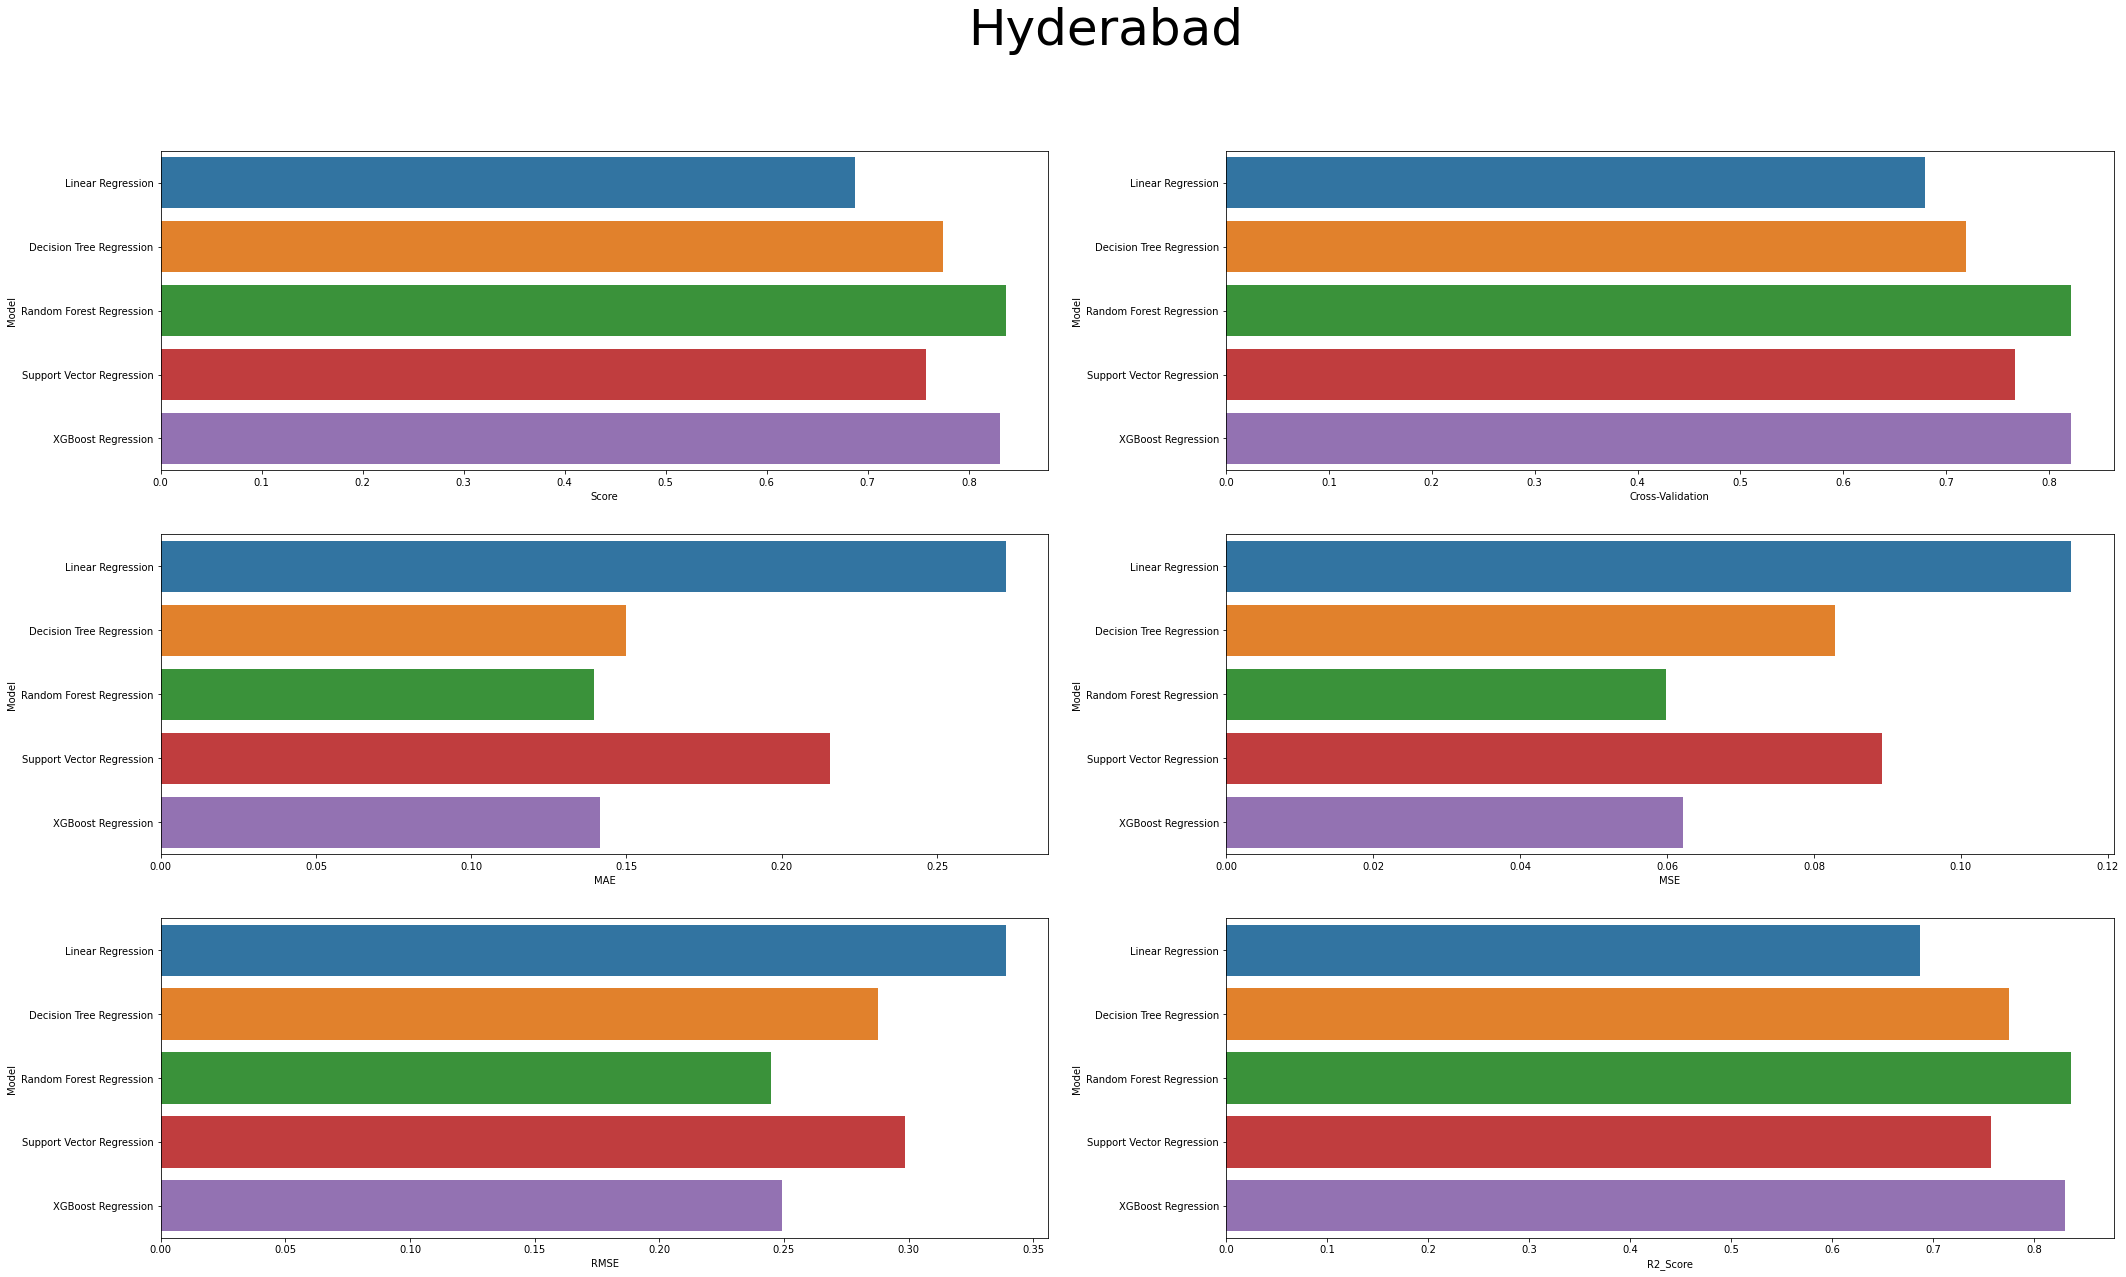

In [52]:
score_plots(hyd_sc, 'Hyderabad')

#### Kolkata
EDA:

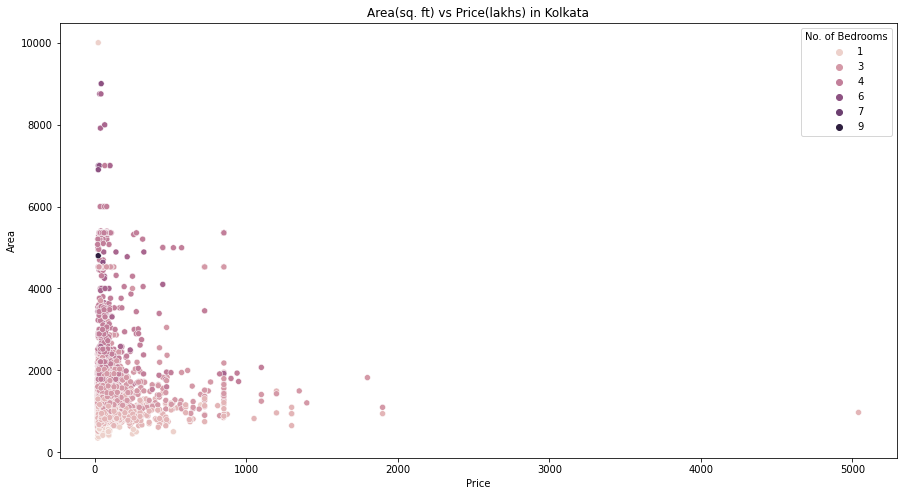

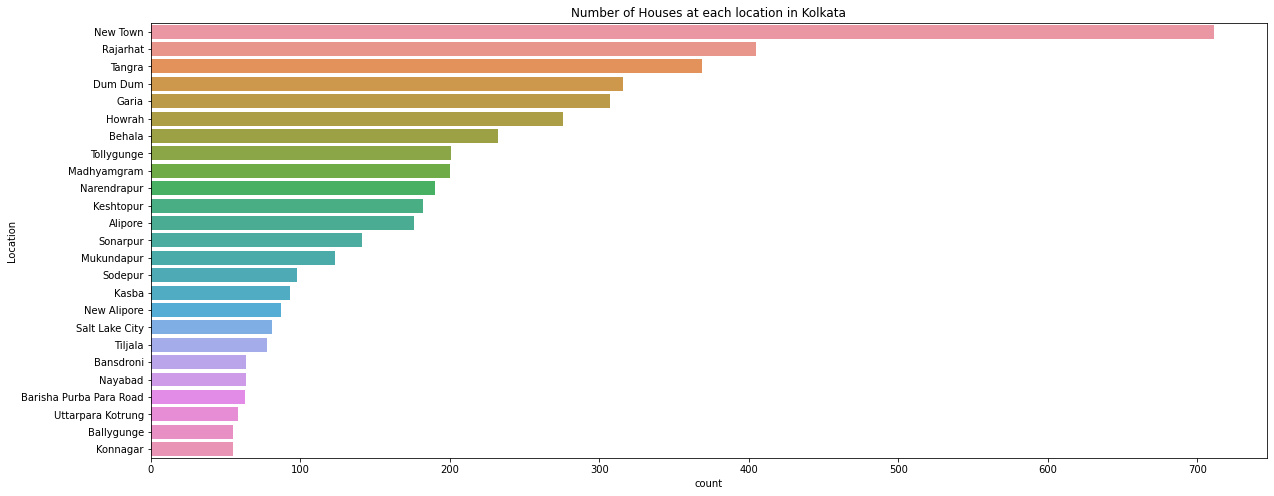

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


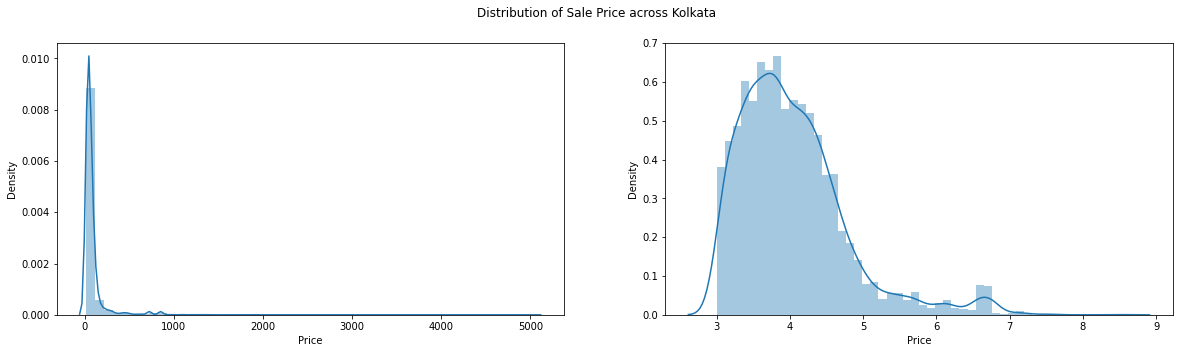

In [53]:
data_plots(kol_df, 'Kolkata')

Model Training and Performance:

In [54]:
kol_sc = models_evaluation(kol_df)
kol_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.058598,0.044440,0.531578,0.495400,0.703847,0.058598
1,Decision Tree Regression,-0.523370,-0.486344,0.653021,0.801654,0.895351,-0.523370
2,Random Forest Regression,-0.074038,-0.070151,0.559879,0.565198,0.751797,-0.074038
3,Support Vector Regression,0.059448,0.042534,0.512755,0.494953,0.703529,0.059448
4,XGBoost Regression,0.025386,-0.029700,0.536293,0.512878,0.716155,0.025386


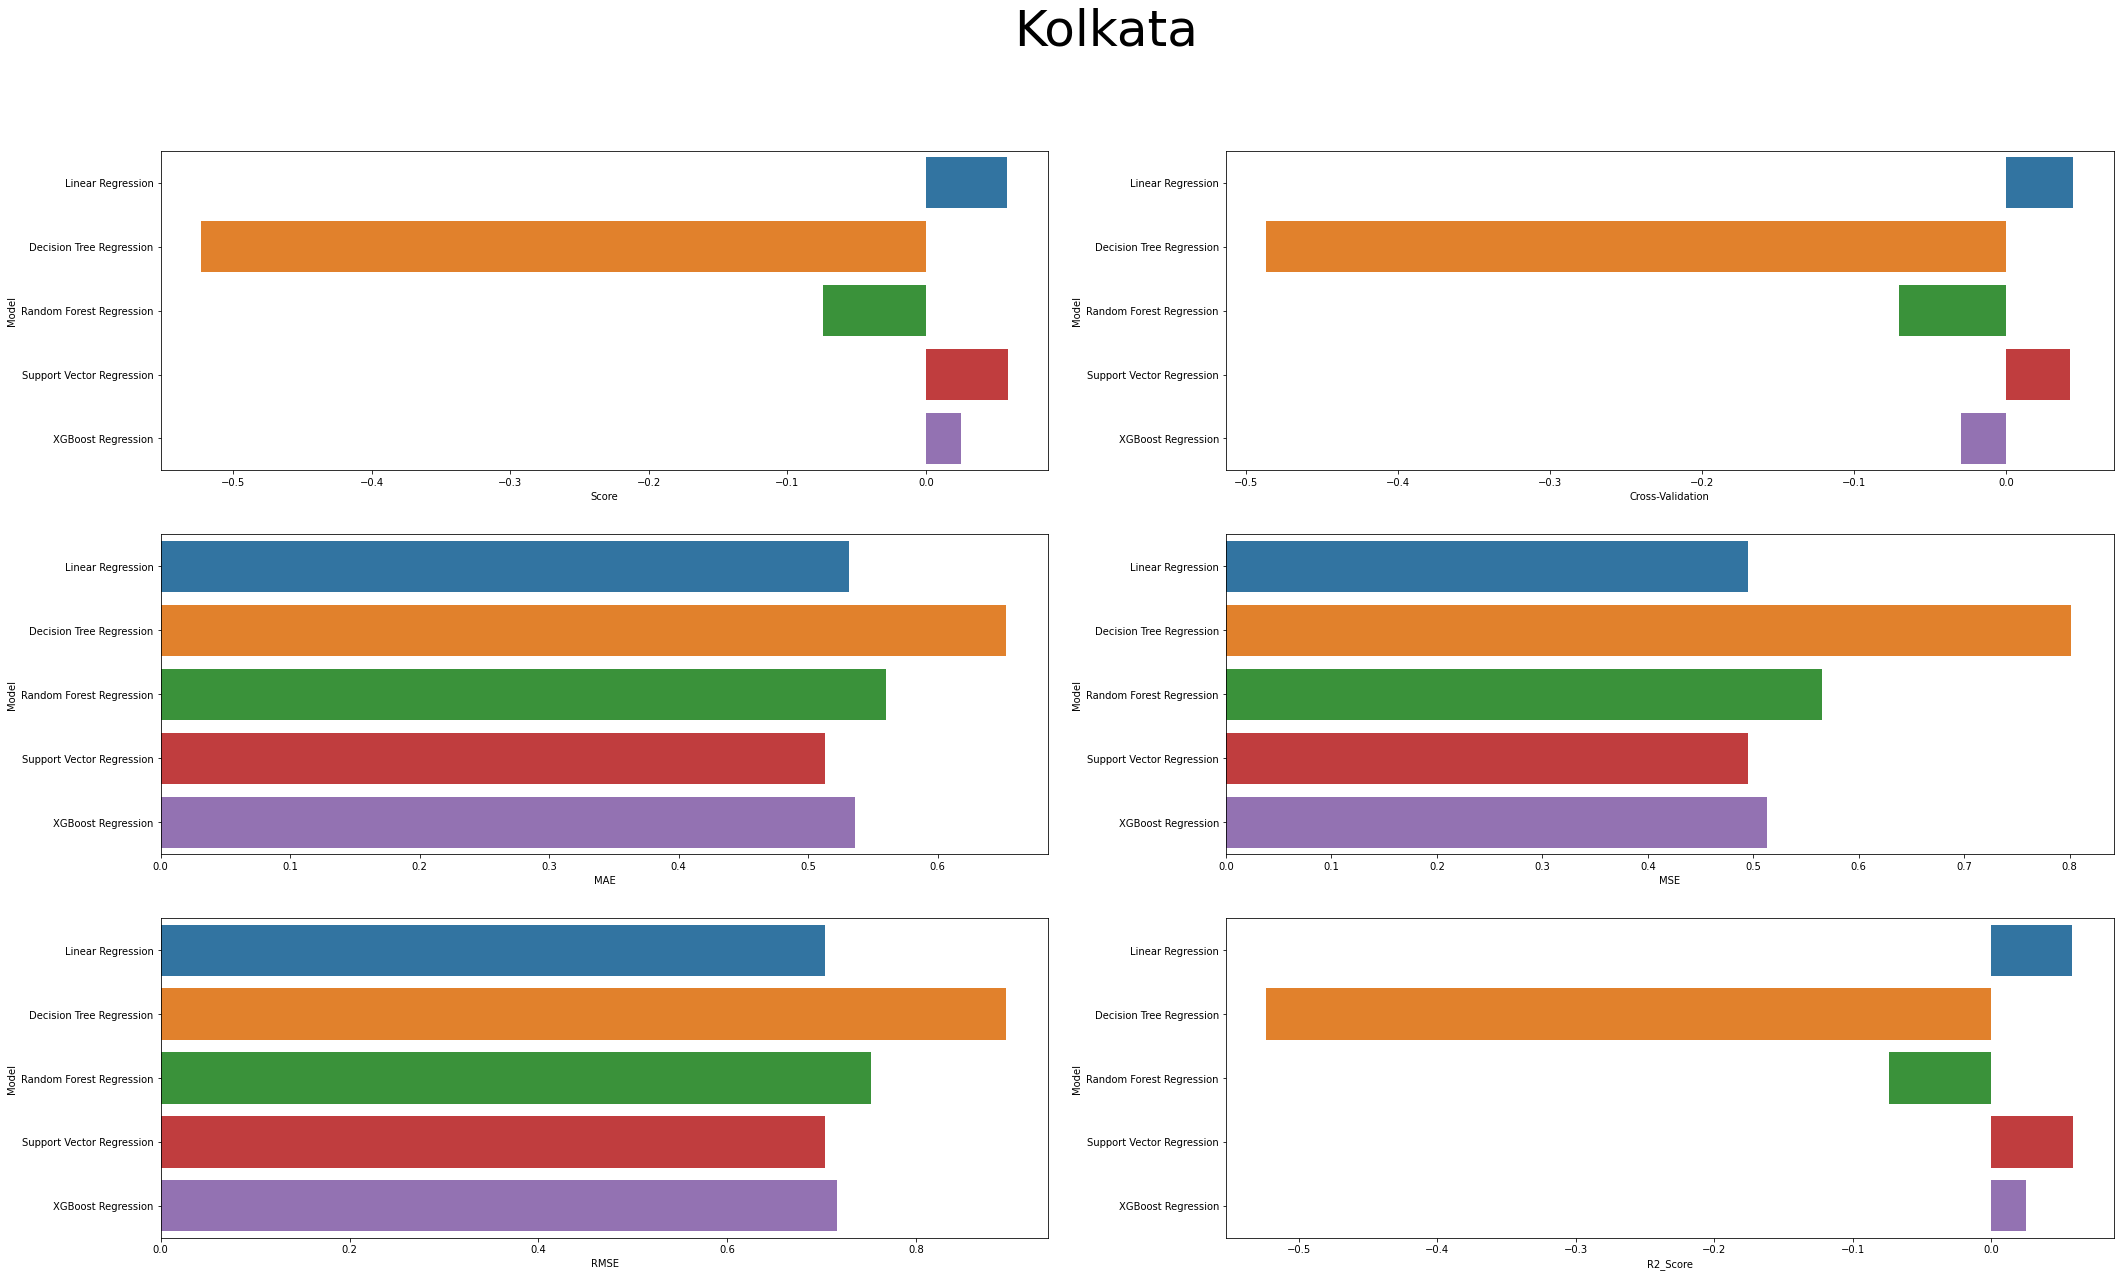

In [55]:
score_plots(kol_sc, 'Kolkata')

#### Mumbai
EDA:

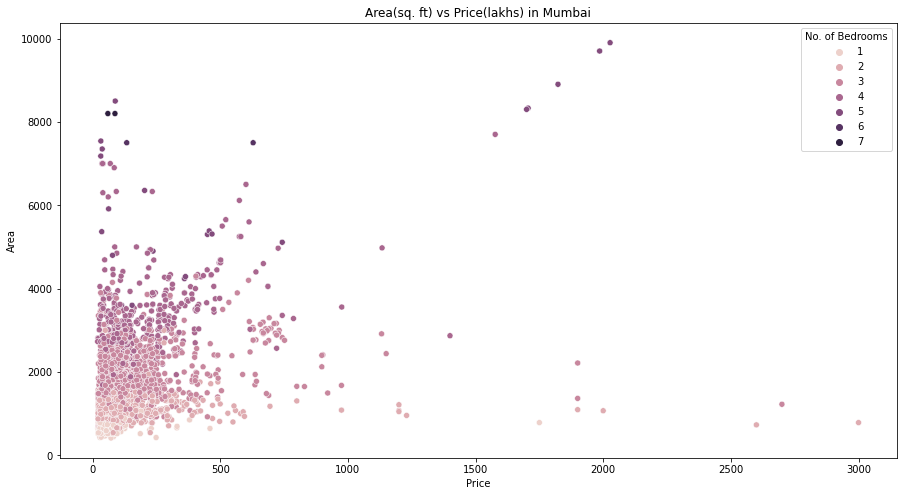

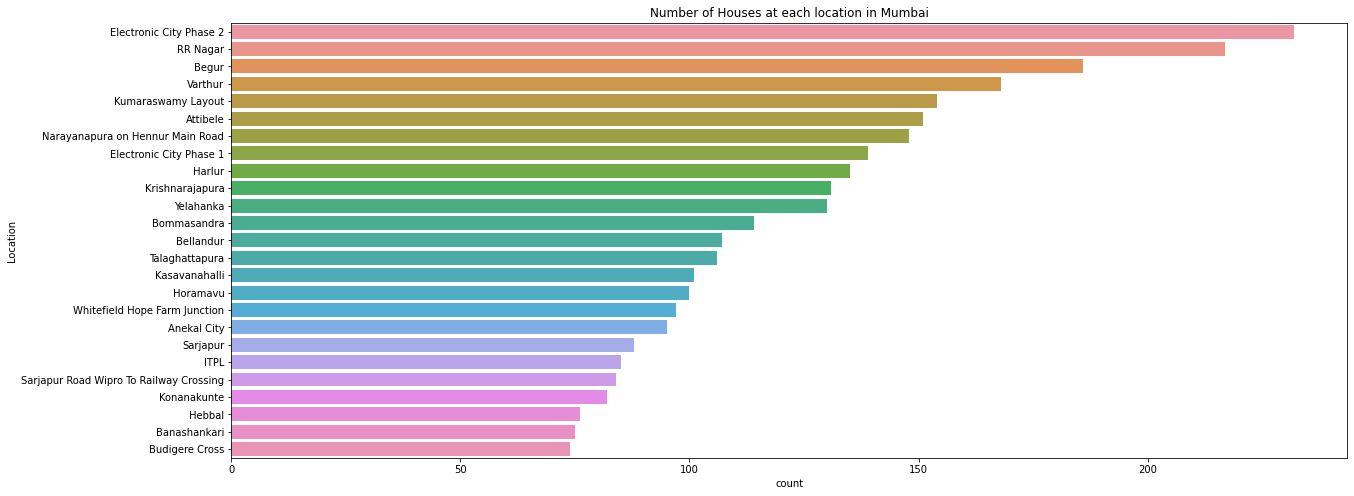

C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swatt\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


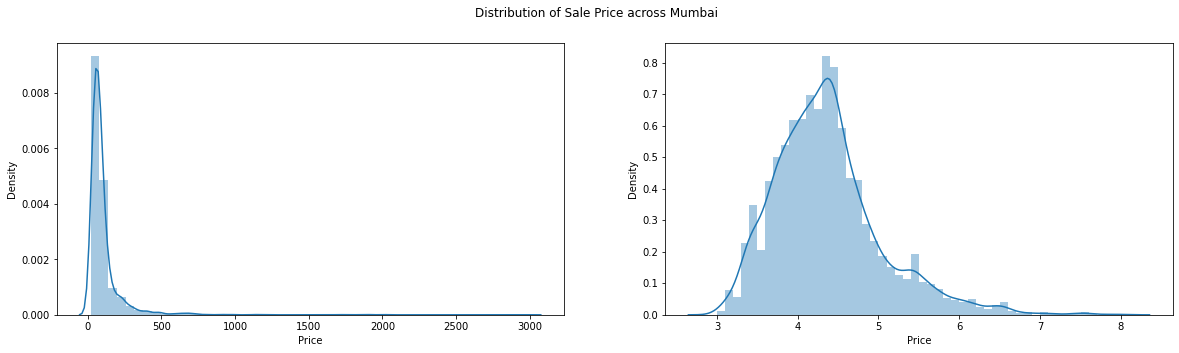

In [56]:
data_plots(mum_df, 'Mumbai')

Model Training and Performance:

In [57]:
mum_sc = models_evaluation(mum_df)
mum_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.211675,0.202398,0.417366,0.341123,0.584058,0.211675
1,Decision Tree Regression,0.100260,-0.081537,0.410064,0.389334,0.623967,0.100260
2,Random Forest Regression,0.294158,0.225634,0.374032,0.305431,0.552658,0.294158
3,Support Vector Regression,0.286649,0.236825,0.390024,0.308681,0.555590,0.286649
4,XGBoost Regression,0.339492,0.256085,0.362893,0.285814,0.534616,0.339492


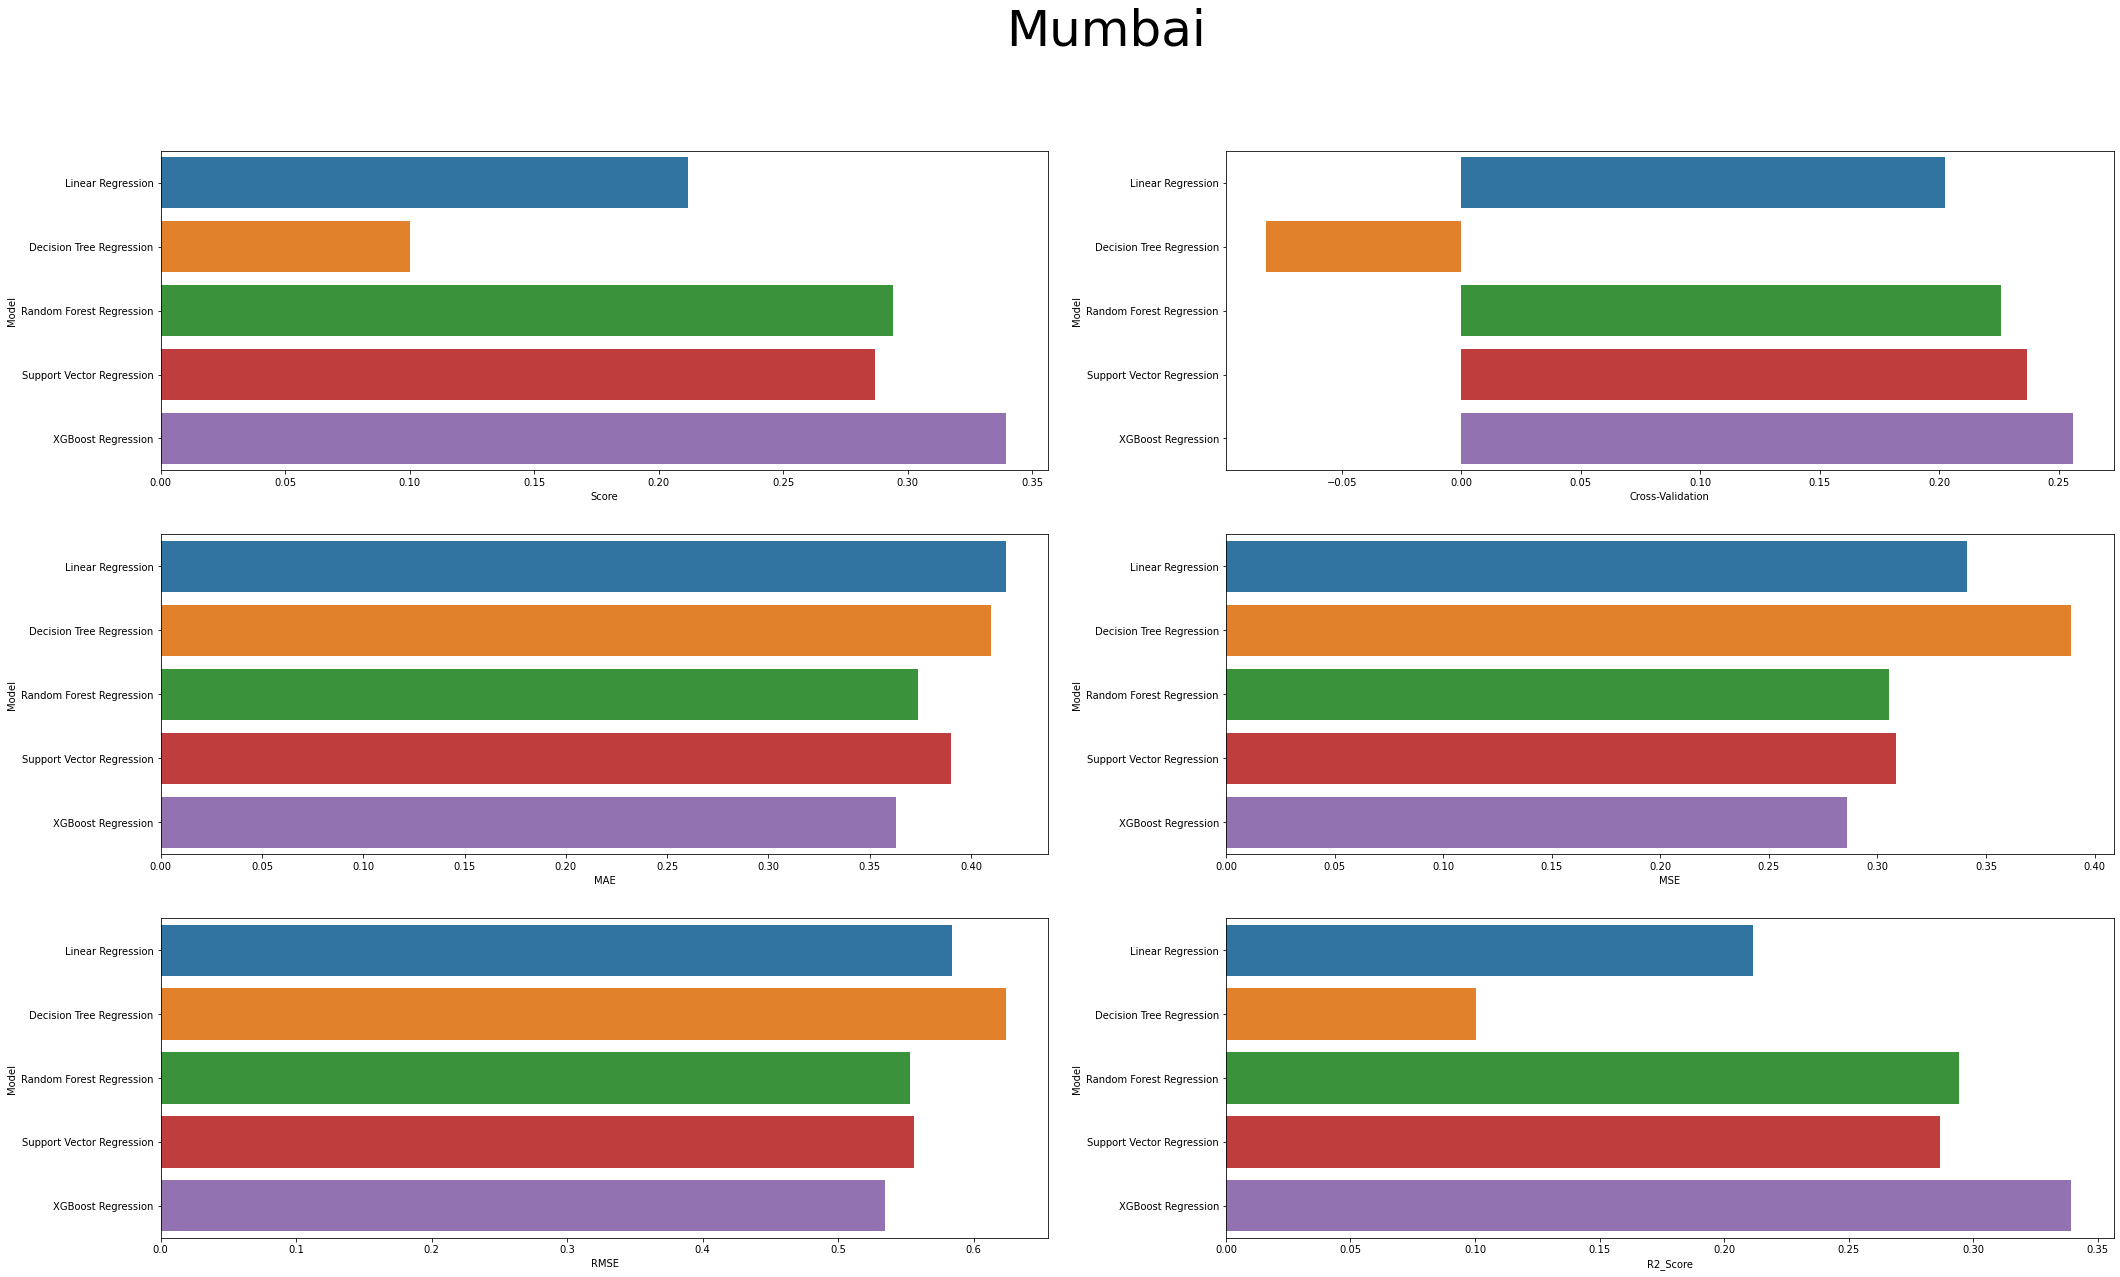

In [58]:
score_plots(mum_sc, 'Mumbai')

#### Merged

In [59]:
merged_df = merge_all(bang_df, chn_df, del_df, hyd_df, kol_df, mum_df)

EDA:

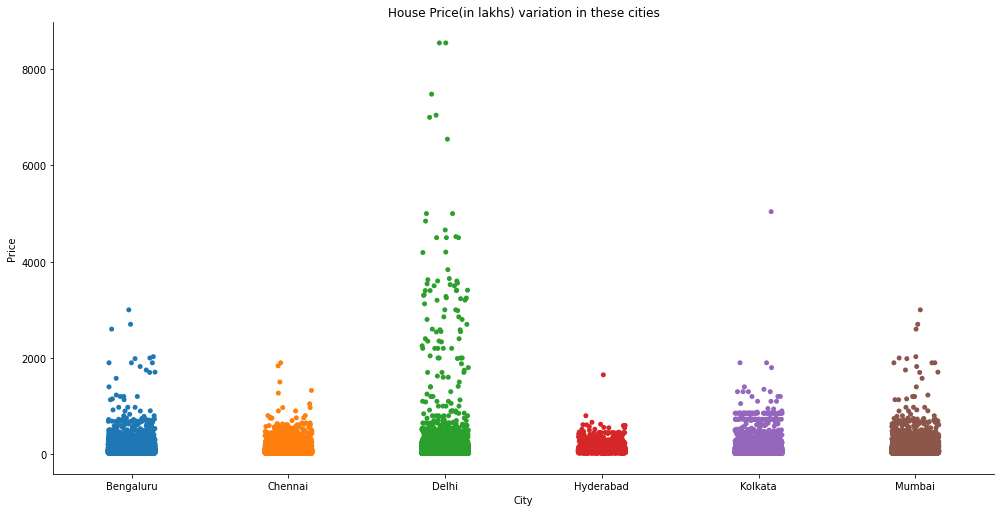

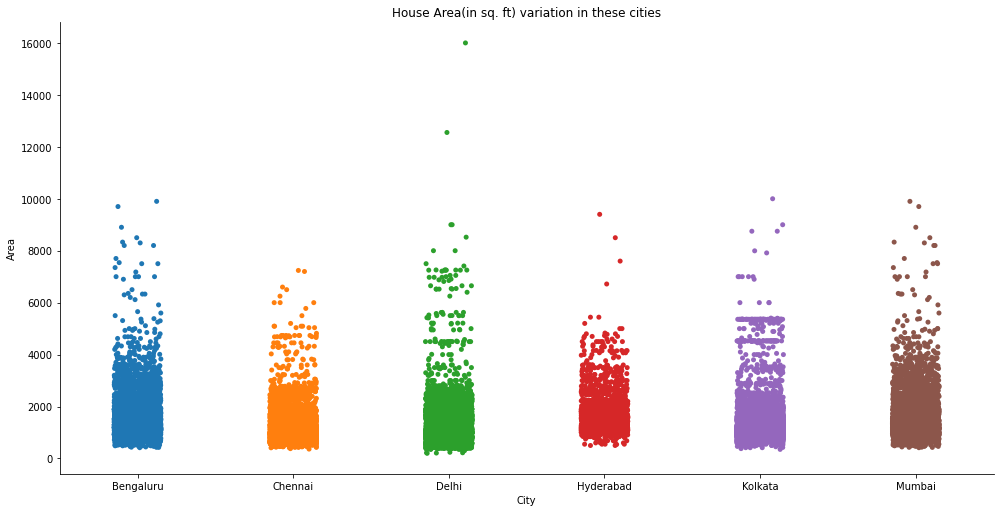

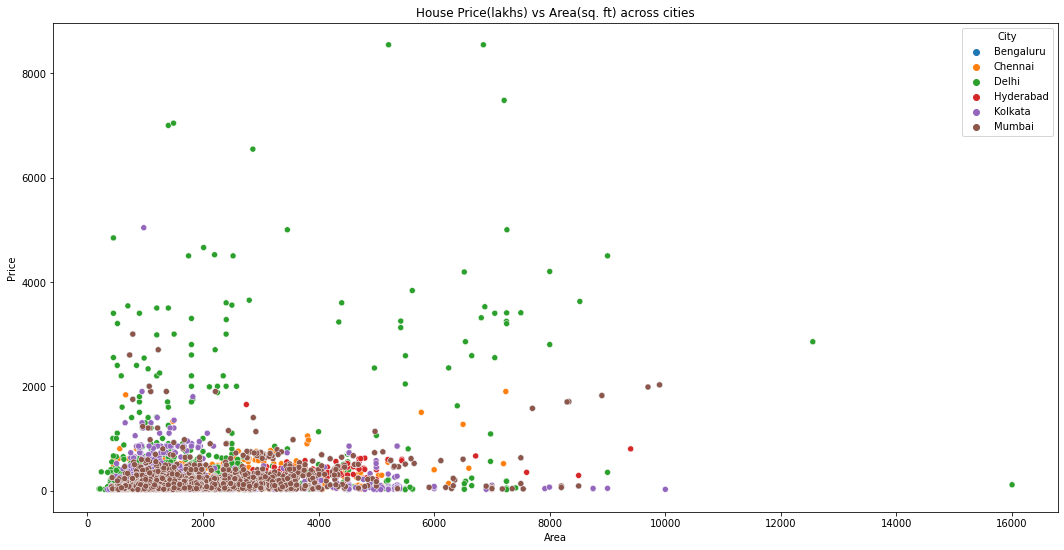

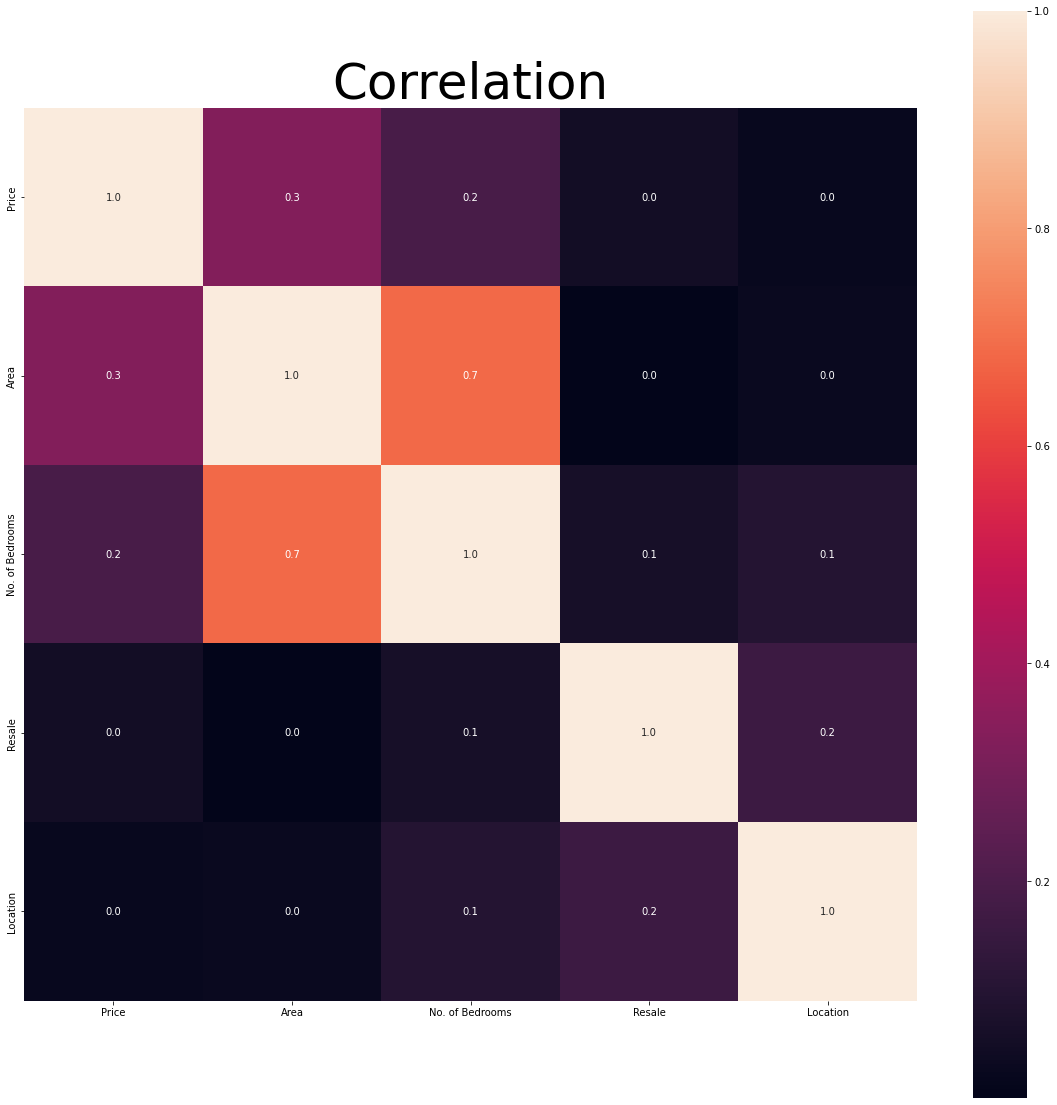

In [60]:
merged_plots(merged_df)

Model Training and Performance:

In [61]:
merged_df['City'] = LabelEncoder().fit_transform(merged_df.City)
mergeddf_sc = models_evaluation(merged_df)
mergeddf_sc

,Model,Score,Cross-Validation,MAE,MSE,RMSE,R2_Score
0,Linear Regression,0.195256,0.206022,0.500571,0.460114,0.678317,0.195256
1,Decision Tree Regression,-0.019600,0.043846,0.478328,0.582959,0.763517,-0.019600
2,Random Forest Regression,0.301664,0.314097,0.414335,0.399275,0.631882,0.301664
3,Support Vector Regression,0.287798,0.296554,0.429252,0.407203,0.638125,0.287798
4,XGBoost Regression,0.380032,0.390784,0.399543,0.354468,0.595372,0.380032


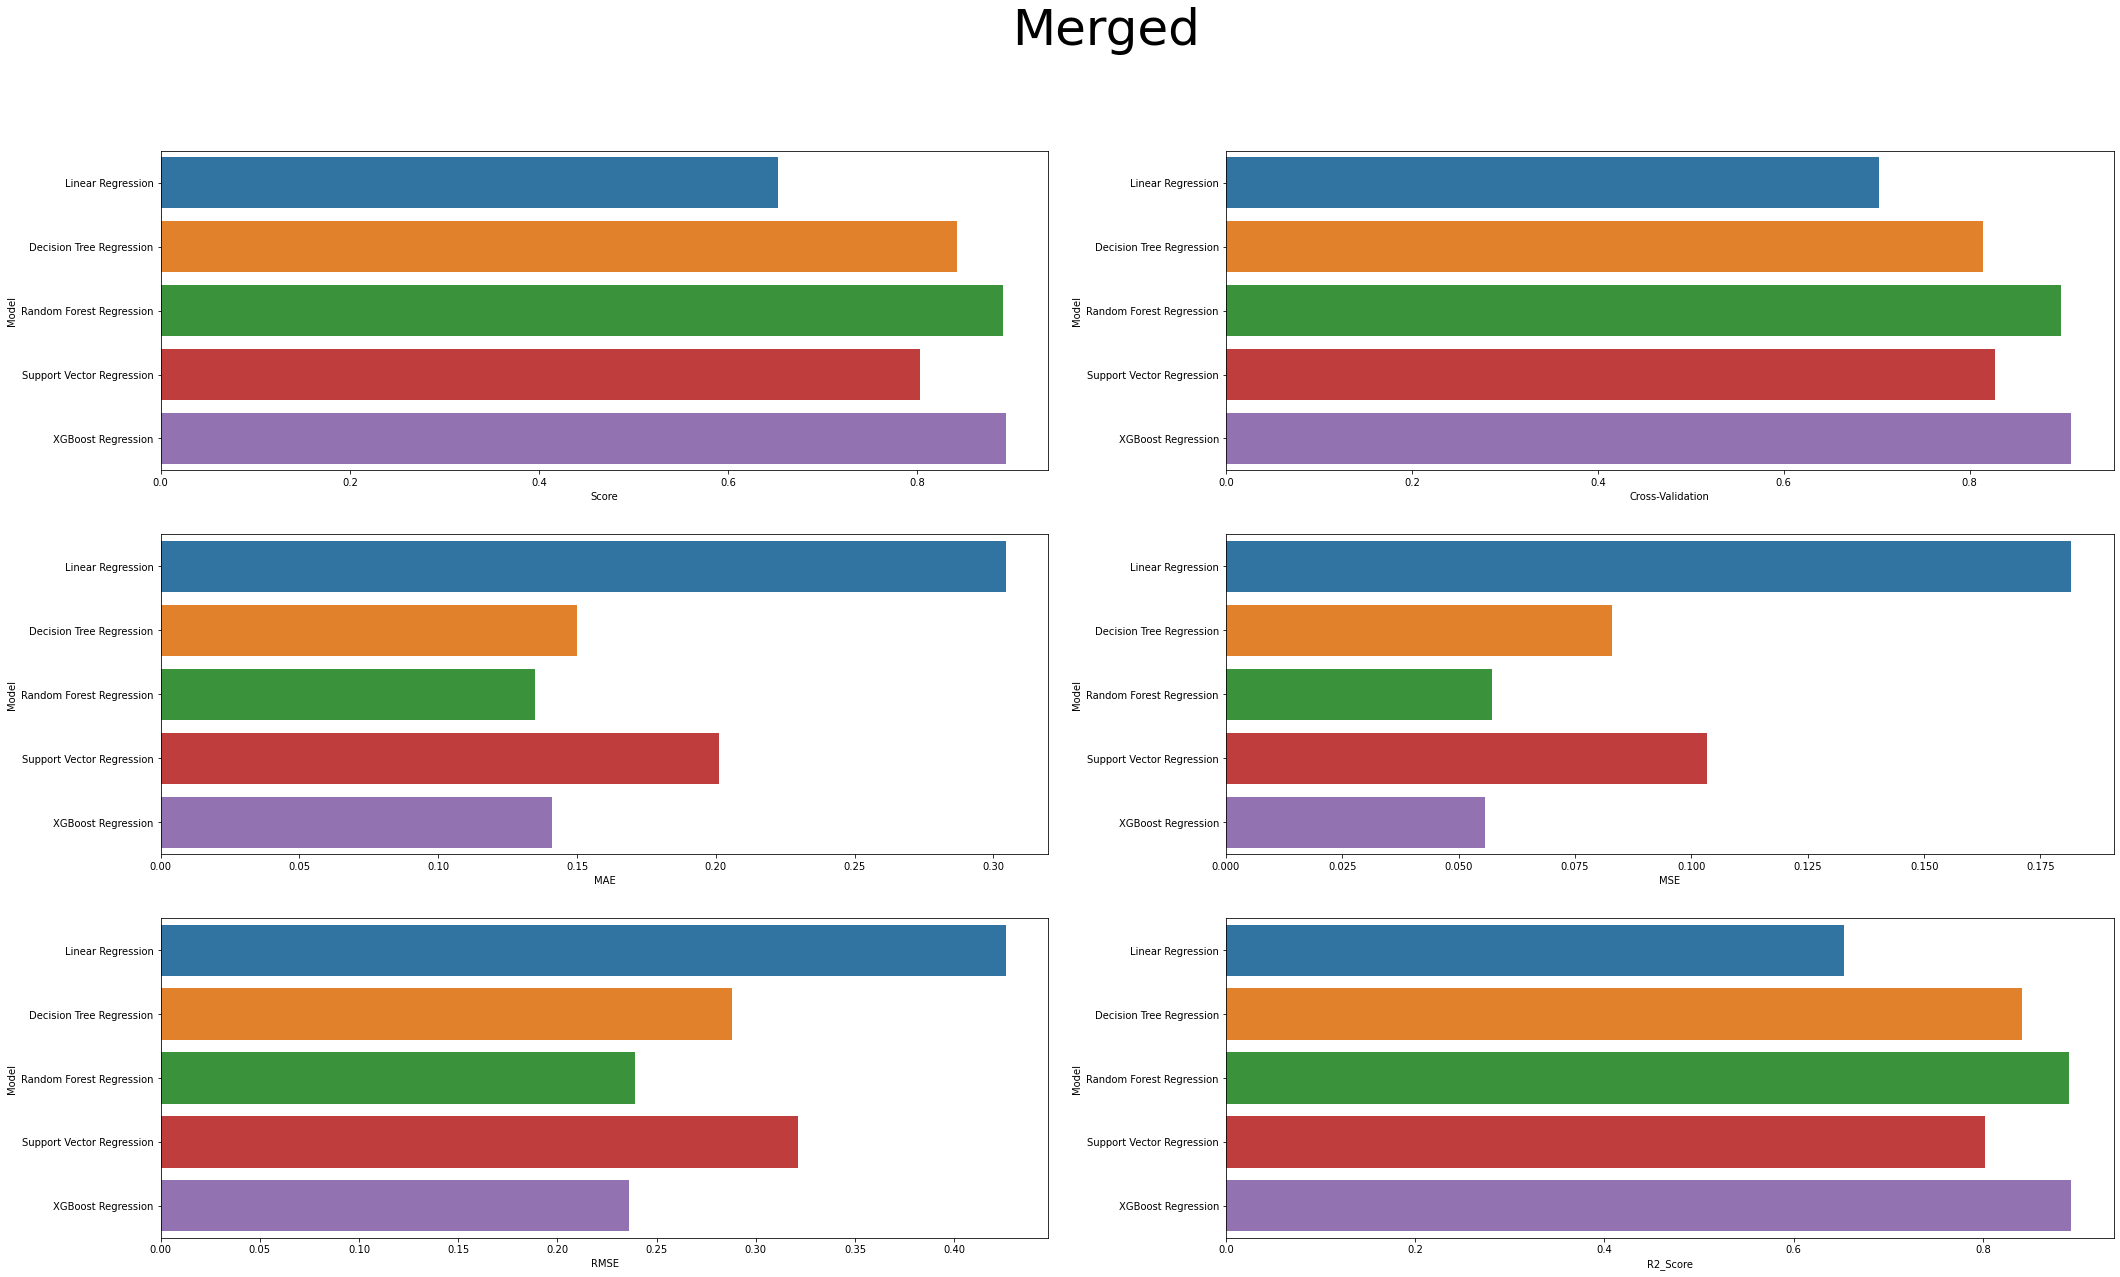

In [62]:
score_plots(mergeddf_scores, 'Merged')

## Conclusion
#### Thus we can easily surmise that 'Approach 1', i.e, dropping the missing values is the better approach to solving this problem. It performs and handles the data better.